# Starbucks Capstone Challenge

# Introduction


For this project, we will have an opportunity to analyse Starbucks mobile app customer base data and their responses towards promotion offers. First we will explore, clean the data and then make exploratory analysis to find out customer based statistic. Subseqently, we aim to make on what the app should make recommendation offer to the new customer on the app with a machine learning model

## About Starbucks and Mobile App Program

### Starbuck
Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington since 1971[1]. It is currently the world's largest coffeehouse chain store, serving a variety of beverages from hot/cold coffee/tea to the In addition to drinks and food, many stores carry Starbucks' official merchandise, such as mugs, tumblers, scoops, and coffee presses. Not limited to store front sales, drinks (canned drink, expresso capsules) sporting Starbuck label has appeared in supermarket and online shops[2]

### Mobile Application
Starbucks is one of the early adopter of mobile application. In May 2008, a loyalty program was introduced for Starbucks Card registered users offering perks such as free Wi-Fi Internet access etc. 3 Years on, it began beta testing its mobile app for the Starbucks card, offering prepaid services. Subsequently, Starbucks released its complete mobile platform by January 2011. By December 2011, the number of mobile transactions exceeded 26 million. It is estimated that 30% of the Starbuck transactions is through mobile compared to Apple Pay, which is only used by ~5% of customers in 2018 [3]

## Information on Data Set
The provided data set for this project contains simulated data (containing transactions, customer spread and offer types) which mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks and not every user will have the same offer offered to the next

#### Validity Period
Every offer has a validity period before the offer expires. For example, a BOGO offer might be valid for only 5 days. The data set contains also informational offers which are merely providing information about a product. Accordingly, if an informational offer has 7 days of validity, one can assumed the customer is under the influence of the offer for 7 days after receiving the advertisement. It can be shown from the transactional data shows the timestamp of each purchase as well as the amount of money spent when user make purchases on the app. The transactional data also has a record for each offer that a user receives, a record for when a user actually views the offer and finally when a user completes an offer. 

Conversely, user should also note that it is possible that a customer using the app might make a purchase through the app without having received an offer or seen an offer.

#### Rewards System
To give an example how the reward process works, a user could receive a discount offer buy 10 dollars get 2 off. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer. 

It has also to be considered that a customer can receive an offer, never actually views the offer, and still completes the offer. For example, a customer might receive the "buy 10 dollars get 2 dollars off offer", but never opens the offer during the 10 day validity period, while he spends 15 dollars during those ten days. Thus there will be an offer completion record in the data set while the customer was not influenced by the offer.[2]

## On Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Part I : Define the business problem

The first part of our studies is to define our business problem
<ol>
    <li> What is the age, gender and income demographics of the customer group? Who formed the majority of the Starbucks customer base ?</li>
    <li> Which is the most effective channel in dispensing out information </li>
    <li> Which group (age, income, membership length) of customers appear to be more responsive towards the promotion
    <li> Is there link between the offer given and the target group? </li>
    <li> Which type of promotional offer most appeal to which group of customer?</li>
    <li>Can we build a recommendation engine to recommend promotional offer with good uptake rate to new customers based on their demographical data age, income, registration date and gender?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt

%matplotlib inline

# read in the json files
portfolio   = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile     = pd.read_json('data/profile.json',   orient='records', lines=True)
transcript  = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
## update the pandas package as suggested above

# if (float(pd.__version__) > 1.53):
#     print('version is greater')
# !conda update pandas

# Part II : Analyze


We will analyze the problem(with the 3 pandas DataFrame) through visualizations and data exploration to have a better understanding of what algorithms and features are appropriate for solving it.

### Portfolio

In [3]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [4]:
portfolio.describe(include='all')

reward                      channels  difficulty   duration  \
count   10.000000                            10   10.000000  10.000000   
unique        NaN                             4         NaN        NaN   
top           NaN  [web, email, mobile, social]         NaN        NaN   
freq          NaN                             4         NaN        NaN   
mean     4.200000                           NaN    7.700000   6.500000   
std      3.583915                           NaN    5.831905   2.321398   
min      0.000000                           NaN    0.000000   3.000000   
25%      2.000000                           NaN    5.000000   5.000000   
50%      4.000000                           NaN    8.500000   7.000000   
75%      5.000000                           NaN   10.000000   7.000000   
max     10.000000                           NaN   20.000000  10.000000   

       offer_type                                id  
count          10                                10  
unique          3                                10  
top          bogo  ae264e3637204a6fb9bb56bc8210ddfd  
freq            4                                 1  
mean          NaN                               NaN  
std           NaN                               NaN  
min           NaN                               NaN  
25%           NaN                               NaN  
50%           NaN                               NaN  
75%           NaN                               NaN  
max           NaN                               NaN

In [5]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

### Description of Portfolio Data

This data contains 10 campaign offers that is run together with Starbuck Customer, of which there are 3 types of promotion types being offered and the campaign offers is run with up to 4 types of channels. There is no missing data in the set and so we did not need to impute any value. Below tells of the detail for each column

**portfolio.json schema**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer, - cost to consumer
* reward (int) - reward given for completing an offer - cost to Starbuck
* duration (int) - time for offer to be open, in days
* channels (list of strings), ie web, email, mobile, social

### The following cleansing work would be neccessary
<ol> 
    <li> To expand the channels column into multiple columns based on the list atttribute: namely web, email, mobile and social  
    <li> To drop some of the channels namely channels and email. Email is used in every info campaign while channels have been expanded and is redundant
    <li> To expand the offer_type, a form of categorical data, into individual columns
    <li> Convert the duration to number of hours instead of days
    <li> Normalize some of the value 
</ol>

### Profile

In [6]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [7]:
profile.describe()

age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000

To find out how many person is of age 118

In [8]:
profile.age[profile.age==118].count()

2175

In [9]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

The number of people with age 118 matches with the number of people without gender and without income data

### Description of Profile Data

A glimpse at the data show there is a number of customers, (2175 to be exact) at 118 year old! A small trivial[4], the oldest known living person  has managed to live a year of 122 and the number of people who have live to that age is not more than 10. Starbucks could not possibly get so many customer who is of 118. <br>

A plausible explanation could be that the customer refuse to leave his/her identity information. The number of customer who did not have their gender, income or age is the same, 2175. We might be wanting to remove this set of user, even though it represented about 10% of the total user database

We might also want to convert the became member 

**profile.json schema**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

The following cleansing work would be neccessary

<ol> 
    <li> To drop the members with 118 years of age     
    <li> To convert "became_member_on" to "membership". Would need to change from string format YYYYMMDD representatation to one that is based on year they have been member
    <li> Normalize some of the value 
</ol>

### Transcript

In [10]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [11]:
transcript.describe()

time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

In [12]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [13]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### Description of Transcript Data



transcript.json

    event (str) - record description of type transaction, offer received, offer viewed, offer completed
    person (str) - customer id
    time (int) - time in hours since start of test. The data begins at time t=0
    value - (dict of strings) - either an offer id or transaction amount depending on the record


The following cleansing work would be neccessary 

<ol>
    <li> To remove transaction of those users which have been removed in profile json 
    <li> To expand the event column, a form of categorical data, into individual binary columns of transaction, offer received, offer viewed, offer completed
    <li> To make matter simple, formed a new column call campaign_success based on customer would have to view the offer and complete the offer, then it would consider as campaign success while completion of offer without actually viewing the offer would consider to be a failure
    <li> To extract out the value type into either one indicating of offer_id or transaction amount. Consideration is also taken to drop those transaction amount data
    <li> Normalize some of the value 
</ol>

Finally then combine the 3 dataframe to form a master dataframe

# Part III :  Data Cleansing

We perform cleaning and engineering for all data sets (portfolio, profile, transcript). In summary, we will focus on the below work direction:

<ul>
    <li> convert dtype of features where necessary eg from datetime to string or vice versa </li>
    <li> drop rows with missing data or outliers </li>
    <li> drop rows with duplicated data </li>
    <li> group data for further data analysis </li>
    <li> create new features with binaries from categorical variables </li>
    <li> normalize data for columns with a different range of values </li>
</ul>

Cleaning up the portfolio dataset

In [14]:
## copy a copy of the portfolio dataset
portfolio_df  = portfolio.copy()

Create new columns(web, emaiil,mobile & social) from channels

In [15]:
channels_list  =  ['web', 'email', 'mobile', 'social'] 

for index in channels_list: 
    portfolio_df[index] = portfolio_df.channels.apply(lambda x: (index in x)+0)

print(portfolio_df)

   reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  web  email  mobile  social  
0  ae264e3637204a6fb9bb56bc8210ddfd    0      1      

Convert offer_type from categorical into numerical data

In [16]:
portfolio_df.offer_type = portfolio_df.offer_type.replace([ 'informational', 'bogo', 'discount'],
                          [0, 1, 2])

Changing the duration from day into hours

In [17]:
portfolio_df.duration  = portfolio_df.duration * 24

Adding three more columns -- Offered, Viewed, Complete

In [18]:
portfolio_df['Viewed'] = 0

portfolio_df['Complete'] = 0

portfolio_df['Offered'] = 0

Normalizing the data in portfolio

In [19]:
## normalize difficulty column
portfolio_df.difficulty = portfolio.difficulty /5

## normalie duration column
portfolio_df.duration = portfolio.duration /portfolio.duration.max()

## droping channels and email
portfolio_df = portfolio_df.drop(['channels', 'email'], axis=1)

print(portfolio_df)

   reward  difficulty  duration  offer_type                                id  \
0      10         2.0       0.7           1  ae264e3637204a6fb9bb56bc8210ddfd   
1      10         2.0       0.5           1  4d5c57ea9a6940dd891ad53e9dbe8da0   
2       0         0.0       0.4           0  3f207df678b143eea3cee63160fa8bed   
3       5         1.0       0.7           1  9b98b8c7a33c4b65b9aebfe6a799e6d9   
4       5         4.0       1.0           2  0b1e1539f2cc45b7b9fa7c272da2e1d7   
5       3         1.4       0.7           2  2298d6c36e964ae4a3e7e9706d1fb8c2   
6       2         2.0       1.0           2  fafdcd668e3743c1bb461111dcafc2a4   
7       0         0.0       0.3           0  5a8bc65990b245e5a138643cd4eb9837   
8       5         1.0       0.5           1  f19421c1d4aa40978ebb69ca19b0e20d   
9       2         2.0       0.7           2  2906b810c7d4411798c6938adc9daaa5   

   web  mobile  social  Viewed  Complete  Offered  
0    0       1       1       0         0        0  
1   

#### Cleaning up profile dataframe

changing the "became_member_on" to member since the earliest date

In [20]:
## make a copy of profile
profile_df = profile.copy()

Removing the anonmynous user with age 118, no gender and income information

In [21]:
profile_df = profile_df[profile_df.age!=118]
profile_df_size = 17000-2175

### sanity check on profile - after removing
assert profile_df.shape[0] >= profile_df_size , "the size is not right"

Adding columns for future usage

In [22]:
profile_df['Completion'] = 0
profile_df['Viewed'] = 0
profile_df['Offered'] = 0

Changing the data in column "became_member_on" to "membership"

In [23]:
## rename the columns
profile_df.rename(columns = {'became_member_on':'membership'}, inplace=True)
                             
base_year  = int(profile_df.membership.max() /10000) 
profile_df['membership']= profile_df.membership.apply(lambda x: base_year - int(x/10000))

print(profile_df)

      gender  age                                id  membership    income  \
1          F   55  0610b486422d4921ae7d2bf64640c50b           1  112000.0   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef           1  100000.0   
5          M   68  e2127556f4f64592b11af22de27a7932           0   70000.0   
8          M   65  389bc3fa690240e798340f5a15918d5c           0   53000.0   
12         M   58  2eeac8d8feae4a8cad5a6af0499a211d           1   51000.0   
...      ...  ...                               ...         ...       ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7           0   54000.0   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77           0   72000.0   
16997      M   49  01d26f638c274aa0b965d24cefe3183f           1   73000.0   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366           2   50000.0   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068           1   82000.0   

       Completion  Viewed  Offered  
1               0       0        0  
3

Creating a master dataframe to hold all the data

#### Cleaning up transcript dataframe

In [24]:
transcript_df = transcript.copy()

Removing those records whose user does not appear in the new profile dataframe

In [25]:
transcript_df = transcript_df.value.apply(lambda x: (index in x)+0)

transcript_df = transcript[transcript['person'].isin(profile_df['id'])]

transcript_df.count()

person    272762
event     272762
value     272762
time      272762
dtype: int64

We have almost removed 10% of the records in transcript

In [26]:
transcript_df.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

Changing the event categories into individual columns (binary) and then rename them

In [27]:
event_list  =  ['transaction', 'offer received', 'offer viewed', 'offer completed'] 

transcript_df_events = pd.DataFrame()

for index in event_list: 
    transcript_df_events[index] = transcript_df.event.apply(lambda x: 1 if x == index else 0 )

### rename 
transcript_df_events.rename(columns={"offer received": "offer_received",
                                     "offer viewed": "offer_viewed", 
                                     "offer completed": "offer_completed"}, inplace=True)

### print out for view
print(transcript_df_events)

        transaction  offer_received  offer_viewed  offer_completed
0                 0               1             0                0
2                 0               1             0                0
5                 0               1             0                0
7                 0               1             0                0
8                 0               1             0                0
...             ...             ...           ...              ...
306527            0               0             0                1
306529            1               0             0                0
306530            1               0             0                0
306531            1               0             0                0
306532            1               0             0                0

[272762 rows x 4 columns]


In [28]:
### find out the events categories and number
transcript_df_events.sum()

transaction        123957
offer_received      66501
offer_viewed        49860
offer_completed     32444
dtype: int64

Changing the values categories into individual columns (binary)

In [29]:
value_list  =  ['amount', 'offer_id', 'offer id'] 

transcript_df_value = pd.DataFrame()

for index in value_list: 
    transcript_df_value[index] = transcript_df.value.apply(lambda x: x.get(index) if x.get(index) != None else "" )

transcript_df_value['offer_id']   = transcript_df_value['offer_id']  + transcript_df_value['offer id'] 
transcript_df_value.drop('offer id', axis=1, inplace=True)
print(transcript_df_value)

       amount                          offer_id
0              9b98b8c7a33c4b65b9aebfe6a799e6d9
2              2906b810c7d4411798c6938adc9daaa5
5              f19421c1d4aa40978ebb69ca19b0e20d
7              3f207df678b143eea3cee63160fa8bed
8              0b1e1539f2cc45b7b9fa7c272da2e1d7
...       ...                               ...
306527         fafdcd668e3743c1bb461111dcafc2a4
306529   1.59                                  
306530   9.53                                  
306531   3.61                                  
306532   3.53                                  

[272762 rows x 2 columns]


Concatenating the dataframe

In [30]:
frame = [transcript_df, transcript_df_events,transcript_df_value]

transcript_df = pd.concat(frame, axis=1)

In [31]:
transcript_df.isna().sum()

person             0
event              0
value              0
time               0
transaction        0
offer_received     0
offer_viewed       0
offer_completed    0
amount             0
offer_id           0
dtype: int64

We need to filter out customers who completed the offer without recieving or viewing the offer to give a more balanced view

In [32]:
def findViewed(df, offer_id):
    result = False
    if (df.loc[df.offer_id == offer_id].offer_viewed ==1).any():
        result = True
    
    return result

transcript_df_person = transcript_df.groupby('person')


### lots of heavy processing down here
for key, item in transcript_df_person:
    print(f'The customer id is {key}')
    tmp = transcript_df_person.get_group(key)
    count = 0
    vcount = 0
    for index, row in tmp.iterrows():
        if row.offer_completed == 1:
            search_string = row.offer_id
            if findViewed(tmp, search_string) == True:
                print(f'Offer {search_string} is completed for customer {key}')
                count = count + 1
                portfolio_df.loc[portfolio_df.id == search_string,'Complete'] = portfolio_df.loc[portfolio_df.id == search_string,'Complete'] + 1
        
        if row.offer_viewed == 1:
            search_string = row.offer_id
            # the key is the advert 
            portfolio_df.loc[portfolio_df.id == search_string,'Viewed'] = portfolio_df.loc[portfolio_df.id == key,'Viewed'] + 1
    
    
    profile_df.loc[ profile_df.id == key,'Completion'] = count
    profile_df.loc[ profile_df.id == key,'Viewed'] = tmp.offer_viewed.sum()
    profile_df.loc[ profile_df.id == key,'Offered'] = tmp.offer_received.sum()
    
    

The customer id is 0009655768c64bdeb2e877511632db8f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0009655768c64bdeb2e877511632db8f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0009655768c64bdeb2e877511632db8f
The customer id is 0011e0d4e6b944f998e987f904e8c1e5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0011e0d4e6b944f998e987f904e8c1e5
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0011e0d4e6b944f998e987f904e8c1e5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 0011e0d4e6b944f998e987f904e8c1e5
The customer id is 0020c2b971eb4e9188eac86d93036a77
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0020c2b971eb4e9188eac86d93036a77
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0020c2b971eb4e9188eac86d93036a77
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0020c2b971eb4e9188eac86d93036a77
The customer id is 0020ccbbb6d84e358d3414a3ff76cffd
Offer 22

The customer id is 00ed7e22b32749cfafbfd88592d401d4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 00ed7e22b32749cfafbfd88592d401d4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 00ed7e22b32749cfafbfd88592d401d4
The customer id is 00ee2ca6421c4af0aeca60a1b3e00f6c
The customer id is 00ee69db83964d6da32f8109b32a1ce7
The customer id is 00fac72fd6ad448e8019b175267023df
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 00fac72fd6ad448e8019b175267023df
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 00fac72fd6ad448e8019b175267023df
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 00fac72fd6ad448e8019b175267023df
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 00fac72fd6ad448e8019b175267023df
The customer id is 00fbb9b5edb94f02afbaf1eb49bb4d7d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 00fbb9b5edb94f02afbaf1eb49bb4d7d
The customer id is 00fdd4416dec40b49180814c0a7c8d76
Of

The customer id is 01ac633821f0498893320b41b5b22dfc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 01ac633821f0498893320b41b5b22dfc
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 01ac633821f0498893320b41b5b22dfc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 01ac633821f0498893320b41b5b22dfc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 01ac633821f0498893320b41b5b22dfc
The customer id is 01b6d7e8f0884deb936a8a7f15dba895
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 01b6d7e8f0884deb936a8a7f15dba895
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 01b6d7e8f0884deb936a8a7f15dba895
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 01b6d7e8f0884deb936a8a7f15dba895
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 01b6d7e8f0884deb936a8a7f15dba895
The customer id is 01d26f638c274aa0b965d24cefe3183f
The customer id is 01d7da27b8934ba1b3602a0153e4415f
The cust

The customer id is 028c88a958e54c36a31c4800fd6e887b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 028c88a958e54c36a31c4800fd6e887b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 028c88a958e54c36a31c4800fd6e887b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 028c88a958e54c36a31c4800fd6e887b
The customer id is 029e063479234fb1b6c8727c3d45de62
The customer id is 02a3aa431c1047be8eafec3dcd6b5fd0
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 02a3aa431c1047be8eafec3dcd6b5fd0
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 02a3aa431c1047be8eafec3dcd6b5fd0
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 02a3aa431c1047be8eafec3dcd6b5fd0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 02a3aa431c1047be8eafec3dcd6b5fd0
The customer id is 02a458e1233342b79caff81edbcc30a9
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 02a458e1233342b79caff81edbcc30a9
Offer 22

The customer id is 035d5aa3c23a4059ae663b4c07aa26ce
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 035d5aa3c23a4059ae663b4c07aa26ce
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 035d5aa3c23a4059ae663b4c07aa26ce
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 035d5aa3c23a4059ae663b4c07aa26ce
The customer id is 03637e48ffda4bf9b73b079d03c0bbe3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 03637e48ffda4bf9b73b079d03c0bbe3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 03637e48ffda4bf9b73b079d03c0bbe3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 03637e48ffda4bf9b73b079d03c0bbe3
The customer id is 03676dc08a0a4899b0af5030bb6da6f5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 03676dc08a0a4899b0af5030bb6da6f5
The customer id is 036c34e6a32a463db11ebb398a8719b6
The customer id is 036e4bedca2045afad50fda2d3b505ab
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 043bcfeacb874bbc837300701ce25870
The customer id is 04452c214f5f401bb1418313c1526cbb
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 04452c214f5f401bb1418313c1526cbb
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 04452c214f5f401bb1418313c1526cbb
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 04452c214f5f401bb1418313c1526cbb
The customer id is 044a7e5bbe7f4c66a898ad1dc4bc0049
The customer id is 044f41cfd98940119477d73c81f973a3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 044f41cfd98940119477d73c81f973a3
The customer id is 0454292436bd4cee98e8ec873e30433e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0454292436bd4cee98e8ec873e30433e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0454292436bd4cee98e8ec873e30433e
The customer id is 0456cf6870f849cc9e1ac5ea9e02dccd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 051b92f5a9f94328a8721e86905c1d3d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 051b92f5a9f94328a8721e86905c1d3d
The customer id is 051e221bbd75481c8d935f6adcee2edc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 051e221bbd75481c8d935f6adcee2edc
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 051e221bbd75481c8d935f6adcee2edc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 051e221bbd75481c8d935f6adcee2edc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 051e221bbd75481c8d935f6adcee2edc
The customer id is 05298f5390c7417c8dbbcbef9f081800
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 05298f5390c7417c8dbbcbef9f081800
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 05298f5390c7417c8dbbcbef9f081800
The customer id is 052f1e4cb527405facdb09a0b7e70861
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 052f1e4cb527405facdb09a0b7e70861
Offer 0b

The customer id is 05e14ffbb5234affb70068da5fafbb25
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 05e14ffbb5234affb70068da5fafbb25
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 05e14ffbb5234affb70068da5fafbb25
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 05e14ffbb5234affb70068da5fafbb25
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 05e14ffbb5234affb70068da5fafbb25
The customer id is 05e3b4ecea3b45adb9734a2793eeb26f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 05e3b4ecea3b45adb9734a2793eeb26f
The customer id is 05e42f14818d4e82911557052b334e05
The customer id is 05e6bcb70fe14e0da4730527ca35a4ae
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 05e6bcb70fe14e0da4730527ca35a4ae
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 05e6bcb70fe14e0da4730527ca35a4ae
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 05e6bcb70fe14e0da4730527ca35a4ae
Offer ae

The customer id is 06b81e95ef4b41d494b03f4832b2c82e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 06b81e95ef4b41d494b03f4832b2c82e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 06b81e95ef4b41d494b03f4832b2c82e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 06b81e95ef4b41d494b03f4832b2c82e
The customer id is 06b99e8cc24b426f8a578c749974b88a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 06b99e8cc24b426f8a578c749974b88a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 06b99e8cc24b426f8a578c749974b88a
The customer id is 06c2a531fef542cd89877cb9fb10aaeb
The customer id is 06ccdaa9fbaa4c21b4321c83bcd2a000
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 06ccdaa9fbaa4c21b4321c83bcd2a000
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 06ccdaa9fbaa4c21b4321c83bcd2a000
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 06ccdaa9fbaa4c21b4321c83bcd2a000
Offer 29

The customer id is 07b78a8616714b58ad3a9ed94126c459
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 07b78a8616714b58ad3a9ed94126c459
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 07b78a8616714b58ad3a9ed94126c459
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 07b78a8616714b58ad3a9ed94126c459
The customer id is 07b89f3fed16463b9fb391f40d6e1c58
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 07b89f3fed16463b9fb391f40d6e1c58
The customer id is 07b9aa69f88a493f91add35a5a87d426
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 07b9aa69f88a493f91add35a5a87d426
The customer id is 07bdb81f215b4ef19653675c6eb2c447
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 07bdb81f215b4ef19653675c6eb2c447
The customer id is 07be3211a22c4ff7a09a1944693fefb7
The customer id is 07c21f323f2b41e7abf75e9b66d7ec2c
The customer id is 07c44df054f241aab553723ed855ca21
Offer ae264e3637204a6fb9bb56bc8210ddfd is comple

The customer id is 08954e2b550f423a98b664ace2d26c7f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 08954e2b550f423a98b664ace2d26c7f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 08954e2b550f423a98b664ace2d26c7f
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 08954e2b550f423a98b664ace2d26c7f
The customer id is 089884c069654beba55de2442e32ea82
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 089884c069654beba55de2442e32ea82
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 089884c069654beba55de2442e32ea82
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 089884c069654beba55de2442e32ea82
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 089884c069654beba55de2442e32ea82
The customer id is 089d00cfd1fc45258ce97ebd2e4779f8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 089d00cfd1fc45258ce97ebd2e4779f8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

The customer id is 096d06b35e534a08b20bc00850c31919
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 096d06b35e534a08b20bc00850c31919
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 096d06b35e534a08b20bc00850c31919
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 096d06b35e534a08b20bc00850c31919
The customer id is 0973a73fb67147e09659b92bc511eb78
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0973a73fb67147e09659b92bc511eb78
The customer id is 09752271072d4a259ee5f35e077bbe3e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 09752271072d4a259ee5f35e077bbe3e
The customer id is 0975267d50f7470da79d18591352e13d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 0975267d50f7470da79d18591352e13d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0975267d50f7470da79d18591352e13d
The customer id is 0976fd3ecfb84e1ca92d90b6adc2001c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 0a28210b220047fb88b58fe001f940c0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0a28210b220047fb88b58fe001f940c0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0a28210b220047fb88b58fe001f940c0
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0a28210b220047fb88b58fe001f940c0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0a28210b220047fb88b58fe001f940c0
The customer id is 0a2d08c3970c4d2181711b61f4f9cb31
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0a2d08c3970c4d2181711b61f4f9cb31
The customer id is 0a2d35d038d04a3698c382cc9cb976f9
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0a2d35d038d04a3698c382cc9cb976f9
The customer id is 0a331bcbd92f4719ab8ad2223fd588fe
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0a331bcbd92f4719ab8ad2223fd588fe
The customer id is 0a34323c7f254960979fb7c6cafa6b3c
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed fo

The customer id is 0ac5ffb0f1624297a453494b845e1a91
The customer id is 0ac73ba2449646378b3f72a7a677cc3a
The customer id is 0acaa564f18b418ba642e2a4ff3e028d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0acaa564f18b418ba642e2a4ff3e028d
The customer id is 0acca8aae113433999f7de6a5c32497c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0acca8aae113433999f7de6a5c32497c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0acca8aae113433999f7de6a5c32497c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 0acca8aae113433999f7de6a5c32497c
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0acca8aae113433999f7de6a5c32497c
The customer id is 0ad738158c52421eb5db2d42a1ad166c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0ad738158c52421eb5db2d42a1ad166c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0ad738158c52421eb5db2d42a1ad166c
The customer id is 0ad8a9771c59432f9641e48212b2ccb9
Th

The customer id is 0ba0d7ac80a94d28b831018681656c8d
The customer id is 0ba55f2ffeef4c70b34e1838ee36f920
The customer id is 0ba6584a372247e68f0ddcbf98316a0a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0ba6584a372247e68f0ddcbf98316a0a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0ba6584a372247e68f0ddcbf98316a0a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0ba6584a372247e68f0ddcbf98316a0a
The customer id is 0ba6e2ad781c4429afd26cf0b35f2d11
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0ba6e2ad781c4429afd26cf0b35f2d11
The customer id is 0ba8b605e9ab4114b55d26c267fdff7f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0ba8b605e9ab4114b55d26c267fdff7f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0ba8b605e9ab4114b55d26c267fdff7f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0ba8b605e9ab4114b55d26c267fdff7f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0cade469f8204713a1ea0ad29d578c0d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0cade469f8204713a1ea0ad29d578c0d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0cade469f8204713a1ea0ad29d578c0d
The customer id is 0cb948aa329f4902afa2e3f19af6dec9
The customer id is 0cbb467090b142ca89d238bf9a9a3b4d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0cbb467090b142ca89d238bf9a9a3b4d
The customer id is 0cbc5b2f775f4ae69b79196ec2ee061e
The customer id is 0cc0066758e647e3adb2e9d06eb7de59
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0cc0066758e647e3adb2e9d06eb7de59
The customer id is 0cc00e05b6be41e78d8385f64ccb5e15
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0cc00e05b6be41e78d8385f64ccb5e15
The customer id is 0cc13b3094c7473aa4fd1a6b35d25652
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0cc13b3094c7473aa4fd1a6b35d25652
Of

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0d6c058f1193416781734b5886fcbc4e
The customer id is 0d6cc5eb3fb84a05aaa042abfd286945
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0d6cc5eb3fb84a05aaa042abfd286945
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0d6cc5eb3fb84a05aaa042abfd286945
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0d6cc5eb3fb84a05aaa042abfd286945
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0d6cc5eb3fb84a05aaa042abfd286945
The customer id is 0d71469761604d3688ca099ff09a403f
The customer id is 0d732f0791d34ef393aa6dee0b260ede
The customer id is 0d74b166a5e54b269795dbaf38c6dfae
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0d74b166a5e54b269795dbaf38c6dfae
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0d74b166a5e54b269795dbaf38c6dfae
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0d74b166a5e54b269795dbaf38c6dfae
The cust

The customer id is 0e6d0e08329c4d0c90987d234f0983d2
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 0e6d0e08329c4d0c90987d234f0983d2
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 0e6d0e08329c4d0c90987d234f0983d2
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0e6d0e08329c4d0c90987d234f0983d2
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 0e6d0e08329c4d0c90987d234f0983d2
The customer id is 0e6e271d144946de863574da082c1837
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0e6e271d144946de863574da082c1837
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0e6e271d144946de863574da082c1837
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0e6e271d144946de863574da082c1837
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 0e6e271d144946de863574da082c1837
The customer id is 0e6f81eb2b924f55abc1d7ddcf9e0424
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is 0f1927ad064b43f4ae26d06a9d52416f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 0f1927ad064b43f4ae26d06a9d52416f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 0f1927ad064b43f4ae26d06a9d52416f
The customer id is 0f1a6784bf944bd886e4ddcbd229a224
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0f1a6784bf944bd886e4ddcbd229a224
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0f1a6784bf944bd886e4ddcbd229a224
The customer id is 0f1af368427e4edb931bf92763762812
The customer id is 0f1c35c45ffa45deb5f96ca742409dc1
The customer id is 0f1d40baf5fd438ea8d699a721467c1b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 0f1d40baf5fd438ea8d699a721467c1b
The customer id is 0f2c815583284499a7045ebb875a4237
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0f2c815583284499a7045ebb875a4237
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 0f2c815583284499a7045ebb875a4237
Of

The customer id is 0ff55591a7c54f74b0c125c9ba18590d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 0ff55591a7c54f74b0c125c9ba18590d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 0ff55591a7c54f74b0c125c9ba18590d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 0ff55591a7c54f74b0c125c9ba18590d
The customer id is 0ff807928b5a4975befa9d967f31120a
The customer id is 100a681a8c534df095ee4aedfe9fdc22
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 100a681a8c534df095ee4aedfe9fdc22
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 100a681a8c534df095ee4aedfe9fdc22
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 100a681a8c534df095ee4aedfe9fdc22
The customer id is 100c2a889ba6424f9237fbfe0347c526
The customer id is 10293859aee544a8910d06dc0c62c7e7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 10293859aee544a8910d06dc0c62c7e7
The customer id is 1029b283ed2d4fa8b3a97e2063fc8d4e
Of

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 10cbaa18d359457d899edf285d85a9b4
The customer id is 10cdcf9677bf4ee382d6395f4715686a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 10cdcf9677bf4ee382d6395f4715686a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 10cdcf9677bf4ee382d6395f4715686a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 10cdcf9677bf4ee382d6395f4715686a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 10cdcf9677bf4ee382d6395f4715686a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 10cdcf9677bf4ee382d6395f4715686a
The customer id is 10d6b9fa4ba04fcf81fae5bbf6ccedcb
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 10d6b9fa4ba04fcf81fae5bbf6ccedcb
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 10d6b9fa4ba04fcf81fae5bbf6ccedcb
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 10d6b9fa4ba04fcf81fae5bbf6ccedcb
The customer i

The customer id is 11b7e48f97cc4237a996e3ca88bc447d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 11b7e48f97cc4237a996e3ca88bc447d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 11b7e48f97cc4237a996e3ca88bc447d
The customer id is 11bfa14bbbdc43a0a9007c7e71dd48ba
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 11bfa14bbbdc43a0a9007c7e71dd48ba
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 11bfa14bbbdc43a0a9007c7e71dd48ba
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 11bfa14bbbdc43a0a9007c7e71dd48ba
The customer id is 11bfc66cfc5b421ab0e1a8cb8ef7fd5c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 11bfc66cfc5b421ab0e1a8cb8ef7fd5c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 11bfc66cfc5b421ab0e1a8cb8ef7fd5c
The customer id is 11bfe79e5bdb4db7b08b0a8d0314cc2f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 11bfe79e5bdb4db7b08b0a8d0314cc2f
Offer f1

The customer id is 129d54616fba45cda310d24179b0643d
The customer id is 12a3b3c97bbf403da5e61b3dfb77cc74
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 12a3b3c97bbf403da5e61b3dfb77cc74
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 12a3b3c97bbf403da5e61b3dfb77cc74
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 12a3b3c97bbf403da5e61b3dfb77cc74
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 12a3b3c97bbf403da5e61b3dfb77cc74
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 12a3b3c97bbf403da5e61b3dfb77cc74
The customer id is 12a442b1eef2476faee1829aa6e2e1b5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 12a442b1eef2476faee1829aa6e2e1b5
The customer id is 12a82446825e42e49146be6ae6c3c80c
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 12a82446825e42e49146be6ae6c3c80c
The customer id is 12a98cfa75fb456d9a04e251a3c9084a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

The customer id is 136c7a6bca81442db22d5d341e05a21d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 136c7a6bca81442db22d5d341e05a21d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 136c7a6bca81442db22d5d341e05a21d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 136c7a6bca81442db22d5d341e05a21d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 136c7a6bca81442db22d5d341e05a21d
The customer id is 136d774c59da4d0b9c8f88225e2b0be1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 136d774c59da4d0b9c8f88225e2b0be1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 136d774c59da4d0b9c8f88225e2b0be1
The customer id is 13712893fcb34bd691d9a1dfd0d155bd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 13712893fcb34bd691d9a1dfd0d155bd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 13712893fcb34bd691d9a1dfd0d155bd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 14462e564e044822b4b29684512ee428
The customer id is 144c6d2b074d4984965f3361da611b7b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 144c6d2b074d4984965f3361da611b7b
The customer id is 144f2b2e5def415b88d3de6b10461d26
The customer id is 145de283cf9c4377a3dea3afb87774f3
The customer id is 145e5748cf504c1a82adb8bd8d57ae2f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 145e5748cf504c1a82adb8bd8d57ae2f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 145e5748cf504c1a82adb8bd8d57ae2f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 145e5748cf504c1a82adb8bd8d57ae2f
The customer id is 146228b7a92045e2883fbefee7a15608
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 146228b7a92045e2883fbefee7a15608
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 146228b7a92045e2883fbefee7a15608
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 151bf5881ab14c338cca17471db41d6a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 151bf5881ab14c338cca17471db41d6a
The customer id is 1521099582ed45d396410703c972d147
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1521099582ed45d396410703c972d147
The customer id is 1523002bd35e4ac086900a316e58935e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1523002bd35e4ac086900a316e58935e
The customer id is 153151dae7fd416588690a91ec81cbba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 153151dae7fd416588690a91ec81cbba
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 153151dae7fd416588690a91ec81cbba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 153151dae7fd416588690a91ec81cbba
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 153151dae7fd416588690a91ec81cbba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is 15da75aeaaa14963b2caaf00d3f69457
The customer id is 15dd8bf6064e4a67a0693496cde0c4bc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 15dd8bf6064e4a67a0693496cde0c4bc
The customer id is 15e53cabc5a2440faa9c4a03de081b49
The customer id is 15e8cabbde0f40228658245d340af15d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 15e8cabbde0f40228658245d340af15d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 15e8cabbde0f40228658245d340af15d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 15e8cabbde0f40228658245d340af15d
The customer id is 15ed3d6a20b5481b8e988e792b37ece7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 15ed3d6a20b5481b8e988e792b37ece7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 15ed3d6a20b5481b8e988e792b37ece7
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 15ed3d6a20b5481b8e988e792b37ece7
The customer id is 15ee92c07c2f48e0b8a5afbf6f2edfa0
Of

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 16fd6bf8ff6946ef93d84851eaa1399c
The customer id is 17056c2cfb384ba1aae130fe0044fe79
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 17056c2cfb384ba1aae130fe0044fe79
The customer id is 170cc62f13654f1a85a4d9f54b117bff
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 170cc62f13654f1a85a4d9f54b117bff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 170cc62f13654f1a85a4d9f54b117bff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 170cc62f13654f1a85a4d9f54b117bff
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 170cc62f13654f1a85a4d9f54b117bff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 170cc62f13654f1a85a4d9f54b117bff
The customer id is 170fb4372d3a4cf3a09df0e5504546ee
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 170fb4372d3a4cf3a09df0e5504546ee
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is 17d196b8409e49269702efcca3a90153
The customer id is 17dddcba2e9443bb97cafb78f51ebdbe
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 17dddcba2e9443bb97cafb78f51ebdbe
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 17dddcba2e9443bb97cafb78f51ebdbe
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 17dddcba2e9443bb97cafb78f51ebdbe
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 17dddcba2e9443bb97cafb78f51ebdbe
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 17dddcba2e9443bb97cafb78f51ebdbe
The customer id is 17de6561a3004989bc30f9e2a45e5a3d
The customer id is 17e3df325db64f959f8e359e186d0c32
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 17e3df325db64f959f8e359e186d0c32
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 17e3df325db64f959f8e359e186d0c32
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 17e3df325db64f959f8e359e186d0c32
The cust

The customer id is 18b6d5247da54b0b8a9ae35505852d77
The customer id is 18bd0776b46a498594fb139a9f7613a7
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 18bd0776b46a498594fb139a9f7613a7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 18bd0776b46a498594fb139a9f7613a7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 18bd0776b46a498594fb139a9f7613a7
The customer id is 18be5f6fa8cb4a2eb06c64a66b616469
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 18be5f6fa8cb4a2eb06c64a66b616469
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 18be5f6fa8cb4a2eb06c64a66b616469
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 18be5f6fa8cb4a2eb06c64a66b616469
The customer id is 18bffae1579b4f8598420ec807052cfa
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 18bffae1579b4f8598420ec807052cfa
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 18bffae1579b4f8598420ec807052cfa
Offer 9b

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 197888a844c545b6af91b740b8d65dd2
The customer id is 197a4afbf77245cfa84c0a4659f47c48
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 197a4afbf77245cfa84c0a4659f47c48
The customer id is 197d46b7352e44868664494da872267d
The customer id is 197de214500b4cd5ad8b4a01b2a53cf4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 197de214500b4cd5ad8b4a01b2a53cf4
The customer id is 1981c9ebfc3c4e1fa532035806a8c60e
The customer id is 1985ab106b354a9792bfa699ab62955f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1985ab106b354a9792bfa699ab62955f
The customer id is 198c5f49fe6e40828b4d6c5bbcc17110
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 198c5f49fe6e40828b4d6c5bbcc17110
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 198c5f49fe6e40828b4d6c5bbcc17110
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 198c5f49fe6e40828b4d6c5bbcc17110
Th

The customer id is 1a580590aced42e1a80647a28d025826
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1a580590aced42e1a80647a28d025826
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1a580590aced42e1a80647a28d025826
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1a580590aced42e1a80647a28d025826
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1a580590aced42e1a80647a28d025826
The customer id is 1a5e5fbad60f4435909b3fe0c3936082
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1a5e5fbad60f4435909b3fe0c3936082
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 1a5e5fbad60f4435909b3fe0c3936082
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1a5e5fbad60f4435909b3fe0c3936082
The customer id is 1a6441a8ccd74a81a388841d357b8c0d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 1a6441a8ccd74a81a388841d357b8c0d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

The customer id is 1b414e7bd29e48e28eeb12d681a0cad4
The customer id is 1b45f1b2f293458e91782ed6bc41ed76
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1b45f1b2f293458e91782ed6bc41ed76
The customer id is 1b47b94d748f4d389575d84e80a611e3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1b47b94d748f4d389575d84e80a611e3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1b47b94d748f4d389575d84e80a611e3
The customer id is 1b4df4b48bf64727a4c445909aea1251
The customer id is 1b52491afe674078990ce237da344fb2
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1b52491afe674078990ce237da344fb2
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1b52491afe674078990ce237da344fb2
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 1b52491afe674078990ce237da344fb2
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 1b52491afe674078990ce237da344fb2
The customer id is 1b536edccc10480a838c5098ce4ca695
Of

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 1c52cb8ec73a4b76bf01bfcf0823aee0
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1c52cb8ec73a4b76bf01bfcf0823aee0
The customer id is 1c587de019994f93a242c6864fd7bc55
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 1c587de019994f93a242c6864fd7bc55
The customer id is 1c5bff3f58604e84a6473111e3073292
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 1c5bff3f58604e84a6473111e3073292
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 1c5bff3f58604e84a6473111e3073292
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 1c5bff3f58604e84a6473111e3073292
The customer id is 1c5fc9dd3e144e5e9dab86d0c12b3225
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1c5fc9dd3e144e5e9dab86d0c12b3225
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 1c5fc9dd3e144e5e9dab86d0c12b3225
The customer id is 1c686db7faf7458d918652c13d38d09f
Offer 9b

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1d3403d458b14e10a25e189cd21ecfd7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1d3403d458b14e10a25e189cd21ecfd7
The customer id is 1d34870285e9470bac93313e3ae6d381
The customer id is 1d36a7ddbd114574a804c5c4eb2ecb4d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1d36a7ddbd114574a804c5c4eb2ecb4d
The customer id is 1d3acfc18ee04b70b51e5fa1826c9621
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1d3acfc18ee04b70b51e5fa1826c9621
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1d3acfc18ee04b70b51e5fa1826c9621
The customer id is 1d3bcbc58d134bb492636485923aa49e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1d3bcbc58d134bb492636485923aa49e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1d3bcbc58d134bb492636485923aa49e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1d3bcbc58d134bb492636485923aa49e
Offer 22

The customer id is 1e29d753cc1247979132b3b86acf2adc
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1e29d753cc1247979132b3b86acf2adc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1e29d753cc1247979132b3b86acf2adc
The customer id is 1e2ad9f03fad4369a78e871b807885d4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1e2ad9f03fad4369a78e871b807885d4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1e2ad9f03fad4369a78e871b807885d4
The customer id is 1e31703717f6436d837dafa37fd1a4b9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1e31703717f6436d837dafa37fd1a4b9
The customer id is 1e31fe91b54e41f98c146158fe404f1f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 1e31fe91b54e41f98c146158fe404f1f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1e31fe91b54e41f98c146158fe404f1f
The customer id is 1e3b669e7c8c4d9c8e2acfe32b2e484f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1eeb590787164a088942327775c335e4
The customer id is 1eed89c11cc749a4bb93d8cef032821d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1eed89c11cc749a4bb93d8cef032821d
The customer id is 1ef06f08c9e14ce9aa768ef16171869c
The customer id is 1ef140951a044165a8ef3e3e26ec0f16
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1ef140951a044165a8ef3e3e26ec0f16
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1ef140951a044165a8ef3e3e26ec0f16
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 1ef140951a044165a8ef3e3e26ec0f16
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1ef140951a044165a8ef3e3e26ec0f16
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1ef140951a044165a8ef3e3e26ec0f16
The customer id is 1f01b421fdb14346ba1efa9a8884d3d0
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 1f01b421fdb14346ba1efa9a8884d3d0
The cust

The customer id is 1fcce9d0dccd421a97b74987fcdb0980
The customer id is 1fd6b0fdf50841f9b5c18941b6294e5d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1fd6b0fdf50841f9b5c18941b6294e5d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1fd6b0fdf50841f9b5c18941b6294e5d
The customer id is 1fee18e1122e4e8b9588e88a182695b7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1fee18e1122e4e8b9588e88a182695b7
The customer id is 1ff988aa1d75494292e08eeb2069af18
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 1ff988aa1d75494292e08eeb2069af18
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 1ff988aa1d75494292e08eeb2069af18
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 1ff988aa1d75494292e08eeb2069af18
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 1ff988aa1d75494292e08eeb2069af18
The customer id is 1ffbfe62d38f4a0ebae49a79b1dd8601
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 20e1db51ebe94cd9a823bfb84cca99da
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 20e1db51ebe94cd9a823bfb84cca99da
The customer id is 20e6b5b7907a41d589576012963bde5d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 20e6b5b7907a41d589576012963bde5d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 20e6b5b7907a41d589576012963bde5d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 20e6b5b7907a41d589576012963bde5d
The customer id is 20e750ef548a41628be433e37b508b34
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 20e750ef548a41628be433e37b508b34
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 20e750ef548a41628be433e37b508b34
The customer id is 20ed2ff30ba54901beb1accd472a013f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 20ed2ff30ba54901beb1accd472a013f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 20ed2ff30ba54901beb1accd472a013f
Offer 4d

The customer id is 21e4f5128ff94baf89619d6be8bdc77f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 21e4f5128ff94baf89619d6be8bdc77f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 21e4f5128ff94baf89619d6be8bdc77f
The customer id is 21ee2f128a5948728158fb28b5761bb9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 21ee2f128a5948728158fb28b5761bb9
The customer id is 21eef0356f42406c9e70c5e1c03ab378
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 21eef0356f42406c9e70c5e1c03ab378
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 21eef0356f42406c9e70c5e1c03ab378
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 21eef0356f42406c9e70c5e1c03ab378
The customer id is 21ef657d74c5446987e8b18d8166d0ed
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 21ef657d74c5446987e8b18d8166d0ed
The customer id is 21f4bbed85a84be0a1e0d52bab666678
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed fo

The customer id is 22bf8639f8ec4434964afdd5a74209ab
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 22bf8639f8ec4434964afdd5a74209ab
The customer id is 22c01c0918664a3788e4dbbac842936d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 22c01c0918664a3788e4dbbac842936d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 22c01c0918664a3788e4dbbac842936d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 22c01c0918664a3788e4dbbac842936d
The customer id is 22cabc4ec10b4617ba903802c184ee95
The customer id is 22ce932a14c34f2fbd3d36d4f3a598d5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 22ce932a14c34f2fbd3d36d4f3a598d5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 22ce932a14c34f2fbd3d36d4f3a598d5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 22ce932a14c34f2fbd3d36d4f3a598d5
The customer id is 22d072830a384100928fbbc313e6184a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 239c9131068f4e2fa79e384726827bd9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 239c9131068f4e2fa79e384726827bd9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 239c9131068f4e2fa79e384726827bd9
The customer id is 239f99fbeec1414482a02223af0e9702
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 239f99fbeec1414482a02223af0e9702
The customer id is 23a16856970749c186398bdfa5d8318c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 23a16856970749c186398bdfa5d8318c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 23a16856970749c186398bdfa5d8318c
The customer id is 23a5ad19280748efb6e49781c6042e1a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 23a5ad19280748efb6e49781c6042e1a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 23a5ad19280748efb6e49781c6042e1a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 23a5ad19280748efb6e49781c6042e1a
Offer ae

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2459a2c15aa6485786c095a1d5b39d18
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2459a2c15aa6485786c095a1d5b39d18
The customer id is 245f68e8b7734ccb9e43e43063cf2c7c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 245f68e8b7734ccb9e43e43063cf2c7c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 245f68e8b7734ccb9e43e43063cf2c7c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 245f68e8b7734ccb9e43e43063cf2c7c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 245f68e8b7734ccb9e43e43063cf2c7c
The customer id is 246094ce7b5f4bfab1e3e91a9127ec3b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 246094ce7b5f4bfab1e3e91a9127ec3b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 246094ce7b5f4bfab1e3e91a9127ec3b
The customer id is 246126838bba45659893c568a5abbb9c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is 2526704eb7f24f4a8b1c2487912baa17
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2526704eb7f24f4a8b1c2487912baa17
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2526704eb7f24f4a8b1c2487912baa17
The customer id is 25289293a27140a6884abcf45087e8a2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 25289293a27140a6884abcf45087e8a2
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 25289293a27140a6884abcf45087e8a2
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 25289293a27140a6884abcf45087e8a2
The customer id is 252940e2b1a94d668fc1673aa83632c0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 252940e2b1a94d668fc1673aa83632c0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 252940e2b1a94d668fc1673aa83632c0
The customer id is 25298fbc021146faad360b5e0a5f92d1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 25298fbc021146faad360b5e0a5f92d1
Offer 4d

The customer id is 25cbf4fb784e463a99bf0c24588c0aba
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 25cbf4fb784e463a99bf0c24588c0aba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 25cbf4fb784e463a99bf0c24588c0aba
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 25cbf4fb784e463a99bf0c24588c0aba
The customer id is 25ce0d7c643f4044bd8da5ddd0d3e861
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 25ce0d7c643f4044bd8da5ddd0d3e861
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 25ce0d7c643f4044bd8da5ddd0d3e861
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 25ce0d7c643f4044bd8da5ddd0d3e861
The customer id is 25d13cfaeaa94d1e9c72eac919a40e64
The customer id is 25d1e76f7c0b43579b0e5a07cc827bf5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 25d1e76f7c0b43579b0e5a07cc827bf5
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 25d1e76f7c0b43579b0e5a07cc827bf5
The cust

The customer id is 26e2866577a944acbf38038321a3dec4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 26e2866577a944acbf38038321a3dec4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 26e2866577a944acbf38038321a3dec4
The customer id is 26e3b1d4b03740bfadb3a245c852548f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 26e3b1d4b03740bfadb3a245c852548f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 26e3b1d4b03740bfadb3a245c852548f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 26e3b1d4b03740bfadb3a245c852548f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 26e3b1d4b03740bfadb3a245c852548f
The customer id is 26e8ef90d9d64c919ebbe964781c122f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 26e8ef90d9d64c919ebbe964781c122f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 26e8ef90d9d64c919ebbe964781c122f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

The customer id is 27e7bc8c5bae4b8b908de6de1fb818f5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 27e7bc8c5bae4b8b908de6de1fb818f5
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 27e7bc8c5bae4b8b908de6de1fb818f5
The customer id is 27e9b15f6003425495278e6aa2ea2366
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 27e9b15f6003425495278e6aa2ea2366
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 27e9b15f6003425495278e6aa2ea2366
The customer id is 27e9d546d7bb4bd2afcf63dd2363e684
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 27e9d546d7bb4bd2afcf63dd2363e684
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 27e9d546d7bb4bd2afcf63dd2363e684
The customer id is 27fc2e4cd78a4a258b9ef58be528beda
The customer id is 280288f242a04a76a154edc65c315d82
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 280288f242a04a76a154edc65c315d82
The customer id is 2814e3e30f2749a1bab4c14ee51de542
Of

The customer id is 28be7b9a77ee43569a5f7773127fc47b
The customer id is 28cc0c2d82474a929113d297cc109163
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 28cc0c2d82474a929113d297cc109163
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 28cc0c2d82474a929113d297cc109163
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 28cc0c2d82474a929113d297cc109163
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 28cc0c2d82474a929113d297cc109163
The customer id is 28d2a4892f5b42c7afd7583c26fbfe21
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 28d2a4892f5b42c7afd7583c26fbfe21
The customer id is 28d4c05648fc455c9797496f3bdf8105
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 28d4c05648fc455c9797496f3bdf8105
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 28d4c05648fc455c9797496f3bdf8105
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 28d4c05648fc455c9797496f3bdf8105
Offer fa

The customer id is 2989c58e050a4d06998e2b587f66473b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2989c58e050a4d06998e2b587f66473b
The customer id is 2989ffb9c4d0431b8c7f21368b21f804
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2989ffb9c4d0431b8c7f21368b21f804
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2989ffb9c4d0431b8c7f21368b21f804
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2989ffb9c4d0431b8c7f21368b21f804
The customer id is 2993452c14c14cc5abad4702764fe403
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2993452c14c14cc5abad4702764fe403
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2993452c14c14cc5abad4702764fe403
The customer id is 2997992e556b44cf9a69bbf92bf35690
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2997992e556b44cf9a69bbf92bf35690
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2997992e556b44cf9a69bbf92bf35690
The cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2a6a245ac0ea47f9bfec11a176ea1645
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2a6a245ac0ea47f9bfec11a176ea1645
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2a6a245ac0ea47f9bfec11a176ea1645
The customer id is 2a6bb506b41540378b1d373985502233
The customer id is 2a7014d0d87945a1aa9e4748ff7ee6df
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2a7014d0d87945a1aa9e4748ff7ee6df
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 2a7014d0d87945a1aa9e4748ff7ee6df
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2a7014d0d87945a1aa9e4748ff7ee6df
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2a7014d0d87945a1aa9e4748ff7ee6df
The customer id is 2a7830d1ce83474487c2c8f8d7355f4b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2a7830d1ce83474487c2c8f8d7355f4b
The customer id is 2a793c13ad9d43eb95da32e8b7a5a079
Offer f1

The customer id is 2b60cd285b1a4f488ead327963f4cbf8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 2b60cd285b1a4f488ead327963f4cbf8
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 2b60cd285b1a4f488ead327963f4cbf8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2b60cd285b1a4f488ead327963f4cbf8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2b60cd285b1a4f488ead327963f4cbf8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2b60cd285b1a4f488ead327963f4cbf8
The customer id is 2b63ac345e394f4aa0e6138c1ac8988c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2b63ac345e394f4aa0e6138c1ac8988c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2b63ac345e394f4aa0e6138c1ac8988c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2b63ac345e394f4aa0e6138c1ac8988c
The customer id is 2b69a8e9e0034b10acd605d3f32f03d1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is 2c2a1a03e7bf49febd39594ce9eb08bb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2c2a1a03e7bf49febd39594ce9eb08bb
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2c2a1a03e7bf49febd39594ce9eb08bb
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2c2a1a03e7bf49febd39594ce9eb08bb
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2c2a1a03e7bf49febd39594ce9eb08bb
The customer id is 2c2af24d040a41b6829e4239c812dbac
The customer id is 2c2d6fcf6ba84ae78cd3b145107a486f
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2c2d6fcf6ba84ae78cd3b145107a486f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2c2d6fcf6ba84ae78cd3b145107a486f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2c2d6fcf6ba84ae78cd3b145107a486f
The customer id is 2c330787e6bc44d99d9c4465b070e246
The customer id is 2c356d1a3dab479aac70311dc9c01c42
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2cb4d7a40765483cb808ce28107a3775
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2cb4d7a40765483cb808ce28107a3775
The customer id is 2cb4f97358b841b9a9773a7aa05a9d77
The customer id is 2cc70c829b5340e78e376565adeb59e3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2cc70c829b5340e78e376565adeb59e3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2cc70c829b5340e78e376565adeb59e3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2cc70c829b5340e78e376565adeb59e3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2cc70c829b5340e78e376565adeb59e3
The customer id is 2cd5f607cfbe40b4bde244ff22f0771a
The customer id is 2cd61834c34d4127b161568aa8104d10
The customer id is 2cdf3535ec3844369a583321b0ef363d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2cdf3535ec3844369a583321b0ef363d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

The customer id is 2d5ba4affbf143bfa45deb4b6418eb65
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2d5ba4affbf143bfa45deb4b6418eb65
The customer id is 2d681721c6b44e99b8f9b2bde904e1a5
The customer id is 2d6ed5cd4f2347d1a381e9e938824e29
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2d6ed5cd4f2347d1a381e9e938824e29
The customer id is 2d7d36f30d094fdbba602b64e7f69d60
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2d7d36f30d094fdbba602b64e7f69d60
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2d7d36f30d094fdbba602b64e7f69d60
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2d7d36f30d094fdbba602b64e7f69d60
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2d7d36f30d094fdbba602b64e7f69d60
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2d7d36f30d094fdbba602b64e7f69d60
The customer id is 2d7d3c1ae1d74058be407c1f6b0371ab
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed fo

The customer id is 2e2d6fece51b4669a82f5cb248f9a867
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2e2d6fece51b4669a82f5cb248f9a867
The customer id is 2e33545f0a764d27b2ccff95fc8d72c4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2e33545f0a764d27b2ccff95fc8d72c4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2e33545f0a764d27b2ccff95fc8d72c4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2e33545f0a764d27b2ccff95fc8d72c4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2e33545f0a764d27b2ccff95fc8d72c4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2e33545f0a764d27b2ccff95fc8d72c4
The customer id is 2e382077cdab4424875259228614b75c
The customer id is 2e3cd445c56249779436d732f8b04e12
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 2e3cd445c56249779436d732f8b04e12
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2e3cd445c56249779436d732f8b04e12
Offer ae

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2ed716a7260e4460a62282bd9ed57a96
The customer id is 2eea41ee8697476d9bd837d63333182c
The customer id is 2eeac8d8feae4a8cad5a6af0499a211d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2eeac8d8feae4a8cad5a6af0499a211d
The customer id is 2eebc59bf4a64f83974dfe044be368a2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 2eebc59bf4a64f83974dfe044be368a2
The customer id is 2eede32dd09743bdb5e6143dd8db7b10
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 2eede32dd09743bdb5e6143dd8db7b10
The customer id is 2ef3b060a3b040b7af60ab85ac88ffa8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 2ef3b060a3b040b7af60ab85ac88ffa8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 2ef3b060a3b040b7af60ab85ac88ffa8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2ef3b060a3b040b7af60ab85ac88ffa8
The customer id is 2ef3df712274436380108e1227506fcd
Of

The customer id is 2f81287ac4074fcfae3be447a3c19950
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2f81287ac4074fcfae3be447a3c19950
The customer id is 2f82a2f3eaf54975839e12f4b7dba1ed
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2f82a2f3eaf54975839e12f4b7dba1ed
The customer id is 2f86acaa1362417ba1ac6fa2abf35998
The customer id is 2f86dc0c78c543ce9f01561fd5798bd4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2f86dc0c78c543ce9f01561fd5798bd4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2f86dc0c78c543ce9f01561fd5798bd4
The customer id is 2f888cf4ae2f40429917e7c7c41fff40
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 2f888cf4ae2f40429917e7c7c41fff40
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 2f888cf4ae2f40429917e7c7c41fff40
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 2f888cf4ae2f40429917e7c7c41fff40
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 304183fd053441f0a13bc4d648b7cff1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 304183fd053441f0a13bc4d648b7cff1
The customer id is 3044e3dd3805485e9d39bcda615c6be5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3044e3dd3805485e9d39bcda615c6be5
The customer id is 3045af4e98794a04a5542d3eac939b1f
The customer id is 30466298a6d64c24ac6d5a54185013b7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 30466298a6d64c24ac6d5a54185013b7
The customer id is 30478a4c1e884a63a822aa87b833ed7a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 30478a4c1e884a63a822aa87b833ed7a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 30478a4c1e884a63a822aa87b833ed7a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 30478a4c1e884a63a822aa87b833ed7a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 30478a4c1e884a63a822aa87b833ed7a
Offer ae

The customer id is 31143749023b4c86a17f2842eeb42232
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 31143749023b4c86a17f2842eeb42232
The customer id is 3115295d227b45ba918d691687350672
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3115295d227b45ba918d691687350672
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3115295d227b45ba918d691687350672
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3115295d227b45ba918d691687350672
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 3115295d227b45ba918d691687350672
The customer id is 3123fd5a5838464f953a5d406dcc79a7
The customer id is 3124144d8d414799aa9a384fb62be3f3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3124144d8d414799aa9a384fb62be3f3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3124144d8d414799aa9a384fb62be3f3
The customer id is 31280a68f3a44b2bacefc09740dba099
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 31b65857c50d4e5db8261ebce6061b4b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 31b65857c50d4e5db8261ebce6061b4b
The customer id is 31bdced401d14c93991b6f187b5daf0e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 31bdced401d14c93991b6f187b5daf0e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 31bdced401d14c93991b6f187b5daf0e
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 31bdced401d14c93991b6f187b5daf0e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 31bdced401d14c93991b6f187b5daf0e
The customer id is 31c17c442b3c4cf8ae311ecac03b6dde
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 31c17c442b3c4cf8ae311ecac03b6dde
The customer id is 31cad73d4c524897a39722ec598aeb75
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 31cad73d4c524897a39722ec598aeb75
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 31cad73d4c524897a39722ec598aeb75
The cust

The customer id is 32abe62781144404b03c19c1c4696d6e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 32abe62781144404b03c19c1c4696d6e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 32abe62781144404b03c19c1c4696d6e
The customer id is 32b75c4b529442d7a23f912a6db8581f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 32b75c4b529442d7a23f912a6db8581f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 32b75c4b529442d7a23f912a6db8581f
The customer id is 32babf07d3914d4996a62d14d3cb6fef
The customer id is 32baca2d19234be59eebc422471193e7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 32baca2d19234be59eebc422471193e7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 32baca2d19234be59eebc422471193e7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 32baca2d19234be59eebc422471193e7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 32baca2d19234be59eebc422471193e7
The cust

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 336b4fbe09bd4d74bf0ecd376b53d4d9
The customer id is 336c749589434bbbb8b5849004eadaaf
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 336c749589434bbbb8b5849004eadaaf
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 336c749589434bbbb8b5849004eadaaf
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 336c749589434bbbb8b5849004eadaaf
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 336c749589434bbbb8b5849004eadaaf
The customer id is 337013cf783b4d13965c36a1053a3be9
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 337013cf783b4d13965c36a1053a3be9
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 337013cf783b4d13965c36a1053a3be9
The customer id is 3371649d9e1743acb1b060c6a7c24de1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 3371649d9e1743acb1b060c6a7c24de1
The customer id is 33785f9c9aa74a629b20b21a524a2984
Offer 29

The customer id is 3431e2d3d22e4bb2816244a7ac7c4721
The customer id is 343a60997ee54bd58cc3601ddcb053ea
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 343a60997ee54bd58cc3601ddcb053ea
The customer id is 343e4bfac5aa46ad92d6d02b874a879d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 343e4bfac5aa46ad92d6d02b874a879d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 343e4bfac5aa46ad92d6d02b874a879d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 343e4bfac5aa46ad92d6d02b874a879d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 343e4bfac5aa46ad92d6d02b874a879d
The customer id is 3446d272fcef4bd28e88300d1163840a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3446d272fcef4bd28e88300d1163840a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3446d272fcef4bd28e88300d1163840a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3446d272fcef4bd28e88300d1163840a
The cust

The customer id is 3526938fb466470190a504a751ec07b0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3526938fb466470190a504a751ec07b0
The customer id is 352ccf90feeb4c92a54834c7ad2b66bf
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 352ccf90feeb4c92a54834c7ad2b66bf
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 352ccf90feeb4c92a54834c7ad2b66bf
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 352ccf90feeb4c92a54834c7ad2b66bf
The customer id is 352d5ef7eadd4933907c8a1428fca571
The customer id is 352ecb6e34b347a6bda73ebcc684ed4f
The customer id is 3539a34f6b894c9e8a0d52742f9a21f8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3539a34f6b894c9e8a0d52742f9a21f8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3539a34f6b894c9e8a0d52742f9a21f8
The customer id is 35430f8b711c4813a7ede5552b41a802
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 35430f8b711c4813a7ede5552b41a802
Of

The customer id is 35f2d25487e04bf09865c4be7497d184
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 35f2d25487e04bf09865c4be7497d184
The customer id is 35f39fb3476249988ddc964f24e41edc
The customer id is 35faf6c136ac4eff95cb298191d4dcbe
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 35faf6c136ac4eff95cb298191d4dcbe
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 35faf6c136ac4eff95cb298191d4dcbe
The customer id is 3604067a5af745549b026cc2f4434567
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3604067a5af745549b026cc2f4434567
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 3604067a5af745549b026cc2f4434567
The customer id is 3604bb2fce684eb8ba96f2c7d1fffa92
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3604bb2fce684eb8ba96f2c7d1fffa92
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3604bb2fce684eb8ba96f2c7d1fffa92
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 36c3f21fa1ea4c15966a04e8ee375a34
The customer id is 36cc0745b3924bcab5a16ee7d27bdade
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 36cc0745b3924bcab5a16ee7d27bdade
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 36cc0745b3924bcab5a16ee7d27bdade
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 36cc0745b3924bcab5a16ee7d27bdade
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 36cc0745b3924bcab5a16ee7d27bdade
The customer id is 36ccfdf3474f472484327c266ef4fa84
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 36ccfdf3474f472484327c266ef4fa84
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 36ccfdf3474f472484327c266ef4fa84
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 36ccfdf3474f472484327c266ef4fa84
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 36ccfdf3474f472484327c266ef4fa84
Offer fafdcd66

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3782219ab99b42ffb9dad962b6cd02b8
The customer id is 378a544efddc47609c80a9e825c285b5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 378a544efddc47609c80a9e825c285b5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 378a544efddc47609c80a9e825c285b5
The customer id is 37914e7098564748881057bfa6ffc070
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 37914e7098564748881057bfa6ffc070
The customer id is 37952de9ff3e4da7b332185597217e93
The customer id is 3798869304074ff1b1bb1cbf1b352676
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3798869304074ff1b1bb1cbf1b352676
The customer id is 379bdc8a080b4b14b70d0468e6ce9a75
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 379bdc8a080b4b14b70d0468e6ce9a75
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 379bdc8a080b4b14b70d0468e6ce9a75
The customer id is 379c3d188896452bb3ce05c91801e191
Of

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 384509036b2542289469f450779208e0
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 384509036b2542289469f450779208e0
The customer id is 384d9bff1d834770afac84e4944bfd93
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 384d9bff1d834770afac84e4944bfd93
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 384d9bff1d834770afac84e4944bfd93
The customer id is 384e45d8529446baa852dd8e24767054
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 384e45d8529446baa852dd8e24767054
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 384e45d8529446baa852dd8e24767054
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 384e45d8529446baa852dd8e24767054
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 384e45d8529446baa852dd8e24767054
The customer id is 3859d1e1029149639e33ba3a33aa8748
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is 3938125799fc4ebca4d77ca64701926e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3938125799fc4ebca4d77ca64701926e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3938125799fc4ebca4d77ca64701926e
The customer id is 393833837038441aa4eb172c1220ad2a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 393833837038441aa4eb172c1220ad2a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 393833837038441aa4eb172c1220ad2a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 393833837038441aa4eb172c1220ad2a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 393833837038441aa4eb172c1220ad2a
The customer id is 393d784a3dcd4957a5c729fb3177e42a
The customer id is 393e6938e7eb46cb86bcb04f231efc0f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 393e6938e7eb46cb86bcb04f231efc0f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 393e6938e7eb46cb86bcb04f231efc0f
Offer f1

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 39c7d60098ba42f683cfb654e642ac2a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 39c7d60098ba42f683cfb654e642ac2a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 39c7d60098ba42f683cfb654e642ac2a
The customer id is 39d1604b571b46a0ab365531ff42f799
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 39d1604b571b46a0ab365531ff42f799
The customer id is 39d1621259f34cbd971d7633e89b8d92
The customer id is 39d20ed2014a4631812f12548621e5bb
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 39d20ed2014a4631812f12548621e5bb
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 39d20ed2014a4631812f12548621e5bb
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 39d20ed2014a4631812f12548621e5bb
The customer id is 39d2d4db61e341bfa1387efa5f5125d3
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 39d2d4db61e341bfa1387efa5f5125d3
Offer 22

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3a87f570d4d643c5bac694b2a830d252
The customer id is 3a8d37c666d648a0b263ebacabcaa6e8
The customer id is 3a912dda124a43719e766fe8af45f565
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3a912dda124a43719e766fe8af45f565
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3a912dda124a43719e766fe8af45f565
The customer id is 3a930c2785294c8e9bc5d9e0a888bdac
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3a930c2785294c8e9bc5d9e0a888bdac
The customer id is 3a94b435ee0647ceb716a182fdf82c7b
The customer id is 3a97e25f6f4c4bdca5507037f985b4f6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3a97e25f6f4c4bdca5507037f985b4f6
The customer id is 3a97fdd1f1aa42ca989e9fcec3f6e043
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3a97fdd1f1aa42ca989e9fcec3f6e043
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3a97fdd1f1aa42ca989e9fcec3f6e043
Of

The customer id is 3b3587f4f23240dcb20b871d7e02de27
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3b3587f4f23240dcb20b871d7e02de27
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3b3587f4f23240dcb20b871d7e02de27
The customer id is 3b3ae55adad84178bbce0728975906ac
The customer id is 3b3e4f3238db42eebb04b1f658b55a9f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3b3e4f3238db42eebb04b1f658b55a9f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3b3e4f3238db42eebb04b1f658b55a9f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3b3e4f3238db42eebb04b1f658b55a9f
The customer id is 3b3f484e876f475eae9d6879cf4c15f1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3b3f484e876f475eae9d6879cf4c15f1
The customer id is 3b3f94dcf71d4d87884b335b9301b1c6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3b3f94dcf71d4d87884b335b9301b1c6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3bfbcda65e154844999b3229cf99bc18
The customer id is 3bfe2bf209d94bdc98a2ddf559fbed78
The customer id is 3c00f55fff34497a8c2bdf00106b3c3d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3c00f55fff34497a8c2bdf00106b3c3d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3c00f55fff34497a8c2bdf00106b3c3d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3c00f55fff34497a8c2bdf00106b3c3d
The customer id is 3c08c9c72bd743bea16f48d167dfe0e7
The customer id is 3c08e4668bc34bda9f4ae4853defe255
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3c08e4668bc34bda9f4ae4853defe255
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3c08e4668bc34bda9f4ae4853defe255
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3c08e4668bc34bda9f4ae4853defe255
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3c08e4668bc34bda9f4ae4853defe255
The cust

The customer id is 3caceb24b79847aeaa0dfceb69d5fb2c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3caceb24b79847aeaa0dfceb69d5fb2c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3caceb24b79847aeaa0dfceb69d5fb2c
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3caceb24b79847aeaa0dfceb69d5fb2c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3caceb24b79847aeaa0dfceb69d5fb2c
The customer id is 3cb2907fc9d54e61a9cf6fa050237690
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3cb2907fc9d54e61a9cf6fa050237690
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 3cb2907fc9d54e61a9cf6fa050237690
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3cb2907fc9d54e61a9cf6fa050237690
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3cb2907fc9d54e61a9cf6fa050237690
The customer id is 3cc18472ed634128b409baa2a48700f4
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3d73e5d5d34d4ea3ab376065e9bd327b
The customer id is 3d74fcd396a24a9e8662c81315e26cdb
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3d74fcd396a24a9e8662c81315e26cdb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3d74fcd396a24a9e8662c81315e26cdb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3d74fcd396a24a9e8662c81315e26cdb
The customer id is 3d78362d314b43179af19945cfba03db
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3d78362d314b43179af19945cfba03db
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3d78362d314b43179af19945cfba03db
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3d78362d314b43179af19945cfba03db
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3d78362d314b43179af19945cfba03db
The customer id is 3d9147dad37e4543804cebd0891c6438
The customer id is 3d92ee9eb0b444a6bc99e01c46e043ce
Offer fa

The customer id is 3e6571afb8b242a09de76e353a2b3fc7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 3e6571afb8b242a09de76e353a2b3fc7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3e6571afb8b242a09de76e353a2b3fc7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 3e6571afb8b242a09de76e353a2b3fc7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3e6571afb8b242a09de76e353a2b3fc7
The customer id is 3e71633fb9fa489ba6396c1e72807eed
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3e71633fb9fa489ba6396c1e72807eed
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 3e71633fb9fa489ba6396c1e72807eed
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3e71633fb9fa489ba6396c1e72807eed
The customer id is 3e721d353367455e9a614a8ad85be101
The customer id is 3e73ba9f97144addb9cb17ac324b77ff
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3e73ba9f97144addb9cb17ac324b77ff
Offer ae

The customer id is 3f36f34387ec4050bd1b0b2a5180f234
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 3f36f34387ec4050bd1b0b2a5180f234
The customer id is 3f3a1d522acf412c90704e3cf464f96b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3f3a1d522acf412c90704e3cf464f96b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3f3a1d522acf412c90704e3cf464f96b
The customer id is 3f412742bf944b8a9e00715c8e0c485b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 3f412742bf944b8a9e00715c8e0c485b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 3f412742bf944b8a9e00715c8e0c485b
The customer id is 3f42ec0d1791410b86ced8f3700a1f25
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 3f42ec0d1791410b86ced8f3700a1f25
The customer id is 3f48b128c5e34a82bc2fa283e9ddd005
The customer id is 3f4aabdf7c1f430a94982ba13b1c5db3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 3f4aabdf7c1f430a94982ba13b1c5db3
Of

The customer id is 401f773670d94a7488581e99777c6c8f
The customer id is 402643d64e3941c6acd9b00798a8c07d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 402643d64e3941c6acd9b00798a8c07d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 402643d64e3941c6acd9b00798a8c07d
The customer id is 402c544727ae422bbe2d1ad7efcaf49a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 402c544727ae422bbe2d1ad7efcaf49a
The customer id is 402d0d57aacc4533ab4384581d0fae61
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 402d0d57aacc4533ab4384581d0fae61
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 402d0d57aacc4533ab4384581d0fae61
The customer id is 4032939f81d0437db6b79b1eadbdb8c4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4032939f81d0437db6b79b1eadbdb8c4
The customer id is 403903dd849c4fb7932d2e0baa001b5d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 403903dd849c4fb7932d2e0baa001b5d
Of

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 40fd005893554e0085a00baa8649d841
The customer id is 40ffe62904854748b1b19de2233e38e5
The customer id is 4109b7b0a77a4f5ab2d2ae906290110d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4109b7b0a77a4f5ab2d2ae906290110d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4109b7b0a77a4f5ab2d2ae906290110d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4109b7b0a77a4f5ab2d2ae906290110d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4109b7b0a77a4f5ab2d2ae906290110d
The customer id is 4115d8c8857844df976f78f9456c9b8e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4115d8c8857844df976f78f9456c9b8e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4115d8c8857844df976f78f9456c9b8e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4115d8c8857844df976f78f9456c9b8e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is 41e399128ba248569157f70a30379f65
The customer id is 41e4610d1aa74853b2d590e321699b1c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 41e4610d1aa74853b2d590e321699b1c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 41e4610d1aa74853b2d590e321699b1c
The customer id is 41e8409476044c8cae5d146960eaf88f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 41e8409476044c8cae5d146960eaf88f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 41e8409476044c8cae5d146960eaf88f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 41e8409476044c8cae5d146960eaf88f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 41e8409476044c8cae5d146960eaf88f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 41e8409476044c8cae5d146960eaf88f
The customer id is 41eb66dfb4824a029f7abb81c140c267
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 41eb66dfb4824a029f7abb81c140c267
Offer 4d

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 429091528c174175a468c0de6a7deea6
The customer id is 42923cf2f39a4bb49820a3fe12928ade
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 42923cf2f39a4bb49820a3fe12928ade
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 42923cf2f39a4bb49820a3fe12928ade
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 42923cf2f39a4bb49820a3fe12928ade
The customer id is 4293153650e04742b310ac06cd3810e9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4293153650e04742b310ac06cd3810e9
The customer id is 429e00f2242445c4b34e612ec99e85e5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 429e00f2242445c4b34e612ec99e85e5
The customer id is 42a5a6e8af08402db9ce09603c856a5d
The customer id is 42b08cfe20c54e15ab6815c4a1d9d2cf
The customer id is 42b0a99fe41e4809a552628314decebd
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 42b0a99fe41e4809a552628314decebd
Of

The customer id is 4359a6d4c78c40cebeab11bbf77d992e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4359a6d4c78c40cebeab11bbf77d992e
The customer id is 435afc43755d4bd5ab56ec38dcc152ff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 435afc43755d4bd5ab56ec38dcc152ff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 435afc43755d4bd5ab56ec38dcc152ff
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 435afc43755d4bd5ab56ec38dcc152ff
The customer id is 435caadc48d940d08c9c241add12e8de
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 435caadc48d940d08c9c241add12e8de
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 435caadc48d940d08c9c241add12e8de
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 435caadc48d940d08c9c241add12e8de
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 435caadc48d940d08c9c241add12e8de
The customer id is 435e8d41374d4c9ca365a90566f28e0a
Offer 29

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 43fbc1418ee14268a5d3797006cc69be
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 43fbc1418ee14268a5d3797006cc69be
The customer id is 43ffb6ce475d4ccba9828e4a07a4c31f
The customer id is 440244d2fe344c3c99478e7aefc1facd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 440244d2fe344c3c99478e7aefc1facd
The customer id is 44053ee4929b4070943b71698b5d8b9c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 44053ee4929b4070943b71698b5d8b9c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 44053ee4929b4070943b71698b5d8b9c
The customer id is 4405bf5b70f44eb9b6ee3ab6a713f0cd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4405bf5b70f44eb9b6ee3ab6a713f0cd
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4405bf5b70f44eb9b6ee3ab6a713f0cd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4405bf5b70f44eb9b6ee3ab6a713f0cd
Offer 29

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 44940fac0451459992c4fe4d6b1d1d08
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 44940fac0451459992c4fe4d6b1d1d08
The customer id is 44960a76fc1f4626b9c55f8b4acd39c4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 44960a76fc1f4626b9c55f8b4acd39c4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 44960a76fc1f4626b9c55f8b4acd39c4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 44960a76fc1f4626b9c55f8b4acd39c4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 44960a76fc1f4626b9c55f8b4acd39c4
The customer id is 4496e29ba0e54152a44eff6fde4949f7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4496e29ba0e54152a44eff6fde4949f7
The customer id is 4496f97242ac4fd19d0acbc30bdbe137
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4496f97242ac4fd19d0acbc30bdbe137
The customer id is 449998edcac44f3b82af0af9f36aedc7
The cust

The customer id is 45732be078d146118d0e123eede47771
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 45732be078d146118d0e123eede47771
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 45732be078d146118d0e123eede47771
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 45732be078d146118d0e123eede47771
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 45732be078d146118d0e123eede47771
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 45732be078d146118d0e123eede47771
The customer id is 457629ccb85f4ae08d108c839ea513a3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 457629ccb85f4ae08d108c839ea513a3
The customer id is 457a42a34c094847af06957361041750
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 457a42a34c094847af06957361041750
The customer id is 457bb303e71f4624bad5afbb2b9a087f
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 457bb303e71f4624bad5afbb2b9a087f
Offer ae

The customer id is 46298e83bf0148a2ab87021c9e1e42cf
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 46298e83bf0148a2ab87021c9e1e42cf
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 46298e83bf0148a2ab87021c9e1e42cf
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 46298e83bf0148a2ab87021c9e1e42cf
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 46298e83bf0148a2ab87021c9e1e42cf
The customer id is 462bee4de62b4c5bad10ae72d93616ec
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 462bee4de62b4c5bad10ae72d93616ec
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 462bee4de62b4c5bad10ae72d93616ec
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 462bee4de62b4c5bad10ae72d93616ec
The customer id is 4634f9d3a56942638f7296b5789e5522
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4634f9d3a56942638f7296b5789e5522
The customer id is 463c1a5a56ab49249ebc2963f82e6271
Offer f1

The customer id is 46cae479b56c479597ff23bbcdc95693
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 46cae479b56c479597ff23bbcdc95693
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 46cae479b56c479597ff23bbcdc95693
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 46cae479b56c479597ff23bbcdc95693
The customer id is 46ce64b2811143158f593051795485ec
The customer id is 46d35f0ae7b8436cb23ae3b2af0296f4
The customer id is 46d60875eab5470187ac6f439c3b81b0
The customer id is 46d8c002b7de4b49919b476a6be4a1ee
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 46d8c002b7de4b49919b476a6be4a1ee
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 46d8c002b7de4b49919b476a6be4a1ee
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 46d8c002b7de4b49919b476a6be4a1ee
The customer id is 46e3831f06254440a99bf4c371e378ff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 46e3831f06254440a99bf4c371e378ff
Of

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 47b014746315472f8127c2031441506e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 47b014746315472f8127c2031441506e
The customer id is 47ba5d6d618e4e4a8c1baeff7047a44f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 47ba5d6d618e4e4a8c1baeff7047a44f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 47ba5d6d618e4e4a8c1baeff7047a44f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 47ba5d6d618e4e4a8c1baeff7047a44f
The customer id is 47bbfabcf1e447a79b7f189d2b197b05
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 47bbfabcf1e447a79b7f189d2b197b05
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 47bbfabcf1e447a79b7f189d2b197b05
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 47bbfabcf1e447a79b7f189d2b197b05
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 47bbfabcf1e447a79b7f189d2b197b05
The customer i

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4869681400d94bfabe9d3923cc251b26
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4869681400d94bfabe9d3923cc251b26
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4869681400d94bfabe9d3923cc251b26
The customer id is 4869e94778c849d8a23915d7a26f87a8
The customer id is 4871ca7042a840bdad336f5266a36528
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4871ca7042a840bdad336f5266a36528
The customer id is 48740c646d234e87bd31148087c0eeec
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 48740c646d234e87bd31148087c0eeec
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 48740c646d234e87bd31148087c0eeec
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 48740c646d234e87bd31148087c0eeec
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 48740c646d234e87bd31148087c0eeec
The customer id is 487ad048c0e248a8bf6eb1545f5be4c6
Offer 29

The customer id is 494a99f508f74ad0ae047c68bf837791
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 494a99f508f74ad0ae047c68bf837791
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 494a99f508f74ad0ae047c68bf837791
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 494a99f508f74ad0ae047c68bf837791
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 494a99f508f74ad0ae047c68bf837791
The customer id is 494cadc736824ab0ae5d8cc490b3b58d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 494cadc736824ab0ae5d8cc490b3b58d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 494cadc736824ab0ae5d8cc490b3b58d
The customer id is 494fdf36c8c0414ab6b2cb49c057b5a5
The customer id is 4957ce23e5594b26a7b374b20271ed47
The customer id is 4958530655ba44628943a75680c4c376
The customer id is 49589dc19aec449f813a3486fc004af3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 49589dc19aec449f813a3486fc004af3
Of

The customer id is 4a63ea5abbb1401e877d73e7e9398e13
The customer id is 4a652d9f45234df1b94aeddc46c66c77
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4a652d9f45234df1b94aeddc46c66c77
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4a652d9f45234df1b94aeddc46c66c77
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4a652d9f45234df1b94aeddc46c66c77
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4a652d9f45234df1b94aeddc46c66c77
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4a652d9f45234df1b94aeddc46c66c77
The customer id is 4a679284ed0241fdad87541ec0321066
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4a679284ed0241fdad87541ec0321066
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4a679284ed0241fdad87541ec0321066
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4a679284ed0241fdad87541ec0321066
The customer id is 4a6c571c09d84d4e839ea7978e1f5827
The cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4b31e509bb5c400b9047c2c42035c0b6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4b31e509bb5c400b9047c2c42035c0b6
The customer id is 4b34026864b64d00ad0a5fa9d7dcdec2
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4b34026864b64d00ad0a5fa9d7dcdec2
The customer id is 4b4be4fd3baf4e8b834fccd38ca81fbd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4b4be4fd3baf4e8b834fccd38ca81fbd
The customer id is 4b4e9b38af2a492ebc9af02ea88a44b9
The customer id is 4b54746836c34bc9a0db105b7d144de8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4b54746836c34bc9a0db105b7d144de8
The customer id is 4b56c0a9cb964885b665c0881e0fc45b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4b56c0a9cb964885b665c0881e0fc45b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4b56c0a9cb964885b665c0881e0fc45b
The customer id is 4b59509988d34c7298119a840c946453
Of

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4c2a9b684dde4658b71073d1432fac91
The customer id is 4c32068a51694bec9513ad4888e0ed28
The customer id is 4c334d1bf6164df59383174c7310803f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4c334d1bf6164df59383174c7310803f
The customer id is 4c42cb7dd7594e4b993f1f6b27a80775
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4c42cb7dd7594e4b993f1f6b27a80775
The customer id is 4c4367386def4953b29bf9248de2d950
The customer id is 4c4638eb3825433f991261e052c148a3
The customer id is 4c47f03256264fce9077667148dfcac4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4c47f03256264fce9077667148dfcac4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4c47f03256264fce9077667148dfcac4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4c47f03256264fce9077667148dfcac4
The customer id is 4c48d368ead5483e99b1b97c5e4d4481
Offer fafdcd668e3743c1bb461111dcafc2a4 is comple

The customer id is 4cf3fba7ec604ceab2dfbf74a8d435db
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4cf3fba7ec604ceab2dfbf74a8d435db
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4cf3fba7ec604ceab2dfbf74a8d435db
The customer id is 4cf4752a514e458192cbc49a4577f6e3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4cf4752a514e458192cbc49a4577f6e3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4cf4752a514e458192cbc49a4577f6e3
The customer id is 4cf8d3d4d5fb42889826b3de0cd74f7c
The customer id is 4cf9058a291e477eb73a0bc646361074
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4cf9058a291e477eb73a0bc646361074
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4cf9058a291e477eb73a0bc646361074
The customer id is 4cfaa26c8d4f4fabaf9017861d152634
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4cfaa26c8d4f4fabaf9017861d152634
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

The customer id is 4dbbeeaf72d641529940af9b1be1bca9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4dbbeeaf72d641529940af9b1be1bca9
The customer id is 4dc0c5a72d7344b2beddf539149fa29d
The customer id is 4dcdeff447114aec9536721085d3aefb
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4dcdeff447114aec9536721085d3aefb
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4dcdeff447114aec9536721085d3aefb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4dcdeff447114aec9536721085d3aefb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4dcdeff447114aec9536721085d3aefb
The customer id is 4dd36aac57224132844a8efbc2fee817
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4dd36aac57224132844a8efbc2fee817
The customer id is 4ddaa5065f754bf19f90a87af8f448f5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4ddaa5065f754bf19f90a87af8f448f5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 4e6f8c1f15fd4c0ab0ae2e5f4fff6b26
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4e6f8c1f15fd4c0ab0ae2e5f4fff6b26
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 4e6f8c1f15fd4c0ab0ae2e5f4fff6b26
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4e6f8c1f15fd4c0ab0ae2e5f4fff6b26
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4e6f8c1f15fd4c0ab0ae2e5f4fff6b26
The customer id is 4e70d45d74d644ea875cce26a1f4066b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4e70d45d74d644ea875cce26a1f4066b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4e70d45d74d644ea875cce26a1f4066b
The customer id is 4e755b41845349b4bc3c2ae60902ee13
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4e755b41845349b4bc3c2ae60902ee13
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4e755b41845349b4bc3c2ae60902ee13
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

The customer id is 4f4e4347594e4f898199f898eebcefd8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 4f4e4347594e4f898199f898eebcefd8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4f4e4347594e4f898199f898eebcefd8
The customer id is 4f519b617c554988b17714a0a4ac767e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 4f519b617c554988b17714a0a4ac767e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 4f519b617c554988b17714a0a4ac767e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4f519b617c554988b17714a0a4ac767e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 4f519b617c554988b17714a0a4ac767e
The customer id is 4f5c87ca142c4461bfac0cf851d35f7a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 4f5c87ca142c4461bfac0cf851d35f7a
The customer id is 4f5ed6eff38644a58be2e1083cd967d7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 4f5ed6eff38644a58be2e1083cd967d7
Offer 22

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 50429444a86a4298a64522417070096b
The customer id is 5042e872687e45fcad0387934dd1a928
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5042e872687e45fcad0387934dd1a928
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5042e872687e45fcad0387934dd1a928
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5042e872687e45fcad0387934dd1a928
The customer id is 5051dacd105a4660b161bb23ad545134
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5051dacd105a4660b161bb23ad545134
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5051dacd105a4660b161bb23ad545134
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5051dacd105a4660b161bb23ad545134
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5051dacd105a4660b161bb23ad545134
The customer id is 505672e0c12e4f77a4461641b004bd5d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 51031b000489411c834ff3c2b088faf0
The customer id is 510590b1f8b840078d1cd85862ff119a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 510590b1f8b840078d1cd85862ff119a
The customer id is 5106103faf6b4040b9e9484b1dfee472
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5106103faf6b4040b9e9484b1dfee472
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5106103faf6b4040b9e9484b1dfee472
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5106103faf6b4040b9e9484b1dfee472
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 5106103faf6b4040b9e9484b1dfee472
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5106103faf6b4040b9e9484b1dfee472
The customer id is 5113f5c8e57b4a0d9b42d4919562abd0
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5113f5c8e57b4a0d9b42d4919562abd0
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

The customer id is 51b8d05d5f35469987e359913a92848a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 51b8d05d5f35469987e359913a92848a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 51b8d05d5f35469987e359913a92848a
The customer id is 51c72503a69b4e469c61a3823dd12f16
The customer id is 51cc938740184e4a8eaf3423dc4fb662
The customer id is 51cfd7f4d2314c66b85de0b7399a9975
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 51cfd7f4d2314c66b85de0b7399a9975
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 51cfd7f4d2314c66b85de0b7399a9975
The customer id is 51d24a88e6fb4395b670ec41ab687ad2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 51d24a88e6fb4395b670ec41ab687ad2
The customer id is 51d6dce2d36b4185a13d0ae5bff178c6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 51d6dce2d36b4185a13d0ae5bff178c6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 51d6dce2d36b4185a13d0ae5bff178c6
Th

The customer id is 52a646954a6a4da28fa687d927edee8b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 52a646954a6a4da28fa687d927edee8b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 52a646954a6a4da28fa687d927edee8b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 52a646954a6a4da28fa687d927edee8b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 52a646954a6a4da28fa687d927edee8b
The customer id is 52b2a5ea8b29461a93f1640f73b47dbe
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 52b2a5ea8b29461a93f1640f73b47dbe
The customer id is 52b5fdc10569443ea1cf3393baa732a4
The customer id is 52b7e9e5a1144ec987edc213833142f1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 52b7e9e5a1144ec987edc213833142f1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 52b7e9e5a1144ec987edc213833142f1
The customer id is 52bba0edb9fd44459b6a72c1a6d0752c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 532638c9f8d942a5bb39688d2f8bac20
The customer id is 5328aad35dd747da9dd21c31b137069c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5328aad35dd747da9dd21c31b137069c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5328aad35dd747da9dd21c31b137069c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5328aad35dd747da9dd21c31b137069c
The customer id is 532f86d3011846bfa0df878a19f9fc3f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 532f86d3011846bfa0df878a19f9fc3f
The customer id is 533342f427824eb59adc4aa9949fe666
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 533342f427824eb59adc4aa9949fe666
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 533342f427824eb59adc4aa9949fe666
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 533342f427824eb59adc4aa9949fe666
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 53e8bb88915e405db140e25ae136bf1d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 53e8bb88915e405db140e25ae136bf1d
The customer id is 53ea5c4a167140e7afbe5afcc56d1107
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 53ea5c4a167140e7afbe5afcc56d1107
The customer id is 53ee066c1c7540d9b447d19d152e354e
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 53ee066c1c7540d9b447d19d152e354e
The customer id is 53effdfc05c3449294944ef8e7ee9194
The customer id is 53f76524edee44fd80b801a709ade2a0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 53f76524edee44fd80b801a709ade2a0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 53f76524edee44fd80b801a709ade2a0
The customer id is 53fb2887a85740458623a509143ee3c0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 53fb2887a85740458623a509143ee3c0
The customer id is 5404741ead9442bdbd4b9aa2273e85af
Of

The customer id is 54bb578eff2946808f0ac8c33f641883
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 54bb578eff2946808f0ac8c33f641883
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 54bb578eff2946808f0ac8c33f641883
The customer id is 54be86b2561e4e379e6446663e4d8935
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 54be86b2561e4e379e6446663e4d8935
The customer id is 54bead4179c44b71acc4e8398181d183
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 54bead4179c44b71acc4e8398181d183
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 54bead4179c44b71acc4e8398181d183
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 54bead4179c44b71acc4e8398181d183
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 54bead4179c44b71acc4e8398181d183
The customer id is 54c7dd73acc945cbba13de64ec9a5c99
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 54c7dd73acc945cbba13de64ec9a5c99
Offer 9b

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 558dc65c7aa747deabd4faa52db7b002
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 558dc65c7aa747deabd4faa52db7b002
The customer id is 559082c5907547069a80e23d8cfc7c35
The customer id is 559621f9efde479a9f88f62207c852b8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 559621f9efde479a9f88f62207c852b8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 559621f9efde479a9f88f62207c852b8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 559621f9efde479a9f88f62207c852b8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 559621f9efde479a9f88f62207c852b8
The customer id is 5598e3ad9e6c470abf0c7e8371fbfb53
The customer id is 559943eeb754463e844624a47d469253
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 559943eeb754463e844624a47d469253
The customer id is 559cbc7b630f4925b89084c02b906864
The customer id is 55a7b5983358434db2bd1d0f5d4418f2
Of

The customer id is 566145cd56b14c8dbac2e473114a777d
The customer id is 56630668a08842a38f32bf4f7bfa4125
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 56630668a08842a38f32bf4f7bfa4125
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 56630668a08842a38f32bf4f7bfa4125
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 56630668a08842a38f32bf4f7bfa4125
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 56630668a08842a38f32bf4f7bfa4125
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 56630668a08842a38f32bf4f7bfa4125
The customer id is 566e10b4f3a34accbe28f4de00a24d03
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 566e10b4f3a34accbe28f4de00a24d03
The customer id is 56739325813347bbbb0d0ad96bc03de3
The customer id is 5682c5153c7d4ef7b3eb08208c546dde
The customer id is 56871362d8494eeb9b802704e1b9821d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 56871362d8494eeb9b802704e1b9821d
Of

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 574ff7f342ef446fa7a84d2cc7897184
The customer id is 57511dc6539d41a8a2f2f2ced131eb92
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 57511dc6539d41a8a2f2f2ced131eb92
The customer id is 5761c67b1cbc46bb812b5c47bfbfb787
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5761c67b1cbc46bb812b5c47bfbfb787
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5761c67b1cbc46bb812b5c47bfbfb787
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5761c67b1cbc46bb812b5c47bfbfb787
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5761c67b1cbc46bb812b5c47bfbfb787
The customer id is 576206f0abd54a8f9a6458d49ffc07ff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 576206f0abd54a8f9a6458d49ffc07ff
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 576206f0abd54a8f9a6458d49ffc07ff
The customer id is 576442c0de6747d292794dbb200c25d1
Offer fa

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5867e3c0c7f54063bfca9b1c98806a00
The customer id is 58685d6f468c4410bda5757c71039d60
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 58685d6f468c4410bda5757c71039d60
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 58685d6f468c4410bda5757c71039d60
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 58685d6f468c4410bda5757c71039d60
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 58685d6f468c4410bda5757c71039d60
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 58685d6f468c4410bda5757c71039d60
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 58685d6f468c4410bda5757c71039d60
The customer id is 586b6d599e654e369c3d4690f0f3fc30
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 586b6d599e654e369c3d4690f0f3fc30
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 586b6d599e654e369c3d4690f0f3fc30
Offer 9b98b8c7

The customer id is 593c3cd7ab1e4a10a6f9279544da7df3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 593c3cd7ab1e4a10a6f9279544da7df3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 593c3cd7ab1e4a10a6f9279544da7df3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 593c3cd7ab1e4a10a6f9279544da7df3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 593c3cd7ab1e4a10a6f9279544da7df3
The customer id is 593d57f1035840a6902722ac7c123e9c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 593d57f1035840a6902722ac7c123e9c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 593d57f1035840a6902722ac7c123e9c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 593d57f1035840a6902722ac7c123e9c
The customer id is 594a2f88b60b442f8c305531e446ee6b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 594a2f88b60b442f8c305531e446ee6b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is 59fbfecd71ad41e08c10707d9855b104
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 59fbfecd71ad41e08c10707d9855b104
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 59fbfecd71ad41e08c10707d9855b104
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 59fbfecd71ad41e08c10707d9855b104
The customer id is 59fde45044d84818943e73278d73ad14
The customer id is 5a16683f3bf14ea9aa0b79b0cf8cbf40
The customer id is 5a170594b50f41d9bcacc6c05e6271dd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 5a170594b50f41d9bcacc6c05e6271dd
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5a170594b50f41d9bcacc6c05e6271dd
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5a170594b50f41d9bcacc6c05e6271dd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5a170594b50f41d9bcacc6c05e6271dd
The customer id is 5a19b36b99dc48308a2597564fcc3498
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed fo

The customer id is 5b080efe6d0c4472b60827197bf93e49
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 5b080efe6d0c4472b60827197bf93e49
The customer id is 5b0ce237da4f4feaafd1cd7e22167e90
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5b0ce237da4f4feaafd1cd7e22167e90
The customer id is 5b10f651961b441d9bcce72e90056260
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5b10f651961b441d9bcce72e90056260
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5b10f651961b441d9bcce72e90056260
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5b10f651961b441d9bcce72e90056260
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 5b10f651961b441d9bcce72e90056260
The customer id is 5b19fce5498142acbc57faa281c82d6e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5b19fce5498142acbc57faa281c82d6e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5b19fce5498142acbc57faa281c82d6e
Offer ae

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5bd17c16030740319c34b308c5144cf3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5bd17c16030740319c34b308c5144cf3
The customer id is 5bd256d63385406b94de643992856231
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5bd256d63385406b94de643992856231
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5bd256d63385406b94de643992856231
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5bd256d63385406b94de643992856231
The customer id is 5bd3810a64fd4a55bbd6d2240769357f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5bd3810a64fd4a55bbd6d2240769357f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5bd3810a64fd4a55bbd6d2240769357f
The customer id is 5bd4ef761f804ba4be5f96bb0c59e7b3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5bd4ef761f804ba4be5f96bb0c59e7b3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5ca3fe3523ff45caa2f98bbc3f347000
The customer id is 5ca5e50473174b0881a29bf633e2dd18
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5ca5e50473174b0881a29bf633e2dd18
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5ca5e50473174b0881a29bf633e2dd18
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5ca5e50473174b0881a29bf633e2dd18
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5ca5e50473174b0881a29bf633e2dd18
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5ca5e50473174b0881a29bf633e2dd18
The customer id is 5cabc218a7714ddaad595e50d76b139b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5cabc218a7714ddaad595e50d76b139b
The customer id is 5cac1f0d55c3466fb29e8de342a5e9c9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5cac1f0d55c3466fb29e8de342a5e9c9
The customer id is 5cb65af515664bb0b39cdaa089244dc7
Offer 22

The customer id is 5d5944be78cf49bca0263fb25c848217
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5d5944be78cf49bca0263fb25c848217
The customer id is 5d5a65281fea4922aba7fbc22dcf4f4b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 5d5a65281fea4922aba7fbc22dcf4f4b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5d5a65281fea4922aba7fbc22dcf4f4b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5d5a65281fea4922aba7fbc22dcf4f4b
The customer id is 5d5acd4ed83c4527ab3400ebc623e05e
The customer id is 5d6346117b314a87b94492d04fa2d71e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5d6346117b314a87b94492d04fa2d71e
The customer id is 5d6a854b87274cc6af6f95a83d321af5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5d6a854b87274cc6af6f95a83d321af5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5d6a854b87274cc6af6f95a83d321af5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 5e318339b10a4578b1937bc06b9b4cca
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5e318339b10a4578b1937bc06b9b4cca
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5e318339b10a4578b1937bc06b9b4cca
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 5e318339b10a4578b1937bc06b9b4cca
The customer id is 5e332332b3fe442381e1059080868aa3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5e332332b3fe442381e1059080868aa3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5e332332b3fe442381e1059080868aa3
The customer id is 5e442aa81ab043168496fa9d8dc207f8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5e442aa81ab043168496fa9d8dc207f8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 5e442aa81ab043168496fa9d8dc207f8
The customer id is 5e44bc50a2b84b0a89d7246f5a85617e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 5e44bc50a2b84b0a89d7246f5a85617e
Offer fa

The customer id is 5f09a6df644648f8bd5a7160b9b44487
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5f09a6df644648f8bd5a7160b9b44487
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5f09a6df644648f8bd5a7160b9b44487
The customer id is 5f0dbe20f801408480b7e9f086ba09c3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 5f0dbe20f801408480b7e9f086ba09c3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5f0dbe20f801408480b7e9f086ba09c3
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 5f0dbe20f801408480b7e9f086ba09c3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5f0dbe20f801408480b7e9f086ba09c3
The customer id is 5f0e1a1858824e2fb5d0ffe530f520bf
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5f0e1a1858824e2fb5d0ffe530f520bf
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 5f0e1a1858824e2fb5d0ffe530f520bf
The customer id is 5f102735c1ca4dffb40d7c34631d4ad5
Offer fa

The customer id is 5fe83ce42be24f2282e4ea6b3424d6f5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 5fe83ce42be24f2282e4ea6b3424d6f5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5fe83ce42be24f2282e4ea6b3424d6f5
The customer id is 5feffcc783814110a640ad40ccea3af4
The customer id is 5ff1dfe459bb47b3987be79eabe8b49d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5ff1dfe459bb47b3987be79eabe8b49d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 5ff1dfe459bb47b3987be79eabe8b49d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5ff1dfe459bb47b3987be79eabe8b49d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5ff1dfe459bb47b3987be79eabe8b49d
The customer id is 5ff23c5696454a21a6284d9ce9ae8234
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 5ff23c5696454a21a6284d9ce9ae8234
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 5ff23c5696454a21a6284d9ce9ae8234
Offer ae

The customer id is 6103ebe6617f40c19295e9f2c88868d6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6103ebe6617f40c19295e9f2c88868d6
The customer id is 61044604637a46f79bb8cc370d09eb4b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 61044604637a46f79bb8cc370d09eb4b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 61044604637a46f79bb8cc370d09eb4b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 61044604637a46f79bb8cc370d09eb4b
The customer id is 61047f86ce9c4dd79951d46a021d6904
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 61047f86ce9c4dd79951d46a021d6904
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 61047f86ce9c4dd79951d46a021d6904
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 61047f86ce9c4dd79951d46a021d6904
The customer id is 610500b982684ab6b45cec0f5ed4fb80
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 610500b982684ab6b45cec0f5ed4fb80
Offer 9b

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 61b362601d934a5998c6d40737f5a62e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 61b362601d934a5998c6d40737f5a62e
The customer id is 61b8c67126e2471892b7336b0bb58f11
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 61b8c67126e2471892b7336b0bb58f11
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 61b8c67126e2471892b7336b0bb58f11
The customer id is 61bc0cd091d6413f88bedab9a30ed07e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 61bc0cd091d6413f88bedab9a30ed07e
The customer id is 61c38b9b8ab4496397199c26b5d34a59
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 61c38b9b8ab4496397199c26b5d34a59
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 61c38b9b8ab4496397199c26b5d34a59
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 61c38b9b8ab4496397199c26b5d34a59
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is 62780c3ed4554cc79bd6eed86533a05f
The customer id is 627a7c893df24d839dae7b89e49bc86d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 627a7c893df24d839dae7b89e49bc86d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 627a7c893df24d839dae7b89e49bc86d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 627a7c893df24d839dae7b89e49bc86d
The customer id is 6280ae4ee7844024bbcdb9d339d2d859
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6280ae4ee7844024bbcdb9d339d2d859
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6280ae4ee7844024bbcdb9d339d2d859
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6280ae4ee7844024bbcdb9d339d2d859
The customer id is 62811a87189d467b81a809a886742e85
The customer id is 62824d9c3f4446e281db36585b6d65c2
The customer id is 6282cafdf03544f1956b3596bb3156cc
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6282cafdf03544f1956b3596bb3156cc
Of

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 633815975da245bb83537702f1ffa118
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 633815975da245bb83537702f1ffa118
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 633815975da245bb83537702f1ffa118
The customer id is 6338c7b7d2df459babc678a80ff57721
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6338c7b7d2df459babc678a80ff57721
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 6338c7b7d2df459babc678a80ff57721
The customer id is 6339f9c7b49a45a3b9b2da957d3453a4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6339f9c7b49a45a3b9b2da957d3453a4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6339f9c7b49a45a3b9b2da957d3453a4
The customer id is 633a389e01f949ebb864ab967903c45d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 633a389e01f949ebb864ab967903c45d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is 63f1bfb1a79949bf9bc0d0b8b184fe4e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 63f1bfb1a79949bf9bc0d0b8b184fe4e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 63f1bfb1a79949bf9bc0d0b8b184fe4e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 63f1bfb1a79949bf9bc0d0b8b184fe4e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 63f1bfb1a79949bf9bc0d0b8b184fe4e
The customer id is 63f8b1b31337467389f1bb10eb8ee300
The customer id is 63fab1f9826144968c8d4ff729e37ecb
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 63fab1f9826144968c8d4ff729e37ecb
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 63fab1f9826144968c8d4ff729e37ecb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 63fab1f9826144968c8d4ff729e37ecb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 63fab1f9826144968c8d4ff729e37ecb
The customer id is 63fc9cc612e146a3bed220e03c888cd4
Offer fa

The customer id is 64f17d7bcbd1454ab842557581d79fe4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 64f17d7bcbd1454ab842557581d79fe4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 64f17d7bcbd1454ab842557581d79fe4
The customer id is 64f242d712a44375b735ad8a8135228a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 64f242d712a44375b735ad8a8135228a
The customer id is 64f2b7a9b500432bb6977afd6b88e54d
The customer id is 64fdf1c65c4a4e59bc18f5b3cb84ed75
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 64fdf1c65c4a4e59bc18f5b3cb84ed75
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 64fdf1c65c4a4e59bc18f5b3cb84ed75
The customer id is 6501f7863265467284c18e136e4d76ac
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6501f7863265467284c18e136e4d76ac
The customer id is 6505cfc00ad24925a449efc329b33065
The customer id is 650d5ff0145c46fe992689c137c79b02
The customer id is 650fae5efd544b3d941d0d0760280

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 65e5f48999544aedada20102086918f7
The customer id is 65e75ab0e33742858ee0bc5368f5eaa4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 65e75ab0e33742858ee0bc5368f5eaa4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 65e75ab0e33742858ee0bc5368f5eaa4
The customer id is 65e8796e81f2400ea600a24519054a5e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 65e8796e81f2400ea600a24519054a5e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 65e8796e81f2400ea600a24519054a5e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 65e8796e81f2400ea600a24519054a5e
The customer id is 65f06566a2a14f64b003964f211635e1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 65f06566a2a14f64b003964f211635e1
The customer id is 65f238eb5d1745729cc0d839e8409756
The customer id is 65fe3e1feeb1458abd54d955820572ec
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed fo

The customer id is 66a2061eca094dc3bea2ab2ceb9b7659
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 66a2061eca094dc3bea2ab2ceb9b7659
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 66a2061eca094dc3bea2ab2ceb9b7659
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 66a2061eca094dc3bea2ab2ceb9b7659
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 66a2061eca094dc3bea2ab2ceb9b7659
The customer id is 66a446eb3e314d1ab554933e5a9f46c6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 66a446eb3e314d1ab554933e5a9f46c6
The customer id is 66ad7d1394f24c789a3ea768727bf07b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 66ad7d1394f24c789a3ea768727bf07b
The customer id is 66aeed8c3b3a46ad8ebae6810d201736
The customer id is 66af9e9ba5224128a37f2b0db9f7c982
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 66af9e9ba5224128a37f2b0db9f7c982
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 676506bad68e4161b9bbaffeb039626b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 676506bad68e4161b9bbaffeb039626b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 676506bad68e4161b9bbaffeb039626b
The customer id is 67655738b1624f5bb5890cbea090fe45
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 67655738b1624f5bb5890cbea090fe45
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 67655738b1624f5bb5890cbea090fe45
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 67655738b1624f5bb5890cbea090fe45
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 67655738b1624f5bb5890cbea090fe45
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 67655738b1624f5bb5890cbea090fe45
The customer id is 6765989bf3aa45b388e1ebf578fccdc8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6765989bf3aa45b388e1ebf578fccdc8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6833c0c2069842cdbfda43ea47e64620
The customer id is 6835293ad93c4b2daa148395a0729408
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6835293ad93c4b2daa148395a0729408
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6835293ad93c4b2daa148395a0729408
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6835293ad93c4b2daa148395a0729408
The customer id is 683acb8bd8f5406ea3ee9cdf1d49c96a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 683acb8bd8f5406ea3ee9cdf1d49c96a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 683acb8bd8f5406ea3ee9cdf1d49c96a
The customer id is 683cc3d7e6974945ae2b60244d3c3b80
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 683cc3d7e6974945ae2b60244d3c3b80
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 683cc3d7e6974945ae2b60244d3c3b80
The customer id is 683e5e45c24849fdb1b0bcde6121cc28
Offer f1

The customer id is 6917cdddf4ba496c9338f817950effcd
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 6917cdddf4ba496c9338f817950effcd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6917cdddf4ba496c9338f817950effcd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6917cdddf4ba496c9338f817950effcd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6917cdddf4ba496c9338f817950effcd
The customer id is 691cbd0619b740f1b94f78f8bffe5abd
The customer id is 6924192984cf4a17ac5e5b1a937af4b2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6924192984cf4a17ac5e5b1a937af4b2
The customer id is 6929334cd7fd46abb467f475896ee1c6
The customer id is 692e3eaba5854ad5bbdd51d241647830
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 692e3eaba5854ad5bbdd51d241647830
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 692e3eaba5854ad5bbdd51d241647830
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 69da9853477043e6bdfdddc640787db5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 69da9853477043e6bdfdddc640787db5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 69da9853477043e6bdfdddc640787db5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 69da9853477043e6bdfdddc640787db5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 69da9853477043e6bdfdddc640787db5
The customer id is 69db4ab5361045ce8cccdfbdd2cb5121
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 69db4ab5361045ce8cccdfbdd2cb5121
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 69db4ab5361045ce8cccdfbdd2cb5121
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 69db4ab5361045ce8cccdfbdd2cb5121
The customer id is 69e6c4ed12ca4b6194317ece94122792
The customer id is 69e91f44f04e47c9856b00d77c7736f4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 6ae314aa48e844db97e07f3ea857fee0
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 6ae314aa48e844db97e07f3ea857fee0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6ae314aa48e844db97e07f3ea857fee0
The customer id is 6ae4f7f014eb47e9a059839788cd8de3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6ae4f7f014eb47e9a059839788cd8de3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6ae4f7f014eb47e9a059839788cd8de3
The customer id is 6ae744eab03d4b16b9a8a46a8c2d353d
The customer id is 6ae9d756b8674a1989c93d361bc226e9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6ae9d756b8674a1989c93d361bc226e9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6ae9d756b8674a1989c93d361bc226e9
The customer id is 6aea2f1dd8ab4ff68ce6230ca39af67d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6aea2f1dd8ab4ff68ce6230ca39af67d
The cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6ba699c43fd64dc598ceec20b4575ea1
The customer id is 6bb33215d6c549f3afc5e743b8ff3a85
The customer id is 6bb5eb49068a4912b19b38e92b3bffa0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6bb5eb49068a4912b19b38e92b3bffa0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6bb5eb49068a4912b19b38e92b3bffa0
The customer id is 6bb901d063a64c779320265b2aaeaee9
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 6bb901d063a64c779320265b2aaeaee9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6bb901d063a64c779320265b2aaeaee9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6bb901d063a64c779320265b2aaeaee9
The customer id is 6bb9186fb03e4d99a4c7f10ce849c65b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6bb9186fb03e4d99a4c7f10ce849c65b
The customer id is 6bbba83ef9204264a0ad9e9a73153886
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 6ca5cfd2dc874a1da29d3bae917515f5
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6ca5cfd2dc874a1da29d3bae917515f5
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6ca5cfd2dc874a1da29d3bae917515f5
The customer id is 6cabe7c6741e4f0eb048ca7db74aadc3
The customer id is 6cac9ac049e84da5a6172f82b92a00a7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6cac9ac049e84da5a6172f82b92a00a7
The customer id is 6cacb0af4f064cb6b25e4180c8af1136
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6cacb0af4f064cb6b25e4180c8af1136
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6cacb0af4f064cb6b25e4180c8af1136
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6cacb0af4f064cb6b25e4180c8af1136
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6cacb0af4f064cb6b25e4180c8af1136
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 6cacb0af4f064cb6b25e4180c8af1136
The cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6d645153138f49cc8adf6bc2abde35ab
The customer id is 6d6463d70635442d80d99dcca6a47133
The customer id is 6d649a9004cc46baa932e87a84dab6f6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6d649a9004cc46baa932e87a84dab6f6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6d649a9004cc46baa932e87a84dab6f6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6d649a9004cc46baa932e87a84dab6f6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6d649a9004cc46baa932e87a84dab6f6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6d649a9004cc46baa932e87a84dab6f6
The customer id is 6d66909ef05a413fb279cfd75160d284
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6d66909ef05a413fb279cfd75160d284
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6d66909ef05a413fb279cfd75160d284
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 6e23a5486c6f424ba3ea13019f6a5806
The customer id is 6e24cb5465134c8a8f46d9f6fa1bc1fe
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 6e24cb5465134c8a8f46d9f6fa1bc1fe
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6e24cb5465134c8a8f46d9f6fa1bc1fe
The customer id is 6e2848db7c654376ad1da5616bba5395
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6e2848db7c654376ad1da5616bba5395
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 6e2848db7c654376ad1da5616bba5395
The customer id is 6e30c103b3c446d58513c19a4da6e39b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6e30c103b3c446d58513c19a4da6e39b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 6e30c103b3c446d58513c19a4da6e39b
The customer id is 6e3adde58aa54299b5ed23ae474c9ea0
The customer id is 6e3e06d5cd9c478e86894e50289f9ef9
The customer id is 6e43570e4517416cb3bcadd49d3da70f
Of

The customer id is 6f089fe142874843bb1d7bf83d56746e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 6f089fe142874843bb1d7bf83d56746e
The customer id is 6f0b32521605444bbba40d794480cd0a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 6f0b32521605444bbba40d794480cd0a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 6f0b32521605444bbba40d794480cd0a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 6f0b32521605444bbba40d794480cd0a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 6f0b32521605444bbba40d794480cd0a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 6f0b32521605444bbba40d794480cd0a
The customer id is 6f0c4bdf02a445d880fccc965710c6ee
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 6f0c4bdf02a445d880fccc965710c6ee
The customer id is 6f1d2b5cc01446d19f17a5b6bd4ee41b
The customer id is 6f2138ce57eb4d8d9fefae4bdb824a44
The customer id is 6f2be1f4e8574becaa4ac61cfdb0a971
Of

The customer id is 7010572eb9a14fa690ff8219ebe09dbd
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7010572eb9a14fa690ff8219ebe09dbd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7010572eb9a14fa690ff8219ebe09dbd
The customer id is 7014f7a0150f47a8a187af8249c21bc5
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 7014f7a0150f47a8a187af8249c21bc5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7014f7a0150f47a8a187af8249c21bc5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7014f7a0150f47a8a187af8249c21bc5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7014f7a0150f47a8a187af8249c21bc5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7014f7a0150f47a8a187af8249c21bc5
The customer id is 701ad251cb8d46d49662b912ee2e3f6d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 701ad251cb8d46d49662b912ee2e3f6d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

The customer id is 70ad38ba603b4703a521c46554fda1c5
The customer id is 70ae0b8c6a3f46888d5bd7c33759d7be
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 70ae0b8c6a3f46888d5bd7c33759d7be
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 70ae0b8c6a3f46888d5bd7c33759d7be
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 70ae0b8c6a3f46888d5bd7c33759d7be
The customer id is 70b101d6e43e48efb30af0569413eb9a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 70b101d6e43e48efb30af0569413eb9a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 70b101d6e43e48efb30af0569413eb9a
The customer id is 70bac9e7c9ed40669e71bcb07124fe27
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 70bac9e7c9ed40669e71bcb07124fe27
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 70bac9e7c9ed40669e71bcb07124fe27
The customer id is 70be3c98f6f0499ab6fd1c1e487094b5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

The customer id is 718dc2350f494ec4be31f8c3d0ee661c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 718dc2350f494ec4be31f8c3d0ee661c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 718dc2350f494ec4be31f8c3d0ee661c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 718dc2350f494ec4be31f8c3d0ee661c
The customer id is 7195944f0cc34115b0a5e7b4a62055f2
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 7195944f0cc34115b0a5e7b4a62055f2
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7195944f0cc34115b0a5e7b4a62055f2
The customer id is 7197df6ea5844a46981740fdda211f64
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7197df6ea5844a46981740fdda211f64
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7197df6ea5844a46981740fdda211f64
The customer id is 719b59ab411d4d43a904b69d869670b7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 719b59ab411d4d43a904b69d869670b7
The cust

The customer id is 725faa874f884a12997de861d5afc09b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 725faa874f884a12997de861d5afc09b
The customer id is 72701f155fdd41698c130081571d9680
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 72701f155fdd41698c130081571d9680
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 72701f155fdd41698c130081571d9680
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 72701f155fdd41698c130081571d9680
The customer id is 727a658b33b34d39ab14fc30bcd9eed9
The customer id is 728036f087b945e9add781c1bfb8d885
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 728036f087b945e9add781c1bfb8d885
The customer id is 728314043f324cb0aac7c45b7a6b8b19
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 728314043f324cb0aac7c45b7a6b8b19
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 728314043f324cb0aac7c45b7a6b8b19
The customer id is 7285ee7e1e824b4c9914f3245bb4839c
Th

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7322a6c01c874585b342ee85d245cdfe
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7322a6c01c874585b342ee85d245cdfe
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7322a6c01c874585b342ee85d245cdfe
The customer id is 732335156d0f4c629b0f55cee1592337
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 732335156d0f4c629b0f55cee1592337
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 732335156d0f4c629b0f55cee1592337
The customer id is 732a4252e2e94f4f9b77e4aac5748cf9
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 732a4252e2e94f4f9b77e4aac5748cf9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 732a4252e2e94f4f9b77e4aac5748cf9
The customer id is 732bd0b897334fe1ae49ccad7dd3ae61
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 732bd0b897334fe1ae49ccad7dd3ae61
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is 7425c781fb554b79a7a06095c1f813a8
The customer id is 7429a044884842d6862f516c38b1156f
The customer id is 742a238ad3ae45ddb0b8c09f13c7fd43
The customer id is 742c578425d4439c959925de7d219397
The customer id is 742d4ed2ba5545fdb8dc320020f38cc3
The customer id is 742e6e64fc7646d7a616ec47ae6e9479
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 742e6e64fc7646d7a616ec47ae6e9479
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 742e6e64fc7646d7a616ec47ae6e9479
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 742e6e64fc7646d7a616ec47ae6e9479
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 742e6e64fc7646d7a616ec47ae6e9479
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 742e6e64fc7646d7a616ec47ae6e9479
The customer id is 74325dadf8174ef3a03d6a88e802f4cc
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 74325dadf8174ef3a03d6a88e802f4cc
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is comple

The customer id is 751c9dd9226043c9a0d9206d53729936
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 751c9dd9226043c9a0d9206d53729936
The customer id is 752045b74388467d99a44eac9501116e
The customer id is 75225655a1c44546a18f100f7c864f98
The customer id is 75228097dd5247c29170d85b78201346
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 75228097dd5247c29170d85b78201346
The customer id is 7522ec8814e74a22a5b46e8cca449f8c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7522ec8814e74a22a5b46e8cca449f8c
The customer id is 752703458de14e35b72c8030b8548eab
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 752703458de14e35b72c8030b8548eab
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 752703458de14e35b72c8030b8548eab
The customer id is 752738011508463c81bafe999393e3fa
The customer id is 7529b345609843b18d2cdd10ab4c0a8e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7529b345609843b18d2cdd10ab4c0

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 75bc7856f9d843a3a9f6eecf651070a0
The customer id is 75c6aaed068b47968b4916342184b0dd
The customer id is 75c9b63cd43a4c7887b08e1519be5823
The customer id is 75ce7d71302e4e97af9bbeaebdd9ca9f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 75ce7d71302e4e97af9bbeaebdd9ca9f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 75ce7d71302e4e97af9bbeaebdd9ca9f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 75ce7d71302e4e97af9bbeaebdd9ca9f
The customer id is 75d093ff36594695b4b7ca45e04233e6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 75d093ff36594695b4b7ca45e04233e6
The customer id is 75d248be69924f96abe06b644dd0b1c6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 75d248be69924f96abe06b644dd0b1c6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 75d248be69924f96abe06b644dd0b1c6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7685603a1b034f12b5b682f483c316d6
The customer id is 768bd25218294a0f940bc535c9e3c022
The customer id is 76919022666747ffb747b52151ba992b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 76919022666747ffb747b52151ba992b
The customer id is 769c873b9e4b4c6a84e6276ee6683ae9
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 769c873b9e4b4c6a84e6276ee6683ae9
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 769c873b9e4b4c6a84e6276ee6683ae9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 769c873b9e4b4c6a84e6276ee6683ae9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 769c873b9e4b4c6a84e6276ee6683ae9
The customer id is 76a1188b80194067b76275c18ae9d321
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 76a1188b80194067b76275c18ae9d321
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 76a1188b80194067b76275c18ae9d321
The cust

The customer id is 776f4d3d73e44a2cb6be31ac6940ff51
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 776f4d3d73e44a2cb6be31ac6940ff51
The customer id is 7774e6b6c61f4691bbe22622ebfe2679
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7774e6b6c61f4691bbe22622ebfe2679
The customer id is 7775200e6d2e45a6b99b5c3530264669
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7775200e6d2e45a6b99b5c3530264669
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7775200e6d2e45a6b99b5c3530264669
The customer id is 77757e0333ce4cdaae519df31d3aed3a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 77757e0333ce4cdaae519df31d3aed3a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 77757e0333ce4cdaae519df31d3aed3a
The customer id is 77789c5386674540b7ba942cdb099467
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 77789c5386674540b7ba942cdb099467
The customer id is 7778fe787e7240cd8684ca67ca72eeba
Th

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 78506ec87c8a40eea0520907e21d7cb5
The customer id is 785231f27bc642aaba43022e1dcdd72b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 785231f27bc642aaba43022e1dcdd72b
The customer id is 7864a58fc3da452ab7ec1b5cd230ee15
The customer id is 7866c9c9dc284d36899b0839a70ced6c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7866c9c9dc284d36899b0839a70ced6c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7866c9c9dc284d36899b0839a70ced6c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7866c9c9dc284d36899b0839a70ced6c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7866c9c9dc284d36899b0839a70ced6c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7866c9c9dc284d36899b0839a70ced6c
The customer id is 78787ca4fcff43b99e908dd217de8562
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 78787ca4fcff43b99e908dd217de8562
The cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7941e15cbe26430ba70599b24aba588e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7941e15cbe26430ba70599b24aba588e
The customer id is 7941f95f04c6481695b764fd8c0ebeb0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7941f95f04c6481695b764fd8c0ebeb0
The customer id is 794c8bf1fe184162a739c835a168d6c0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 794c8bf1fe184162a739c835a168d6c0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 794c8bf1fe184162a739c835a168d6c0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 794c8bf1fe184162a739c835a168d6c0
The customer id is 79501c86985d4ea08eded43b1cbc3a8c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 79501c86985d4ea08eded43b1cbc3a8c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 79501c86985d4ea08eded43b1cbc3a8c
The customer id is 79526521cf4e4f45ad218c7ce25409f3
Offer fa

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 79e9755d1f764049b027dc209bd2a85d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 79e9755d1f764049b027dc209bd2a85d
The customer id is 79ea356b335a4afc937872d51d604065
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 79ea356b335a4afc937872d51d604065
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 79ea356b335a4afc937872d51d604065
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 79ea356b335a4afc937872d51d604065
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 79ea356b335a4afc937872d51d604065
The customer id is 79eaf61750c645b9b986d5b627755f11
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 79eaf61750c645b9b986d5b627755f11
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 79eaf61750c645b9b986d5b627755f11
The customer id is 79edb810789c447e8d212a324b44cc16
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

The customer id is 7a9cb68e36734c11832570a3f4b3c316
The customer id is 7a9d39b1142e4f1898fdf2358958197a
The customer id is 7a9f8ceadd1449e9b83e072dc4bbb870
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7a9f8ceadd1449e9b83e072dc4bbb870
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7a9f8ceadd1449e9b83e072dc4bbb870
The customer id is 7aa3e5382a9f45de820accd86d8e444b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7aa3e5382a9f45de820accd86d8e444b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7aa3e5382a9f45de820accd86d8e444b
The customer id is 7aa4ca53ed8148cda070d75f8ba0e080
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7aa4ca53ed8148cda070d75f8ba0e080
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7aa4ca53ed8148cda070d75f8ba0e080
The customer id is 7aab7ea9d2784d52875b24773e08bf95
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7aab7ea9d2784d52875b24773e08bf95
Th

The customer id is 7b3aaef71abf4aa0b4e9c920c7f1940e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7b3aaef71abf4aa0b4e9c920c7f1940e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7b3aaef71abf4aa0b4e9c920c7f1940e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7b3aaef71abf4aa0b4e9c920c7f1940e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7b3aaef71abf4aa0b4e9c920c7f1940e
The customer id is 7b3b36fdf2da4b9485571026a4c1a128
The customer id is 7b3dbbd8313d47a588535e26b9e3ae5d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7b3dbbd8313d47a588535e26b9e3ae5d
The customer id is 7b42b5bbe237406aaf2748a09050f745
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7b42b5bbe237406aaf2748a09050f745
The customer id is 7b43ed93020a45128170e3bf491652dd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7b43ed93020a45128170e3bf491652dd
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

The customer id is 7bfa3b9308be4d40a0d8ec4ca87df770
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 7bfa3b9308be4d40a0d8ec4ca87df770
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7bfa3b9308be4d40a0d8ec4ca87df770
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7bfa3b9308be4d40a0d8ec4ca87df770
The customer id is 7c0215df3417415ca0c150bed1f88ca4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7c0215df3417415ca0c150bed1f88ca4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7c0215df3417415ca0c150bed1f88ca4
The customer id is 7c03888c7d2442c3bf00bdc22716e534
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7c03888c7d2442c3bf00bdc22716e534
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7c03888c7d2442c3bf00bdc22716e534
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7c03888c7d2442c3bf00bdc22716e534
The customer id is 7c0407a5b3bb4ea39bf1291e59682da5
Offer 4d

The customer id is 7cbb10262ba7413da4d733b919d9c11d
The customer id is 7cbd6bb87cb14d0998be226523da3a21
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7cbd6bb87cb14d0998be226523da3a21
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7cbd6bb87cb14d0998be226523da3a21
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7cbd6bb87cb14d0998be226523da3a21
The customer id is 7cc4980b7d9448c29b6895350467afb5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7cc4980b7d9448c29b6895350467afb5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7cc4980b7d9448c29b6895350467afb5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7cc4980b7d9448c29b6895350467afb5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7cc4980b7d9448c29b6895350467afb5
The customer id is 7ccc24617d014c90b96dda1ccb6aa90c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7ccc24617d014c90b96dda1ccb6aa90c
Offer f1

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7d76c5a597f7490e84f915a1f8984786
The customer id is 7d7f271652d244f78b97c73cd734c553
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7d7f271652d244f78b97c73cd734c553
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7d7f271652d244f78b97c73cd734c553
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7d7f271652d244f78b97c73cd734c553
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 7d7f271652d244f78b97c73cd734c553
The customer id is 7d838fbaa68e4c37a5a30fa1691c71c7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7d838fbaa68e4c37a5a30fa1691c71c7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7d838fbaa68e4c37a5a30fa1691c71c7
The customer id is 7d8a87a1607d43889a6a5d02138c0e3d
The customer id is 7d91899d3b73484b9d23340fd04f7b83
The customer id is 7da25b87262f4c75bac253cf5e5d9039
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 7e5e7db0dea54e8ea8ecd051d0720898
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7e5e7db0dea54e8ea8ecd051d0720898
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7e5e7db0dea54e8ea8ecd051d0720898
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7e5e7db0dea54e8ea8ecd051d0720898
The customer id is 7e615c3c67df488ba50514e36189aeaa
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7e615c3c67df488ba50514e36189aeaa
The customer id is 7e64162008094cfa8afdc46831d20683
The customer id is 7e66f9d836bd42ad9a6a89ab2128313e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7e66f9d836bd42ad9a6a89ab2128313e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7e66f9d836bd42ad9a6a89ab2128313e
The customer id is 7e684e29d55d4003a95a8e70c04d973f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 7e684e29d55d4003a95a8e70c04d973f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 7f0df9ea520a40e2ad30d0c4f6f30161
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7f0df9ea520a40e2ad30d0c4f6f30161
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7f0df9ea520a40e2ad30d0c4f6f30161
The customer id is 7f0f4f70ce834918828bd074dfa41e85
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7f0f4f70ce834918828bd074dfa41e85
The customer id is 7f11b9f1960f4516ac628a07622cf833
The customer id is 7f123c0ec1b94da19a428243ca8c8f82
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7f123c0ec1b94da19a428243ca8c8f82
The customer id is 7f1384fd82e8409fac9bae5e07e23e63
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 7f1384fd82e8409fac9bae5e07e23e63
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 7f1384fd82e8409fac9bae5e07e23e63
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 7f1384fd82e8409fac9bae5e07e23e63
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 7fd1bdfdb0a9430c919ba908dddf0254
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7fd1bdfdb0a9430c919ba908dddf0254
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 7fd1bdfdb0a9430c919ba908dddf0254
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7fd1bdfdb0a9430c919ba908dddf0254
The customer id is 7fd4168b70e64c4a8d1fc3488fad4164
The customer id is 7fdae244f0904adda1fdd08edab20e9a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 7fdae244f0904adda1fdd08edab20e9a
The customer id is 7fdc6386e3e3460d8bab1f8f31bc72d6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 7fdc6386e3e3460d8bab1f8f31bc72d6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7fdc6386e3e3460d8bab1f8f31bc72d6
The customer id is 7fddc08603794c7fafac15dc17d8f264
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 7fddc08603794c7fafac15dc17d8f264
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

The customer id is 80bc3a67e3ff43c491da0f3cd28bc3fa
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 80bc3a67e3ff43c491da0f3cd28bc3fa
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 80bc3a67e3ff43c491da0f3cd28bc3fa
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 80bc3a67e3ff43c491da0f3cd28bc3fa
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 80bc3a67e3ff43c491da0f3cd28bc3fa
The customer id is 80bccfe5f7124a2992fb35426a84ab50
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 80bccfe5f7124a2992fb35426a84ab50
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 80bccfe5f7124a2992fb35426a84ab50
The customer id is 80c8a3abd35c47baafb20b4f0fc8702d
The customer id is 80d91a0adda54866a74399da38129f9f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 80d91a0adda54866a74399da38129f9f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 80d91a0adda54866a74399da38129f9f
Offer fa

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 81df57a262b347ec93f12b09ec813b57
The customer id is 81e459ab24434db99f657b928338c88c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 81e459ab24434db99f657b928338c88c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 81e459ab24434db99f657b928338c88c
The customer id is 81e6836cba764009a168d84bb936c56a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 81e6836cba764009a168d84bb936c56a
The customer id is 81e9ad5fa55a4884b65e01a5db8f1b4e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 81e9ad5fa55a4884b65e01a5db8f1b4e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 81e9ad5fa55a4884b65e01a5db8f1b4e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 81e9ad5fa55a4884b65e01a5db8f1b4e
The customer id is 81e9b730f99948d1908d1370bd87e58d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 81e9b730f99948d1908d1370bd87e58d
The cust

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 829e2363d8764ef98a8aee9159028621
The customer id is 829f9e6e7d92409e8e5040adb6d386ad
The customer id is 82a45f1e6e5a47a69378f42943ad3c12
The customer id is 82a4721d25fa4f6b8f3450fb6d327854
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 82a4721d25fa4f6b8f3450fb6d327854
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 82a4721d25fa4f6b8f3450fb6d327854
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 82a4721d25fa4f6b8f3450fb6d327854
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 82a4721d25fa4f6b8f3450fb6d327854
The customer id is 82ae17a3de0e42428cf651a91e23fb00
The customer id is 82b13a64bcba4a59a11d5323f9e04134
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 82b13a64bcba4a59a11d5323f9e04134
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 82b13a64bcba4a59a11d5323f9e04134
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is 835b5ab3d7124f86b64984318ca7b456
The customer id is 835be7d521dd4165a8c176ab92d629f5
The customer id is 835f7241a8d84203b54c28b3b2334584
The customer id is 8364ddc3bc524a7d9eb872e70fda3e0d
The customer id is 8367e554cb424796852ff85af18388de
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8367e554cb424796852ff85af18388de
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8367e554cb424796852ff85af18388de
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8367e554cb424796852ff85af18388de
The customer id is 836abcc3e924415489c548e63d274fa4
The customer id is 8376484728e64b80bfb197c145adef3e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 8376484728e64b80bfb197c145adef3e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 8376484728e64b80bfb197c145adef3e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8376484728e64b80bfb197c145adef3e
Offer ae264e3637204a6fb9bb56bc8210ddfd is comple

The customer id is 84163a1b1490474e9bab09607df67c9c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 84163a1b1490474e9bab09607df67c9c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 84163a1b1490474e9bab09607df67c9c
The customer id is 8419c37c46704c1c8f5b8c19fb36ff64
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8419c37c46704c1c8f5b8c19fb36ff64
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8419c37c46704c1c8f5b8c19fb36ff64
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8419c37c46704c1c8f5b8c19fb36ff64
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8419c37c46704c1c8f5b8c19fb36ff64
The customer id is 841b3d5eb0c4435e95161cb47da4e0d7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 841b3d5eb0c4435e95161cb47da4e0d7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 841b3d5eb0c4435e95161cb47da4e0d7
The customer id is 841eb4e9167b4ba88e77906ff60d4b5f
Offer 9b

The customer id is 84c428f8c96e47738f53fc6a63ecb776
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 84c428f8c96e47738f53fc6a63ecb776
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 84c428f8c96e47738f53fc6a63ecb776
The customer id is 84c5b62c4f4c405dbc338315dc07309f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 84c5b62c4f4c405dbc338315dc07309f
The customer id is 84c5e2d3edd44d17b72928cf4a1ca033
The customer id is 84c753e586094a35b2086af8ffea63b2
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 84c753e586094a35b2086af8ffea63b2
The customer id is 84cf0f0cd78e423d9390df1d07a6590e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 84cf0f0cd78e423d9390df1d07a6590e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 84cf0f0cd78e423d9390df1d07a6590e
The customer id is 84d9707ab6fe4f36a4b19a7a4a1c0cc8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 84d9707ab6fe4f36a4b19a7a4a1c0cc8
Th

The customer id is 85946e9f691445c08d4b60de426c0247
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 85946e9f691445c08d4b60de426c0247
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 85946e9f691445c08d4b60de426c0247
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 85946e9f691445c08d4b60de426c0247
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 85946e9f691445c08d4b60de426c0247
The customer id is 85a4b98da3254e0986fc5a1ee9d5c1cc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 85a4b98da3254e0986fc5a1ee9d5c1cc
The customer id is 85ae2af96ee240309010dcb847135e70
The customer id is 85ba195ec59d433e81b89e72803b11b0
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 85ba195ec59d433e81b89e72803b11b0
The customer id is 85ba6a30e364496999cd41ca45c0704b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 85ba6a30e364496999cd41ca45c0704b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

The customer id is 8692060470dd472385a617029e19fc91
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 8692060470dd472385a617029e19fc91
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8692060470dd472385a617029e19fc91
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8692060470dd472385a617029e19fc91
The customer id is 869273c231804c919cb159c536b60483
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 869273c231804c919cb159c536b60483
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 869273c231804c919cb159c536b60483
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 869273c231804c919cb159c536b60483
The customer id is 869877ca821a4a0c8398e47cdc4b4312
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 869877ca821a4a0c8398e47cdc4b4312
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 869877ca821a4a0c8398e47cdc4b4312
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is 871f839ad65c4bb9bfd6ed4baf7b4193
The customer id is 8720b63cb4fe4aa39fce537860356bdc
The customer id is 872683bcd7534cebbed03becb39014d9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 872683bcd7534cebbed03becb39014d9
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 872683bcd7534cebbed03becb39014d9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 872683bcd7534cebbed03becb39014d9
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 872683bcd7534cebbed03becb39014d9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 872683bcd7534cebbed03becb39014d9
The customer id is 87278b175f464e29b6849b4c6ea0075e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 87278b175f464e29b6849b4c6ea0075e
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 87278b175f464e29b6849b4c6ea0075e
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 87278b175f464e29b6849b4c6ea0075e
Offer ae

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 87deb7387c0f4ef7bbf8239665a23e1b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 87deb7387c0f4ef7bbf8239665a23e1b
The customer id is 87eec09bfcda4a95a7100b6e77f066a9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 87eec09bfcda4a95a7100b6e77f066a9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 87eec09bfcda4a95a7100b6e77f066a9
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 87eec09bfcda4a95a7100b6e77f066a9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 87eec09bfcda4a95a7100b6e77f066a9
The customer id is 87ef3f7155fb4ea9b5e1249c22d0240a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 87ef3f7155fb4ea9b5e1249c22d0240a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 87ef3f7155fb4ea9b5e1249c22d0240a
The customer id is 87efa556dd48400cb4231a273e088bcf
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is 88bea58132ac473792740d342db3d460
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 88bea58132ac473792740d342db3d460
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 88bea58132ac473792740d342db3d460
The customer id is 88c7a3b182be47a29cd928be5ffd1fe8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 88c7a3b182be47a29cd928be5ffd1fe8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 88c7a3b182be47a29cd928be5ffd1fe8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 88c7a3b182be47a29cd928be5ffd1fe8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 88c7a3b182be47a29cd928be5ffd1fe8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 88c7a3b182be47a29cd928be5ffd1fe8
The customer id is 88cf5e1ed50b4c0782060c2cc16e5910
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 88cf5e1ed50b4c0782060c2cc16e5910
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 89c2291ba9ca46be92016b8e0b17fca0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 89c2291ba9ca46be92016b8e0b17fca0
The customer id is 89c233f3e4f04464ac5cc15e55caa1a1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 89c233f3e4f04464ac5cc15e55caa1a1
The customer id is 89c440131f9347a1910d940e46cb4056
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 89c440131f9347a1910d940e46cb4056
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 89c440131f9347a1910d940e46cb4056
The customer id is 89c8755ad5ec49daa18dc0a680532341
The customer id is 89c9fbf3aad047dc83d820cb84d5de63
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 89c9fbf3aad047dc83d820cb84d5de63
The customer id is 89cb4f28d063441ea3ae870e6b4f45a5
The customer id is 89cf536cbae74755a29d55a89ed175b9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 89cf536cbae74755a29d55a89ed175b9
Of

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8a776d222f174aa089866b2725721eec
The customer id is 8a7902df445a4c12933923a02d467928
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8a7902df445a4c12933923a02d467928
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 8a7902df445a4c12933923a02d467928
The customer id is 8a7df45d2a2c472aaba9c652d1b8c65d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8a7df45d2a2c472aaba9c652d1b8c65d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8a7df45d2a2c472aaba9c652d1b8c65d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8a7df45d2a2c472aaba9c652d1b8c65d
The customer id is 8a7e74c511794384ad9b20aebea96419
The customer id is 8a85673fa3ab46948e6468f7916f7c6e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8a85673fa3ab46948e6468f7916f7c6e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8a85673fa3ab46948e6468f7916f7c6e
Offer 0b

The customer id is 8b686e3e4eb74869b082d6f965412a23
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 8b686e3e4eb74869b082d6f965412a23
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8b686e3e4eb74869b082d6f965412a23
The customer id is 8b6d74dd44514004b4c720c1d0693d17
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8b6d74dd44514004b4c720c1d0693d17
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8b6d74dd44514004b4c720c1d0693d17
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8b6d74dd44514004b4c720c1d0693d17
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8b6d74dd44514004b4c720c1d0693d17
The customer id is 8b704836fd074c569c86918c58fd5617
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8b704836fd074c569c86918c58fd5617
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8b704836fd074c569c86918c58fd5617
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

The customer id is 8c0d71b9f13b4906a7be84a55cc57e27
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8c0d71b9f13b4906a7be84a55cc57e27
The customer id is 8c0f4174520148829ec36fbc7444204a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8c0f4174520148829ec36fbc7444204a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8c0f4174520148829ec36fbc7444204a
The customer id is 8c1414ceb830439e886e299f4a27cc12
The customer id is 8c14daeddfbe41c4bc574cfc6acdf2ff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8c14daeddfbe41c4bc574cfc6acdf2ff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8c14daeddfbe41c4bc574cfc6acdf2ff
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8c14daeddfbe41c4bc574cfc6acdf2ff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8c14daeddfbe41c4bc574cfc6acdf2ff
The customer id is 8c156fed0fca4e888ef352496d715494
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

The customer id is 8c9500af93b24a80bf3296c9514ae5ce
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8c9500af93b24a80bf3296c9514ae5ce
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8c9500af93b24a80bf3296c9514ae5ce
The customer id is 8ca29d07b300474786a6016fe76174dd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8ca29d07b300474786a6016fe76174dd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8ca29d07b300474786a6016fe76174dd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8ca29d07b300474786a6016fe76174dd
The customer id is 8ca32e0f16964fcbae0d3773c536d21f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8ca32e0f16964fcbae0d3773c536d21f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8ca32e0f16964fcbae0d3773c536d21f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8ca32e0f16964fcbae0d3773c536d21f
The customer id is 8ca462f1192b4aa29ac99768d5eefbfa
The cust

The customer id is 8d4d3da98c7b40d4840564524c0d0d4a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8d4d3da98c7b40d4840564524c0d0d4a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8d4d3da98c7b40d4840564524c0d0d4a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8d4d3da98c7b40d4840564524c0d0d4a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8d4d3da98c7b40d4840564524c0d0d4a
The customer id is 8d501b5bda454c188e837579f8a1c50d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8d501b5bda454c188e837579f8a1c50d
The customer id is 8d50d555f002482bacd7d80c68ae452c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8d50d555f002482bacd7d80c68ae452c
The customer id is 8d510f13c7a34e6d954a54798f67ec94
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 8d510f13c7a34e6d954a54798f67ec94
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 8d510f13c7a34e6d954a54798f67ec94
Offer fa

The customer id is 8e3a21fbcf7c417e9ad84aec4d60333b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8e3a21fbcf7c417e9ad84aec4d60333b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8e3a21fbcf7c417e9ad84aec4d60333b
The customer id is 8e40bd9c75914bd6ab7a10d9d7eea254
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8e40bd9c75914bd6ab7a10d9d7eea254
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8e40bd9c75914bd6ab7a10d9d7eea254
The customer id is 8e4192840ed54d42bc0a02e5bfba55ae
The customer id is 8e43748a7a604565873aa31d0fa91089
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8e43748a7a604565873aa31d0fa91089
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8e43748a7a604565873aa31d0fa91089
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8e43748a7a604565873aa31d0fa91089
The customer id is 8e508511652c446a9debf0c20f5f5163
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8f0399e00b9a47f89f5bc5c3ccf2b457
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8f0399e00b9a47f89f5bc5c3ccf2b457
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 8f0399e00b9a47f89f5bc5c3ccf2b457
The customer id is 8f0a8e9ee7a548a2a9df1a27336d51b3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 8f0a8e9ee7a548a2a9df1a27336d51b3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8f0a8e9ee7a548a2a9df1a27336d51b3
The customer id is 8f0e2df6cc8c4bc2926ca426820789e1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8f0e2df6cc8c4bc2926ca426820789e1
The customer id is 8f11863ca0bb42f78bacaff28e0a30ff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8f11863ca0bb42f78bacaff28e0a30ff
The customer id is 8f11c23b3301448f993d6885bff9d0f8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8f11c23b3301448f993d6885bff9d0f8
Offer 22

The customer id is 8fcb585e133e4905bf90587609d01f49
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 8fcb585e133e4905bf90587609d01f49
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 8fcb585e133e4905bf90587609d01f49
The customer id is 8fcb91fc24334be398bfc8fca03223f5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 8fcb91fc24334be398bfc8fca03223f5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 8fcb91fc24334be398bfc8fca03223f5
The customer id is 8fd7cb84c942420f88381e498e81ba5a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 8fd7cb84c942420f88381e498e81ba5a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8fd7cb84c942420f88381e498e81ba5a
The customer id is 8fda24811f1f4867afa33c7a3a8c347b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 8fda24811f1f4867afa33c7a3a8c347b
The customer id is 8fe77d1fbeb6475a863322c99f6a5eff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

The customer id is 908ed9c56d3c43aa9a644a56595f70d0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 908ed9c56d3c43aa9a644a56595f70d0
The customer id is 90939ddaed134ce9b21590c319154395
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 90939ddaed134ce9b21590c319154395
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 90939ddaed134ce9b21590c319154395
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 90939ddaed134ce9b21590c319154395
The customer id is 9096694eb31b4b9fb9c12fa9c626d028
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9096694eb31b4b9fb9c12fa9c626d028
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9096694eb31b4b9fb9c12fa9c626d028
The customer id is 90978e0ee5ae4ce5a08a3e76e3b6e6ba
The customer id is 909e3fa887a448a589f2ae26d9ecc43d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 909e3fa887a448a589f2ae26d9ecc43d
The customer id is 90a221d6183c49d68dd6b2d17e67b2ba
Of

The customer id is 917c54dadd014c42bc06a2317d98b8bf
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 917c54dadd014c42bc06a2317d98b8bf
The customer id is 917d62660b1e4b03bf42946e1319897a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 917d62660b1e4b03bf42946e1319897a
The customer id is 917dee13d24f45548be30b7bb32ba50d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 917dee13d24f45548be30b7bb32ba50d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 917dee13d24f45548be30b7bb32ba50d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 917dee13d24f45548be30b7bb32ba50d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 917dee13d24f45548be30b7bb32ba50d
The customer id is 9180f430f01246179974362609f258b0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9180f430f01246179974362609f258b0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9180f430f01246179974362609f258b0
Offer f1

The customer id is 923ea2708a7b445bb250175067ec6091
The customer id is 92403f01dcca4ecc8c7921e003626e2b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 92403f01dcca4ecc8c7921e003626e2b
The customer id is 92414ff6bec148b9b72a69483c210932
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 92414ff6bec148b9b72a69483c210932
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 92414ff6bec148b9b72a69483c210932
The customer id is 9244de96cbbd4aca92a3c71979e72b47
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 9244de96cbbd4aca92a3c71979e72b47
The customer id is 92481d2ef5584daa9d4a17725a31792d
The customer id is 924dd5009ef945d6816d0577cdcc0cd5
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 924dd5009ef945d6816d0577cdcc0cd5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 924dd5009ef945d6816d0577cdcc0cd5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 924dd5009ef945d6816d0577cdcc0cd5
Th

The customer id is 92fac38e00eb4fa1920e6eefa6165099
The customer id is 92fbbcb6323f43b087bb5e9ae6ee1eca
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 92fbbcb6323f43b087bb5e9ae6ee1eca
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 92fbbcb6323f43b087bb5e9ae6ee1eca
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 92fbbcb6323f43b087bb5e9ae6ee1eca
The customer id is 930305f046fa4f218d2539fb99baefb9
The customer id is 9304ae638b864c549c3b24afc9f5dee4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9304ae638b864c549c3b24afc9f5dee4
The customer id is 9306fa3f4e29458db0eeb456b4c97b17
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9306fa3f4e29458db0eeb456b4c97b17
The customer id is 93072fa73b5e4cc799db427da2488a3a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 93072fa73b5e4cc799db427da2488a3a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 93072fa73b5e4cc799db427da2488a3a
Of

The customer id is 93afb778dff741f7ab012815a48ba473
The customer id is 93c1bcc3ec6f420aa9cf50d0d88996fb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 93c1bcc3ec6f420aa9cf50d0d88996fb
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 93c1bcc3ec6f420aa9cf50d0d88996fb
The customer id is 93c230e2ff31416c9fc190cd560f8653
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 93c230e2ff31416c9fc190cd560f8653
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 93c230e2ff31416c9fc190cd560f8653
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 93c230e2ff31416c9fc190cd560f8653
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 93c230e2ff31416c9fc190cd560f8653
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 93c230e2ff31416c9fc190cd560f8653
The customer id is 93cab11de46545cb918d43af7f015ffb
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 93cab11de46545cb918d43af7f015ffb
Offer ae

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 94785e66881c48009dcdf69c250f9228
The customer id is 947e6148f5364f1d99fd0779fd451769
The customer id is 948067179d174edc9a3893d926849575
The customer id is 948ec827ac334c8782a1da99a2d6a39b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 948ec827ac334c8782a1da99a2d6a39b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 948ec827ac334c8782a1da99a2d6a39b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 948ec827ac334c8782a1da99a2d6a39b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 948ec827ac334c8782a1da99a2d6a39b
The customer id is 94911d57e50a4a758da708b99bcfe8b0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 94911d57e50a4a758da708b99bcfe8b0
The customer id is 9491470e780e4dc8ab82ef25d85aa4f8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9491470e780e4dc8ab82ef25d85aa4f8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

The customer id is 955a27cddffd457da36cca5de249aa33
The customer id is 956bb2a66d944fbeb9d50242f3839930
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 956bb2a66d944fbeb9d50242f3839930
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 956bb2a66d944fbeb9d50242f3839930
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 956bb2a66d944fbeb9d50242f3839930
The customer id is 9573bc0a92274a6db95027b7eb789571
The customer id is 95765fd88ae6450e804c6faeb77b45be
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 95765fd88ae6450e804c6faeb77b45be
The customer id is 957c78e7515f4176a1fc3cebcaa9a020
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 957c78e7515f4176a1fc3cebcaa9a020
The customer id is 9582c1eb7ef449f4863975513eef6cea
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9582c1eb7ef449f4863975513eef6cea
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9582c1eb7ef449f4863975513eef6cea
Of

The customer id is 9651db2f35c04741a0123686063a380e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 9651db2f35c04741a0123686063a380e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9651db2f35c04741a0123686063a380e
The customer id is 965215859d694d8db1798ba1958e6007
The customer id is 96604dd4f8a94c1b90e9137e5046c9bd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 96604dd4f8a94c1b90e9137e5046c9bd
The customer id is 966ae5cd20fc48b8b41cbd981263aff6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 966ae5cd20fc48b8b41cbd981263aff6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 966ae5cd20fc48b8b41cbd981263aff6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 966ae5cd20fc48b8b41cbd981263aff6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 966ae5cd20fc48b8b41cbd981263aff6
The customer id is 966e06d3aa76471792590bb78131e586
The customer id is 9670cd63114f48ebb1b8ff3858904c82
Of

The customer id is 9719186ce75a4e1bab16678eaa81397a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9719186ce75a4e1bab16678eaa81397a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9719186ce75a4e1bab16678eaa81397a
The customer id is 971c50b150b240a58de87ee73555843f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 971c50b150b240a58de87ee73555843f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 971c50b150b240a58de87ee73555843f
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 971c50b150b240a58de87ee73555843f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 971c50b150b240a58de87ee73555843f
The customer id is 971c5342cb5d46ea93cb480f3b31dac8
The customer id is 971d98b6a4054f75a6bdd20897e469ac
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 971d98b6a4054f75a6bdd20897e469ac
The customer id is 9725d40b36284fcfb54385e6b0dc8888
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 97c8db12d9de44febcf5b937fe549be8
The customer id is 97c8fec728ec4ffa9b6442fdbd5e3b27
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 97c8fec728ec4ffa9b6442fdbd5e3b27
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 97c8fec728ec4ffa9b6442fdbd5e3b27
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 97c8fec728ec4ffa9b6442fdbd5e3b27
The customer id is 97d591c65b6841cc8dddd85dafcec754
The customer id is 97d7120a2a154a6d98b053e64b782ecf
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 97d7120a2a154a6d98b053e64b782ecf
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 97d7120a2a154a6d98b053e64b782ecf
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 97d7120a2a154a6d98b053e64b782ecf
The customer id is 97d74521f0a347c1b6a2927ac9c6dc66
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 97d74521f0a347c1b6a2927ac9c6dc66
The cust

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 989c1a0aab464aefbeff92261b090784
The customer id is 989cad8f2a0a431585d1f836add201f6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 989cad8f2a0a431585d1f836add201f6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 989cad8f2a0a431585d1f836add201f6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 989cad8f2a0a431585d1f836add201f6
The customer id is 989e038d4f24452a9749187962f9aa1a
The customer id is 989f334a4cff440786166cb2d46cbfa6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 989f334a4cff440786166cb2d46cbfa6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 989f334a4cff440786166cb2d46cbfa6
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 989f334a4cff440786166cb2d46cbfa6
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 989f334a4cff440786166cb2d46cbfa6
The customer id is 98a12d1ecd934b9c89ac289213f4cd81
Offer fa

The customer id is 994f18989ec64fcb9f9087bfab2bf78b
The customer id is 99512d6652584d91bbe36be81a88edd4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 99512d6652584d91bbe36be81a88edd4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 99512d6652584d91bbe36be81a88edd4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 99512d6652584d91bbe36be81a88edd4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 99512d6652584d91bbe36be81a88edd4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 99512d6652584d91bbe36be81a88edd4
The customer id is 9951d311bcc244318409b7ebbcdc1d12
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9951d311bcc244318409b7ebbcdc1d12
The customer id is 99529ff084d04e7c96ddfb73cc28777b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 99529ff084d04e7c96ddfb73cc28777b
The customer id is 99589ef8a7824f78adef69de2275c8fa
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 99ffa82129904cd6adabcdfe02072904
The customer id is 9a016ced390440d9962499459afce371
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9a016ced390440d9962499459afce371
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9a016ced390440d9962499459afce371
The customer id is 9a0905e16caf4cedb73580ec1b26b74f
The customer id is 9a0b723307124e66a9a59c5b18122527
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9a0b723307124e66a9a59c5b18122527
The customer id is 9a0e465c898540a9b6221a6ddca88f60
The customer id is 9a138d2b107142d795f46b7600fd3dff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9a138d2b107142d795f46b7600fd3dff
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9a138d2b107142d795f46b7600fd3dff
The customer id is 9a16df07c9f34c37ad8fe4f3f59b8c94
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9a16df07c9f34c37ad8fe4f3f59b8c94
Of

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 9a90ae5677bb493b838b59d875fdf0f4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 9a90ae5677bb493b838b59d875fdf0f4
The customer id is 9a9a6f44405f49fdb0c3fa45109767d5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9a9a6f44405f49fdb0c3fa45109767d5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9a9a6f44405f49fdb0c3fa45109767d5
The customer id is 9a9ad4808e9148459f56a8b8bdfa18da
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9a9ad4808e9148459f56a8b8bdfa18da
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9a9ad4808e9148459f56a8b8bdfa18da
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9a9ad4808e9148459f56a8b8bdfa18da
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9a9ad4808e9148459f56a8b8bdfa18da
The customer id is 9a9b396176624d1296897645eceb65c0
The customer id is 9a9ce5c7b24c4728af3c659f4069b77c
Offer 29

The customer id is 9b369b26d6fe4dcbae7eded339d09d75
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9b369b26d6fe4dcbae7eded339d09d75
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9b369b26d6fe4dcbae7eded339d09d75
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9b369b26d6fe4dcbae7eded339d09d75
The customer id is 9b3ad3f853cd443393060b8c75e2dade
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9b3ad3f853cd443393060b8c75e2dade
The customer id is 9b4047b3caa2401d9671b136ada0f8cc
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9b4047b3caa2401d9671b136ada0f8cc
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9b4047b3caa2401d9671b136ada0f8cc
The customer id is 9b42f9e0dc2e465982845e31f0b5c02d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9b42f9e0dc2e465982845e31f0b5c02d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9b42f9e0dc2e465982845e31f0b5c02d
Offer 4d

The customer id is 9be805c5483648bdb194ecc63b502f4c
The customer id is 9bef230231ff4a1899b5b8e7214bff42
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9bef230231ff4a1899b5b8e7214bff42
The customer id is 9bef81e848e94dfc87167f885247b180
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9bef81e848e94dfc87167f885247b180
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer 9bef81e848e94dfc87167f885247b180
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 9bef81e848e94dfc87167f885247b180
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9bef81e848e94dfc87167f885247b180
The customer id is 9bf2feb2b3ba4c439b040a257b71edb1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9bf2feb2b3ba4c439b040a257b71edb1
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9bf2feb2b3ba4c439b040a257b71edb1
The customer id is 9bf80936b4d3429aa4e85cdf39b3c369
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

The customer id is 9ca7ccb9ef3e44b4af85e8cfe3c15694
The customer id is 9ca81fd80e3a4648a06ac124eb40805c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9ca81fd80e3a4648a06ac124eb40805c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9ca81fd80e3a4648a06ac124eb40805c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 9ca81fd80e3a4648a06ac124eb40805c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9ca81fd80e3a4648a06ac124eb40805c
The customer id is 9cadf8cda9fc4491b4e48d23fac9661a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9cadf8cda9fc4491b4e48d23fac9661a
The customer id is 9cb1f7b13c23451087606360e5e16b4f
The customer id is 9cb34ff9de694c578154da3efc9915db
The customer id is 9cb3911a37b24a419009fdbe09445410
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9cb3911a37b24a419009fdbe09445410
The customer id is 9cb7108abb1f4073806a00302faa8b44
Offer fafdcd668e3743c1bb461111dcafc2a4 is comple

The customer id is 9d5b3daf402841f7a88d271f3d731829
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer 9d5b3daf402841f7a88d271f3d731829
The customer id is 9d62a43100244caa8e5c146e406fae8e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9d62a43100244caa8e5c146e406fae8e
The customer id is 9d6ba3960ad14a8ca4dc78626143d119
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9d6ba3960ad14a8ca4dc78626143d119
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9d6ba3960ad14a8ca4dc78626143d119
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 9d6ba3960ad14a8ca4dc78626143d119
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9d6ba3960ad14a8ca4dc78626143d119
The customer id is 9d6da0a2ac54474e8ec986fd21cecef0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9d6da0a2ac54474e8ec986fd21cecef0
The customer id is 9d6e4253c7424f2abaebe398bcd78355
The customer id is 9d73282e268c4b2c9ac4e1921011b87c
Of

The customer id is 9e2eae230ed74cd79113af53a3bf4fce
The customer id is 9e33bb2f4c304f1ab2030a6a6c184316
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9e33bb2f4c304f1ab2030a6a6c184316
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9e33bb2f4c304f1ab2030a6a6c184316
The customer id is 9e34cfea6818482197c2a5c397a2e256
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9e34cfea6818482197c2a5c397a2e256
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9e34cfea6818482197c2a5c397a2e256
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9e34cfea6818482197c2a5c397a2e256
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9e34cfea6818482197c2a5c397a2e256
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9e34cfea6818482197c2a5c397a2e256
The customer id is 9e3680da1a014eafb4b4d852c3785c16
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9e3680da1a014eafb4b4d852c3785c16
Offer fa

The customer id is 9f02136155d04f028d932f1aa2220f9e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9f02136155d04f028d932f1aa2220f9e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer 9f02136155d04f028d932f1aa2220f9e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer 9f02136155d04f028d932f1aa2220f9e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9f02136155d04f028d932f1aa2220f9e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9f02136155d04f028d932f1aa2220f9e
The customer id is 9f02eeb4d5d2474c96b1e3b0253a0df9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9f02eeb4d5d2474c96b1e3b0253a0df9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9f02eeb4d5d2474c96b1e3b0253a0df9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9f02eeb4d5d2474c96b1e3b0253a0df9
The customer id is 9f0333c5f46c493580bbd3edd7aff58c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9fb51cd4e0d44e77b34d744866fd514d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer 9fb51cd4e0d44e77b34d744866fd514d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9fb51cd4e0d44e77b34d744866fd514d
The customer id is 9fb680775f964e4daefcf176252c4f24
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9fb680775f964e4daefcf176252c4f24
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer 9fb680775f964e4daefcf176252c4f24
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9fb680775f964e4daefcf176252c4f24
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer 9fb680775f964e4daefcf176252c4f24
The customer id is 9fbf83043d014257a7e01512d2f852a5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer 9fbf83043d014257a7e01512d2f852a5
The customer id is 9fc020a356b54c29b87122f0ca9bd134
The customer id is 9fc3207dac3d48888fdc37fe8ca5e6ba
Offer 22

The customer id is a08c5145dd15482d981625c9a1f35b6a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a08c5145dd15482d981625c9a1f35b6a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a08c5145dd15482d981625c9a1f35b6a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a08c5145dd15482d981625c9a1f35b6a
The customer id is a08eae366ff245f3bcba710e73899db0
The customer id is a091725845c84b5d99ebe066c5d18b34
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a091725845c84b5d99ebe066c5d18b34
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a091725845c84b5d99ebe066c5d18b34
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a091725845c84b5d99ebe066c5d18b34
The customer id is a092308012d345749be1307a63acbae5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a092308012d345749be1307a63acbae5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a092308012d345749be1307a63acbae5
The cust

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a157744e117f436fab46aad897ae1f87
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a157744e117f436fab46aad897ae1f87
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a157744e117f436fab46aad897ae1f87
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a157744e117f436fab46aad897ae1f87
The customer id is a159f8df69374de387f82fdeae9f27e8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a159f8df69374de387f82fdeae9f27e8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a159f8df69374de387f82fdeae9f27e8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a159f8df69374de387f82fdeae9f27e8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a159f8df69374de387f82fdeae9f27e8
The customer id is a16a9c5a2aaa4b14a3ae6b94080a2812
The customer id is a1798d3d7ef14e52980c80d64f0e7945
The customer id is a18112ca30494105b67b7f7760492789
Offer 4d

The customer id is a21bb7b8d5c7406eb460dfff62246679
The customer id is a22c0779ef004410b831f9eb0090f331
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a22c0779ef004410b831f9eb0090f331
The customer id is a230d8940b9947d9ae50e953a6b51eed
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a230d8940b9947d9ae50e953a6b51eed
The customer id is a23b3e7d665e492c819b6fdcb9d34ed3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a23b3e7d665e492c819b6fdcb9d34ed3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a23b3e7d665e492c819b6fdcb9d34ed3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a23b3e7d665e492c819b6fdcb9d34ed3
The customer id is a23bb0212eac4e948223dfdd500c7822
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a23bb0212eac4e948223dfdd500c7822
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a23bb0212eac4e948223dfdd500c7822
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

The customer id is a2f6827d58634693a8122c3e2f7f4678
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a2f6827d58634693a8122c3e2f7f4678
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a2f6827d58634693a8122c3e2f7f4678
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a2f6827d58634693a8122c3e2f7f4678
The customer id is a2f9b5fcc34649cf82d76d221024a644
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a2f9b5fcc34649cf82d76d221024a644
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a2f9b5fcc34649cf82d76d221024a644
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a2f9b5fcc34649cf82d76d221024a644
The customer id is a2ffc22184d94d6fa21b924eb49c0d06
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a2ffc22184d94d6fa21b924eb49c0d06
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a2ffc22184d94d6fa21b924eb49c0d06
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

The customer id is a3fa9c5ae07348f0ad9c6942a17e063b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a3fa9c5ae07348f0ad9c6942a17e063b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a3fa9c5ae07348f0ad9c6942a17e063b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a3fa9c5ae07348f0ad9c6942a17e063b
The customer id is a3fb80657b0b48018345c415a72838b4
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a3fb80657b0b48018345c415a72838b4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a3fb80657b0b48018345c415a72838b4
The customer id is a400237df33c4cb7a103a91607f6379b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a400237df33c4cb7a103a91607f6379b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a400237df33c4cb7a103a91607f6379b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a400237df33c4cb7a103a91607f6379b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for cust

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a4b858bdbc8f4eefaeadc1bb0a0541db
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a4b858bdbc8f4eefaeadc1bb0a0541db
The customer id is a4c20459489645ac9dd9cd82cd53ade9
The customer id is a4c2dd694269444085976f10b9b225f6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a4c2dd694269444085976f10b9b225f6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a4c2dd694269444085976f10b9b225f6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a4c2dd694269444085976f10b9b225f6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a4c2dd694269444085976f10b9b225f6
The customer id is a4c5415b4a7648d185dfd0379dde947a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a4c5415b4a7648d185dfd0379dde947a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a4c5415b4a7648d185dfd0379dde947a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

The customer id is a54fde7c149c42c394407f40052633ba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a54fde7c149c42c394407f40052633ba
The customer id is a551a070a9484cd69ca431f79b98f056
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a551a070a9484cd69ca431f79b98f056
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a551a070a9484cd69ca431f79b98f056
The customer id is a55443a41bb4494eadec2451cdcffa55
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a55443a41bb4494eadec2451cdcffa55
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a55443a41bb4494eadec2451cdcffa55
The customer id is a556e874244e4abc84a2e032a73cf3ad
The customer id is a55acf4fede04caba13806d9ac1eb405
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a55acf4fede04caba13806d9ac1eb405
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a55acf4fede04caba13806d9ac1eb405
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a6064347d58f4e9093bd92cc780a48bb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a6064347d58f4e9093bd92cc780a48bb
The customer id is a60741d3abb742d89fdd5e0ab047ef00
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a60741d3abb742d89fdd5e0ab047ef00
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a60741d3abb742d89fdd5e0ab047ef00
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a60741d3abb742d89fdd5e0ab047ef00
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a60741d3abb742d89fdd5e0ab047ef00
The customer id is a608c569b0b142b48a926b53ef93e76e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a608c569b0b142b48a926b53ef93e76e
The customer id is a6091f4b43d14b529b29d86552b79551
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a6091f4b43d14b529b29d86552b79551
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

The customer id is a6f23de017f347ae9f9732015c0592fe
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a6f23de017f347ae9f9732015c0592fe
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a6f23de017f347ae9f9732015c0592fe
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a6f23de017f347ae9f9732015c0592fe
The customer id is a6f4db3655f2452ba771a437640e230d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a6f4db3655f2452ba771a437640e230d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a6f4db3655f2452ba771a437640e230d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a6f4db3655f2452ba771a437640e230d
The customer id is a6fce370a2ce4df995fc4899bfeb3b6a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a6fce370a2ce4df995fc4899bfeb3b6a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a6fce370a2ce4df995fc4899bfeb3b6a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a80ed01ca0f14e49bde53fb7a175faa4
The customer id is a80f03b0379a404fa27ecff6028776c3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a80f03b0379a404fa27ecff6028776c3
The customer id is a814c06cc66a42fda88d324956f7a543
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a814c06cc66a42fda88d324956f7a543
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a814c06cc66a42fda88d324956f7a543
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a814c06cc66a42fda88d324956f7a543
The customer id is a831ddeff9b04c6c95b2e4a87044da85
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a831ddeff9b04c6c95b2e4a87044da85
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a831ddeff9b04c6c95b2e4a87044da85
The customer id is a832f09d7a934f1d806596b3ab1c8d09
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer a832f09d7a934f1d806596b3ab1c8d09
Offer fa

The customer id is a8e87d9498de4635a3d0d6e23f24d235
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer a8e87d9498de4635a3d0d6e23f24d235
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a8e87d9498de4635a3d0d6e23f24d235
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a8e87d9498de4635a3d0d6e23f24d235
The customer id is a8ece2ce549141a3a8917b56a223e5c1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a8ece2ce549141a3a8917b56a223e5c1
The customer id is a8ee3f215b284b38ba282508fc0deac5
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer a8ee3f215b284b38ba282508fc0deac5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer a8ee3f215b284b38ba282508fc0deac5
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a8ee3f215b284b38ba282508fc0deac5
The customer id is a8eeba0c07d04ce481e01e28722acfa2
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a8eeba0c07d04ce481e01e28722acfa2
The cust

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer a9846b5ea8034e9aac84cb64079e10f8
The customer id is a98a6d62551649e6b04bfd667c98585b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a98a6d62551649e6b04bfd667c98585b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer a98a6d62551649e6b04bfd667c98585b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a98a6d62551649e6b04bfd667c98585b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer a98a6d62551649e6b04bfd667c98585b
The customer id is a9930daf12d445d49c47fa7f08e4bbb7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a9930daf12d445d49c47fa7f08e4bbb7
The customer id is a99615b11e91425facc125f0927055bc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer a99615b11e91425facc125f0927055bc
The customer id is a996a6df1fa94375a43faab4524ec7ae
The customer id is a9996f30c54d47d695bf54afbf7bcb4c
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed fo

The customer id is aa9303d66b0c4a6a841d4c7d71c5383f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer aa9303d66b0c4a6a841d4c7d71c5383f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer aa9303d66b0c4a6a841d4c7d71c5383f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer aa9303d66b0c4a6a841d4c7d71c5383f
The customer id is aa930d89ac744b3ab1b5c0c967643c0b
The customer id is aa948f8bb91941c199175f791fd1ab69
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer aa948f8bb91941c199175f791fd1ab69
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer aa948f8bb91941c199175f791fd1ab69
The customer id is aa97e242fc004d08ba54ba972a933c62
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer aa97e242fc004d08ba54ba972a933c62
The customer id is aaa2642abc654a0c89d19fde82229dce
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer aaa2642abc654a0c89d19fde82229dce
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

The customer id is ab30c9f39ed8437084047b83de9a0139
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ab30c9f39ed8437084047b83de9a0139
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ab30c9f39ed8437084047b83de9a0139
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ab30c9f39ed8437084047b83de9a0139
The customer id is ab31fd0403f6478b97f7140ba82712a2
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ab31fd0403f6478b97f7140ba82712a2
The customer id is ab32ed59e5c14ab8b333db3dadf044aa
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ab32ed59e5c14ab8b333db3dadf044aa
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ab32ed59e5c14ab8b333db3dadf044aa
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ab32ed59e5c14ab8b333db3dadf044aa
The customer id is ab3329c070784ce6b7dd5c64ed65c69b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ab3329c070784ce6b7dd5c64ed65c69b
Offer 22

The customer id is abd10430922642a2afac8fcaaab4dd14
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer abd10430922642a2afac8fcaaab4dd14
The customer id is abd6e8f0ea7d4f0f877e1683213dabb9
The customer id is abd724ed7eac42a59505dcb535f33a95
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer abd724ed7eac42a59505dcb535f33a95
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer abd724ed7eac42a59505dcb535f33a95
The customer id is abdc98fc32234a17b962e035422289fd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer abdc98fc32234a17b962e035422289fd
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer abdc98fc32234a17b962e035422289fd
The customer id is abe02169c49f4e1bba9dae55d654ce1a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer abe02169c49f4e1bba9dae55d654ce1a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer abe02169c49f4e1bba9dae55d654ce1a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

The customer id is aca5ee867bed49b088582a0380cb4178
The customer id is aca8c903aaf54ff5b9fd388f8fd0a013
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer aca8c903aaf54ff5b9fd388f8fd0a013
The customer id is aca9bbff7ff24610840ced92f3d78ade
The customer id is acaba6be6c1c49309e24a5016947e0e1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer acaba6be6c1c49309e24a5016947e0e1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer acaba6be6c1c49309e24a5016947e0e1
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer acaba6be6c1c49309e24a5016947e0e1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer acaba6be6c1c49309e24a5016947e0e1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer acaba6be6c1c49309e24a5016947e0e1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer acaba6be6c1c49309e24a5016947e0e1
The customer id is acad430d2c2e472ab00ef44c9dd87b0f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is ad3c97ee0ec140d0bf53256a258c0cd0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ad3c97ee0ec140d0bf53256a258c0cd0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ad3c97ee0ec140d0bf53256a258c0cd0
The customer id is ad3e1e401ffc4f9aab60679d3692e4eb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ad3e1e401ffc4f9aab60679d3692e4eb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ad3e1e401ffc4f9aab60679d3692e4eb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ad3e1e401ffc4f9aab60679d3692e4eb
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ad3e1e401ffc4f9aab60679d3692e4eb
The customer id is ad43ddab7325414f9f8ffa7331a0f13f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ad43ddab7325414f9f8ffa7331a0f13f
The customer id is ad48cce43e2243d5be3b84b58d022fe2
The customer id is ad4bd40eb770470a846b9569742c0b00
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed fo

The customer id is adf9a0caa4494437bee5b2700b79207a
The customer id is adf9c31a25944ec6a58f7c88e008ba5a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer adf9c31a25944ec6a58f7c88e008ba5a
The customer id is ae00862bd7434951862a6f94c4482898
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ae00862bd7434951862a6f94c4482898
The customer id is ae01eaac580e4809905a0ae88ee08993
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ae01eaac580e4809905a0ae88ee08993
The customer id is ae02ff99e338449ab46fca34b428a768
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ae02ff99e338449ab46fca34b428a768
The customer id is ae042c0c47e142238b09f90e367d5c05
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer ae042c0c47e142238b09f90e367d5c05
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ae042c0c47e142238b09f90e367d5c05
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ae042c0c47e142238b09f90e367d5c05
Th

The customer id is aed8e306eb214dc4991026c1005bff46
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer aed8e306eb214dc4991026c1005bff46
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer aed8e306eb214dc4991026c1005bff46
The customer id is aedba933c467488a82f5b83fa981ef8a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer aedba933c467488a82f5b83fa981ef8a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer aedba933c467488a82f5b83fa981ef8a
The customer id is aee02b97af7b47d8a967b2f21b9a2a75
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer aee02b97af7b47d8a967b2f21b9a2a75
The customer id is aee19657e60c4178941a3c49c1c88841
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer aee19657e60c4178941a3c49c1c88841
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer aee19657e60c4178941a3c49c1c88841
The customer id is aee8cae3f1a345128f3b3612e4d529dd
The customer id is aeea18cf2e8d455c98453c546292a9f6
Of

The customer id is afbd0cb9440b45d696ae1fd2874de803
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer afbd0cb9440b45d696ae1fd2874de803
The customer id is afbd41c03b5845a48e004a5bde31f7fb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer afbd41c03b5845a48e004a5bde31f7fb
The customer id is afbd8b37aaa041ea8c166d348ea0f2db
The customer id is afc08de173e84a01aa995f63f58a377a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer afc08de173e84a01aa995f63f58a377a
The customer id is afc17613b3594acf896bddf6a2226cea
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer afc17613b3594acf896bddf6a2226cea
The customer id is afc2ba5bfc134860bb972db2a7919901
The customer id is afc31297065f444186ba9273cb1f00b3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer afc31297065f444186ba9273cb1f00b3
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer afc31297065f444186ba9273cb1f00b3
Offer fafdcd668e3743c1bb461111dcafc2a4 is comple

The customer id is b0c6b9ecae7f47dc93a44edef68ab1a8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b0c6b9ecae7f47dc93a44edef68ab1a8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b0c6b9ecae7f47dc93a44edef68ab1a8
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b0c6b9ecae7f47dc93a44edef68ab1a8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b0c6b9ecae7f47dc93a44edef68ab1a8
The customer id is b0ca734e01744520aea416f1c9f98f9d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer b0ca734e01744520aea416f1c9f98f9d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b0ca734e01744520aea416f1c9f98f9d
The customer id is b0ca8c9d4eb74a8b9b7348b2f5268d9e
The customer id is b0d214d419dc495e84bda1eebf17210b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b0d214d419dc495e84bda1eebf17210b
The customer id is b0df19319fa442de9dd18e0e52236bb0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b186b8e7d7434f4dacf6dc4ddb25a09d
The customer id is b187ddd72fe54e25b4d734bbb5ee535c
The customer id is b18a188c09fc4257b91b498b0d1ef004
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b18a188c09fc4257b91b498b0d1ef004
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b18a188c09fc4257b91b498b0d1ef004
The customer id is b18ede11af8c44cfa56289fd58f04573
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b18ede11af8c44cfa56289fd58f04573
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b18ede11af8c44cfa56289fd58f04573
The customer id is b1913d90251b4387888ee429bf0209ef
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer b1913d90251b4387888ee429bf0209ef
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b1913d90251b4387888ee429bf0209ef
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b1913d90251b4387888ee429bf0209ef
The cust

The customer id is b2612e7f07c34a03897fbd6dc0d27aad
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b2612e7f07c34a03897fbd6dc0d27aad
The customer id is b268f71b99b94e1485ed1ccd4c20007b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b268f71b99b94e1485ed1ccd4c20007b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b268f71b99b94e1485ed1ccd4c20007b
The customer id is b26d91bfdfa9405e858b8cd75b4b1cf4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b26d91bfdfa9405e858b8cd75b4b1cf4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b26d91bfdfa9405e858b8cd75b4b1cf4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b26d91bfdfa9405e858b8cd75b4b1cf4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b26d91bfdfa9405e858b8cd75b4b1cf4
The customer id is b270f33e4efb46cf8ef0ad6b1fdfefe9
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer b270f33e4efb46cf8ef0ad6b1fdfefe9
The cust

The customer id is b3605dd45a6d46bc8439e79c028bde4c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b3605dd45a6d46bc8439e79c028bde4c
The customer id is b367b8304c07429986bc390d4d24c320
The customer id is b36806a6317945bb8c59941d0f37a8f8
The customer id is b36aea09d8cc4dc5929f0c97163ee56c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b36aea09d8cc4dc5929f0c97163ee56c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b36aea09d8cc4dc5929f0c97163ee56c
The customer id is b36bf3f9b2534cdab28a1d6e2588e939
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b36bf3f9b2534cdab28a1d6e2588e939
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b36bf3f9b2534cdab28a1d6e2588e939
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b36bf3f9b2534cdab28a1d6e2588e939
The customer id is b36c3a3d70784a9d8922960b71eadcb7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b36c3a3d70784a9d8922960b71eadcb7
Of

The customer id is b4329be002644c02b73cb029294c70b0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b4329be002644c02b73cb029294c70b0
The customer id is b432b74402bb4981a4651c8df1670365
The customer id is b4360ed1ef1147d3acdc322dc98e0811
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer b4360ed1ef1147d3acdc322dc98e0811
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b4360ed1ef1147d3acdc322dc98e0811
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b4360ed1ef1147d3acdc322dc98e0811
The customer id is b440267d0f8c4c028141e12b03ded83d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b440267d0f8c4c028141e12b03ded83d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b440267d0f8c4c028141e12b03ded83d
The customer id is b4460153df8b404a969d64dd6f2204f1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b4460153df8b404a969d64dd6f2204f1
The customer id is b44607ee72914bc0adf33a2b9c8488c2
Of

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b50988649f544a49837147fab2865fc9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b50988649f544a49837147fab2865fc9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b50988649f544a49837147fab2865fc9
The customer id is b509c1c707b7455fa6e8e39bd232e9c3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b509c1c707b7455fa6e8e39bd232e9c3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b509c1c707b7455fa6e8e39bd232e9c3
The customer id is b50b135eb4c04dd9ad7f64d50f5c8855
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b50b135eb4c04dd9ad7f64d50f5c8855
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b50b135eb4c04dd9ad7f64d50f5c8855
The customer id is b50fd78643e1452386190ae9c8366b56
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b50fd78643e1452386190ae9c8366b56
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for cust

The customer id is b5cfb04a4b11496286de993a47247b00
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b5cfb04a4b11496286de993a47247b00
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b5cfb04a4b11496286de993a47247b00
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b5cfb04a4b11496286de993a47247b00
The customer id is b5d0c4015cb44faa823e5402fa7b7560
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b5d0c4015cb44faa823e5402fa7b7560
The customer id is b5d1901e10154cb89cc511d11404b65a
The customer id is b5e9fecfd7ff497cb3003b74277f9e5a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b5e9fecfd7ff497cb3003b74277f9e5a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b5e9fecfd7ff497cb3003b74277f9e5a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b5e9fecfd7ff497cb3003b74277f9e5a
The customer id is b5ed5bb76cfd43ce8cd634c3b92b7ba7
The customer id is b5fb84897743419ca7b14a35e0101d27
Of

The customer id is b6d35c42216046cfb40d2154b8bfbe73
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b6d35c42216046cfb40d2154b8bfbe73
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b6d35c42216046cfb40d2154b8bfbe73
The customer id is b6d51d4c675149cda7524218e8e82364
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer b6d51d4c675149cda7524218e8e82364
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b6d51d4c675149cda7524218e8e82364
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b6d51d4c675149cda7524218e8e82364
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b6d51d4c675149cda7524218e8e82364
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b6d51d4c675149cda7524218e8e82364
The customer id is b6d81016825f4ee99f3a5f173b2bdb93
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b6d81016825f4ee99f3a5f173b2bdb93
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

The customer id is b78e48b42f1b416e84504333ea442401
The customer id is b797b614e6514d55af41629b9d3f2ba2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b797b614e6514d55af41629b9d3f2ba2
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b797b614e6514d55af41629b9d3f2ba2
The customer id is b7984b002e624fa6be815beba9e3a158
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b7984b002e624fa6be815beba9e3a158
The customer id is b79b26728dff48cf9e07ec7cc4b74d66
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b79b26728dff48cf9e07ec7cc4b74d66
The customer id is b79e77ff80f443ff8aa51232799fd49b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b79e77ff80f443ff8aa51232799fd49b
The customer id is b7a66e629b134079a9bc7120c7b9947b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b7a66e629b134079a9bc7120c7b9947b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b7a66e629b134079a9bc7120c7b9947b
Of

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b86b34116238466aba2a7c5b9b9f96aa
The customer id is b86ca0e395db455b804efb06607d0ea7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b86ca0e395db455b804efb06607d0ea7
The customer id is b86e0aed9f19441089327c24646f17b6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b86e0aed9f19441089327c24646f17b6
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b86e0aed9f19441089327c24646f17b6
The customer id is b86ff24831f54f3cbbcd605f763abbe8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b86ff24831f54f3cbbcd605f763abbe8
The customer id is b870216e369b408a899f98d9b3f6058f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer b870216e369b408a899f98d9b3f6058f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b870216e369b408a899f98d9b3f6058f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b870216e369b408a899f98d9b3f6058f
Offer f1

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b925f853e90442d99f203e12e899999b
The customer id is b92827d95fb74354b8c0c207e7457e9c
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b92827d95fb74354b8c0c207e7457e9c
The customer id is b931aafabb314da6b06091b3d6313b7c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b931aafabb314da6b06091b3d6313b7c
The customer id is b931ee599e174e9dae6cd6778a4646d8
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b931ee599e174e9dae6cd6778a4646d8
The customer id is b9326b9931164a05ab2c76266832d481
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b9326b9931164a05ab2c76266832d481
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b9326b9931164a05ab2c76266832d481
The customer id is b933a44abdc14d34ac88cc9af26cc0b0
The customer id is b93783eb826f47ad8c2d30dd8166ee17
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b93783eb826f47ad8c2d30dd8166ee17
Of

The customer id is b9f3080f81a7412798a964cbacc02f28
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b9f3080f81a7412798a964cbacc02f28
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer b9f3080f81a7412798a964cbacc02f28
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer b9f3080f81a7412798a964cbacc02f28
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer b9f3080f81a7412798a964cbacc02f28
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b9f3080f81a7412798a964cbacc02f28
The customer id is b9f66dfe212c45338adfab7ff215e362
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer b9f66dfe212c45338adfab7ff215e362
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer b9f66dfe212c45338adfab7ff215e362
The customer id is b9fb3437f5834ceea799641d482ce345
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer b9fb3437f5834ceea799641d482ce345
The customer id is b9fcb152e8cc41cea4a54725062aa773
Offer 0b

The customer id is baa803991ac74eb7940ac1703d9d94ad
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer baa803991ac74eb7940ac1703d9d94ad
The customer id is baa8971400b245f79072e0bb96c3b7a9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer baa8971400b245f79072e0bb96c3b7a9
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer baa8971400b245f79072e0bb96c3b7a9
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer baa8971400b245f79072e0bb96c3b7a9
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer baa8971400b245f79072e0bb96c3b7a9
The customer id is bab315daf3ae44739ae7da7ea2041514
The customer id is babdde66a9bb4c1b8648915220a1af3b
The customer id is babea5d61c914da09740cd3bf4322782
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer babea5d61c914da09740cd3bf4322782
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer babea5d61c914da09740cd3bf4322782
The customer id is bacc303abb13474eb0794e50916ce582
Of

The customer id is bb9cf26ad43044a3b0dd90c22bbd05d1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bb9cf26ad43044a3b0dd90c22bbd05d1
The customer id is bb9e58e712404f8caa0105bbae0c6edb
The customer id is bba1aa88ea0240b5a66390c0c910041d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bba1aa88ea0240b5a66390c0c910041d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bba1aa88ea0240b5a66390c0c910041d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer bba1aa88ea0240b5a66390c0c910041d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bba1aa88ea0240b5a66390c0c910041d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bba1aa88ea0240b5a66390c0c910041d
The customer id is bba62984c3d347908b94f740ac02f623
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bba62984c3d347908b94f740ac02f623
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bba62984c3d347908b94f740ac02f623
Offer fa

The customer id is bcaca63604f54f9585669295ce9088f9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bcaca63604f54f9585669295ce9088f9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bcaca63604f54f9585669295ce9088f9
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bcaca63604f54f9585669295ce9088f9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer bcaca63604f54f9585669295ce9088f9
The customer id is bcb0d199780640afbf378537c3e7f8d7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer bcb0d199780640afbf378537c3e7f8d7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bcb0d199780640afbf378537c3e7f8d7
The customer id is bcb4829fb8224c868d7ade14146b011b
The customer id is bcb740eb70ad4fadbd9af08a57a0ab92
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bcb740eb70ad4fadbd9af08a57a0ab92
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bcb740eb70ad4fadbd9af08a57a0ab92
Offer fa

The customer id is bd88547b01a24925a7f516ddc7bbc30f
The customer id is bd91b42ebde945ea81af9a64685b4b79
The customer id is bd920b7b033d42fb9d97be92343a9aef
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer bd920b7b033d42fb9d97be92343a9aef
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer bd920b7b033d42fb9d97be92343a9aef
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer bd920b7b033d42fb9d97be92343a9aef
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bd920b7b033d42fb9d97be92343a9aef
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer bd920b7b033d42fb9d97be92343a9aef
The customer id is bd925120547040cb9bb7d2a737d01c14
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer bd925120547040cb9bb7d2a737d01c14
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bd925120547040cb9bb7d2a737d01c14
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer bd925120547040cb9bb7d2a737d01c14
The cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer be79870ff776461d97e1aee515269644
The customer id is be7c214e5e7740a2b7e4433eb82a401a
The customer id is be7d070f14a74e61a23ba4acbda84754
The customer id is be7ff3cb6bf84ce395471e52b64b70c6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer be7ff3cb6bf84ce395471e52b64b70c6
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer be7ff3cb6bf84ce395471e52b64b70c6
The customer id is be85e0f528c24ae9acae162d6a2bc832
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer be85e0f528c24ae9acae162d6a2bc832
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer be85e0f528c24ae9acae162d6a2bc832
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer be85e0f528c24ae9acae162d6a2bc832
The customer id is be8a5d1981a2458d90b255ddc7e0d174
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer be8a5d1981a2458d90b255ddc7e0d174
The customer id is be8b5925e6d94229b6b66c3e5f5cd7fa
Of

The customer id is bf6849a39d3640069a65f44f8b01f5da
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bf6849a39d3640069a65f44f8b01f5da
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer bf6849a39d3640069a65f44f8b01f5da
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer bf6849a39d3640069a65f44f8b01f5da
The customer id is bf76d552161742078b2b1879abd4d062
The customer id is bf7a630d566f46f79b855990daf2d0b0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bf7a630d566f46f79b855990daf2d0b0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bf7a630d566f46f79b855990daf2d0b0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bf7a630d566f46f79b855990daf2d0b0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer bf7a630d566f46f79b855990daf2d0b0
The customer id is bf836d9e0ff34ac9a38230fe0f5e189f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer bf836d9e0ff34ac9a38230fe0f5e189f
The cust

The customer id is c04ea10d6cd44e68b60afbb7d7efdb01
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c04ea10d6cd44e68b60afbb7d7efdb01
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c04ea10d6cd44e68b60afbb7d7efdb01
The customer id is c04f144ebb8e4694b3c954574c7631bf
The customer id is c0552910d13948cfb8d9f23b7c7d50b7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c0552910d13948cfb8d9f23b7c7d50b7
The customer id is c05565aaf54f453589d27fe967a05499
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c05565aaf54f453589d27fe967a05499
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c05565aaf54f453589d27fe967a05499
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c05565aaf54f453589d27fe967a05499
The customer id is c0556f3c529748b0b04351a208187d5e
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c0556f3c529748b0b04351a208187d5e
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed fo

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c12823b14af043cda6175ad7b3928d73
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c12823b14af043cda6175ad7b3928d73
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c12823b14af043cda6175ad7b3928d73
The customer id is c12a3fe9d35142e8b35e88ae235cca54
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c12a3fe9d35142e8b35e88ae235cca54
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c12a3fe9d35142e8b35e88ae235cca54
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c12a3fe9d35142e8b35e88ae235cca54
The customer id is c12ae136c4ad4390b3cbc2afc2eee413
The customer id is c13f77ec3e424cdb8b2ed578bdd9ac0c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c13f77ec3e424cdb8b2ed578bdd9ac0c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c13f77ec3e424cdb8b2ed578bdd9ac0c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is c218177304b94ff0a0953f3ce9867870
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c218177304b94ff0a0953f3ce9867870
The customer id is c21ef06eea844a35aa5eb778429cde21
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c21ef06eea844a35aa5eb778429cde21
The customer id is c2215f480a39490e8830b7700cf6f7b7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c2215f480a39490e8830b7700cf6f7b7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c2215f480a39490e8830b7700cf6f7b7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c2215f480a39490e8830b7700cf6f7b7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c2215f480a39490e8830b7700cf6f7b7
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c2215f480a39490e8830b7700cf6f7b7
The customer id is c2240708c0b84264ad9060467887346c
The customer id is c224c3eb8ca34ea0b5c5f2981cb4085f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

The customer id is c32b39e1886d4ec2a895d9a531496f25
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c32b39e1886d4ec2a895d9a531496f25
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c32b39e1886d4ec2a895d9a531496f25
The customer id is c3321bc76743445c9103eef0ce9d833b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c3321bc76743445c9103eef0ce9d833b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c3321bc76743445c9103eef0ce9d833b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c3321bc76743445c9103eef0ce9d833b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c3321bc76743445c9103eef0ce9d833b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c3321bc76743445c9103eef0ce9d833b
The customer id is c339a52548bb489da1bae8803ded2f09
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c339a52548bb489da1bae8803ded2f09
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

The customer id is c41230f172564acba438f8e7c7da63eb
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c41230f172564acba438f8e7c7da63eb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c41230f172564acba438f8e7c7da63eb
The customer id is c4150791dafa49c2ba566784a59e59ec
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c4150791dafa49c2ba566784a59e59ec
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c4150791dafa49c2ba566784a59e59ec
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c4150791dafa49c2ba566784a59e59ec
The customer id is c41bc07277c64e399bdf8acac16093a6
The customer id is c4214c5f96e44c14b66a8168c9136692
The customer id is c4259959b0eb473e9f3f9a0a7933fa11
The customer id is c42ee240ba5c45dc88144bdd7504ba04
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c42ee240ba5c45dc88144bdd7504ba04
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c42ee240ba5c45dc88144bdd7504ba04
Th

The customer id is c5221369ffc145edbf7252ff5a4b6ed1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c5221369ffc145edbf7252ff5a4b6ed1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c5221369ffc145edbf7252ff5a4b6ed1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c5221369ffc145edbf7252ff5a4b6ed1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c5221369ffc145edbf7252ff5a4b6ed1
The customer id is c52343cf47e84dadbedd0b9632d626ec
The customer id is c527628db5064bcea197c2a1e28f7d7d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c527628db5064bcea197c2a1e28f7d7d
The customer id is c52d1477fb73416fa92d1a95d973ab97
The customer id is c52fc6a0146149a69949221d6988bb13
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c52fc6a0146149a69949221d6988bb13
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c52fc6a0146149a69949221d6988bb13
The customer id is c53945d7374f4c4787a8fea9a3570d25
Of

The customer id is c60f5cd0bdc64124bf1c206f9bf94c64
The customer id is c610bd00615c41079c7a1a33f76d9228
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c610bd00615c41079c7a1a33f76d9228
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer c610bd00615c41079c7a1a33f76d9228
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c610bd00615c41079c7a1a33f76d9228
The customer id is c61687ff14f047dd8efee4723d464290
The customer id is c61a35cfee194e49b192c5192bd12443
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c61a35cfee194e49b192c5192bd12443
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c61a35cfee194e49b192c5192bd12443
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c61a35cfee194e49b192c5192bd12443
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c61a35cfee194e49b192c5192bd12443
The customer id is c621318761c34015b1189d9b8336529b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed fo

The customer id is c6faded255ab4459bb2a0e8951fa3d7f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c6faded255ab4459bb2a0e8951fa3d7f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c6faded255ab4459bb2a0e8951fa3d7f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c6faded255ab4459bb2a0e8951fa3d7f
The customer id is c6fcfe66873345fda7452c7d1d97724b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c6fcfe66873345fda7452c7d1d97724b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c6fcfe66873345fda7452c7d1d97724b
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c6fcfe66873345fda7452c7d1d97724b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c6fcfe66873345fda7452c7d1d97724b
The customer id is c703a48f54fc4375940d6ae70ee5c003
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c703a48f54fc4375940d6ae70ee5c003
The customer id is c706c573a9114bd48e87cdae246b1afb
Offer 29

The customer id is c773fe9f23f04e9ba2c70ad5e237c7db
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c773fe9f23f04e9ba2c70ad5e237c7db
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c773fe9f23f04e9ba2c70ad5e237c7db
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c773fe9f23f04e9ba2c70ad5e237c7db
The customer id is c77f073996314357b57c8765e85d0a01
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c77f073996314357b57c8765e85d0a01
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c77f073996314357b57c8765e85d0a01
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer c77f073996314357b57c8765e85d0a01
The customer id is c78fd6429c624b73aeb2a269d9c15f0a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c78fd6429c624b73aeb2a269d9c15f0a
The customer id is c7978a883f2b46649774243db6efacb4
The customer id is c79b5783fe67458d92e8559aa5e36da0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is c8586ab235a84a34b51ae3cc47920cab
The customer id is c85fc8b42e9842c881837defc9c20275
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer c85fc8b42e9842c881837defc9c20275
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c85fc8b42e9842c881837defc9c20275
The customer id is c863af14b3654499b1caea5e640136d2
The customer id is c86a41d7fc0d41039b948b7a966093bd
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c86a41d7fc0d41039b948b7a966093bd
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer c86a41d7fc0d41039b948b7a966093bd
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c86a41d7fc0d41039b948b7a966093bd
The customer id is c86b55c0d5424667b9dc06c3e3e822e5
The customer id is c86e089ef00b4edbb4382f80fb0d2e77
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c86e089ef00b4edbb4382f80fb0d2e77
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c86e089ef00b4edbb4382f80fb0d2e77
Th

The customer id is c92c5f79a2804b4c8b0881e30afda881
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c92c5f79a2804b4c8b0881e30afda881
The customer id is c92f21de3b1341d7aaf9c5eaae199e0d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer c92f21de3b1341d7aaf9c5eaae199e0d
The customer id is c936badfd08c4ae1954ad6f8a533b4ac
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c936badfd08c4ae1954ad6f8a533b4ac
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer c936badfd08c4ae1954ad6f8a533b4ac
The customer id is c93bf8f191f347b0bac4167e507b8a60
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer c93bf8f191f347b0bac4167e507b8a60
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c93bf8f191f347b0bac4167e507b8a60
The customer id is c93d88f92fbb4ccdb743bbd72a6f7a4f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer c93d88f92fbb4ccdb743bbd72a6f7a4f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed fo

The customer id is ca24acb9033e47ab9eed2814676d37f2
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ca24acb9033e47ab9eed2814676d37f2
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ca24acb9033e47ab9eed2814676d37f2
The customer id is ca253788781646f0a02492a0447ecf17
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer ca253788781646f0a02492a0447ecf17
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer ca253788781646f0a02492a0447ecf17
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ca253788781646f0a02492a0447ecf17
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer ca253788781646f0a02492a0447ecf17
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ca253788781646f0a02492a0447ecf17
The customer id is ca265792e65949d79b2b0e91bdd31c57
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ca265792e65949d79b2b0e91bdd31c57
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is cb2731206ba14af0923483f7a447087e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cb2731206ba14af0923483f7a447087e
The customer id is cb294611652a4570ad79eb61cffd5e9b
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cb294611652a4570ad79eb61cffd5e9b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer cb294611652a4570ad79eb61cffd5e9b
The customer id is cb2df85889c04540a582b6641ab56622
The customer id is cb38fe23b6934f1d84b917534203064a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cb38fe23b6934f1d84b917534203064a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer cb38fe23b6934f1d84b917534203064a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer cb38fe23b6934f1d84b917534203064a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer cb38fe23b6934f1d84b917534203064a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cb38fe23b6934f1d84b917534203064a
The cust

The customer id is cc251fdc5cc24936a741924a785ede5e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer cc251fdc5cc24936a741924a785ede5e
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cc251fdc5cc24936a741924a785ede5e
The customer id is cc2b2a9191974ae6a8bc6b6e0f1c4c97
The customer id is cc2b8bc0fed04953950251e39fd053fa
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer cc2b8bc0fed04953950251e39fd053fa
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer cc2b8bc0fed04953950251e39fd053fa
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer cc2b8bc0fed04953950251e39fd053fa
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cc2b8bc0fed04953950251e39fd053fa
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cc2b8bc0fed04953950251e39fd053fa
The customer id is cc328665db7d4f77babe3cb7c87e2e2f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cc328665db7d4f77babe3cb7c87e2e2f
Offer 22

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ccd97c93c5544596847e18af79d555ba
The customer id is ccdbe387c0de4c2ea4cf7343e5ea8478
The customer id is ccdf319d46c4438880b52e240c1a4397
The customer id is cce4f9124fcf46d1be09608a83ec1536
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cce4f9124fcf46d1be09608a83ec1536
The customer id is cce85db37bbd441c9e65adbc1678ec7b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cce85db37bbd441c9e65adbc1678ec7b
The customer id is cce987c57eba4b32a095ac462d709db4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cce987c57eba4b32a095ac462d709db4
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer cce987c57eba4b32a095ac462d709db4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cce987c57eba4b32a095ac462d709db4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer cce987c57eba4b32a095ac462d709db4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

The customer id is cdbc4f8a3ff24e5eb0dad07f9a32d11f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cdbc4f8a3ff24e5eb0dad07f9a32d11f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer cdbc4f8a3ff24e5eb0dad07f9a32d11f
The customer id is cdcce22f37644ae1861f864b5afa947e
The customer id is cdcd2bb0ad7342dda3bf041d60ebf8d8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cdcd2bb0ad7342dda3bf041d60ebf8d8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer cdcd2bb0ad7342dda3bf041d60ebf8d8
The customer id is cdcf235edca34755961ac2a82bbe68de
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cdcf235edca34755961ac2a82bbe68de
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cdcf235edca34755961ac2a82bbe68de
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer cdcf235edca34755961ac2a82bbe68de
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cdcf235edca34755961ac2a82bbe68de
The cust

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ce8792a594d94b0d8636afb5ea1099fb
The customer id is ce92049bad964839982c973c5013fbb8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer ce92049bad964839982c973c5013fbb8
The customer id is ce9cb5c521054dcc997b5170cf52a533
The customer id is ce9ccae3451247fc98667ef67857b116
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ce9ccae3451247fc98667ef67857b116
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer ce9ccae3451247fc98667ef67857b116
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ce9ccae3451247fc98667ef67857b116
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ce9ccae3451247fc98667ef67857b116
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ce9ccae3451247fc98667ef67857b116
The customer id is ce9f0e99023449349daeb36e40801552
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ce9f0e99023449349daeb36e40801552
Offer 4d

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cf70251036814326955c26c9bfec7316
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer cf70251036814326955c26c9bfec7316
The customer id is cf7ca63f868f4ca2b8c0114081382ec2
The customer id is cf7cd076d6484830b15e97bf82eafa2d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cf7cd076d6484830b15e97bf82eafa2d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer cf7cd076d6484830b15e97bf82eafa2d
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cf7cd076d6484830b15e97bf82eafa2d
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer cf7cd076d6484830b15e97bf82eafa2d
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer cf7cd076d6484830b15e97bf82eafa2d
The customer id is cf7e4e33c98e4a2489846d97d46cb84e
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer cf7e4e33c98e4a2489846d97d46cb84e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

The customer id is d0369fdd1624460fbfc81ca4b3d2f3ad
The customer id is d03e159b7fbd4da9a87fd265f02720a0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d03e159b7fbd4da9a87fd265f02720a0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d03e159b7fbd4da9a87fd265f02720a0
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d03e159b7fbd4da9a87fd265f02720a0
The customer id is d04e831525064891a554847efa349fd8
The customer id is d0532474533d4dcaa552813f36898506
The customer id is d0540651808d4cf298641de8d87b61df
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d0540651808d4cf298641de8d87b61df
The customer id is d0545018234e4ca6a34b2ed6e5d833a5
The customer id is d0566c76d51e4ef39cf52fa4cd35fab2
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d0566c76d51e4ef39cf52fa4cd35fab2
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d0566c76d51e4ef39cf52fa4cd35fab2
Offer ae264e3637204a6fb9bb56bc8210ddfd is comple

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d0faf95a267f4a25a83feb072f1449f2
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d0faf95a267f4a25a83feb072f1449f2
The customer id is d0fd792593d641caa5ff86ca26985604
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d0fd792593d641caa5ff86ca26985604
The customer id is d10238bffa114193b35f0e4291aef010
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d10238bffa114193b35f0e4291aef010
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d10238bffa114193b35f0e4291aef010
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d10238bffa114193b35f0e4291aef010
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d10238bffa114193b35f0e4291aef010
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d10238bffa114193b35f0e4291aef010
The customer id is d10277f323d04d989cd9c060cd236f72
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d1a824d43588413981d90146cc781a13
The customer id is d1afef3bb120443eaed2829e227b938c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d1afef3bb120443eaed2829e227b938c
The customer id is d1b27128438f4fe58ec38cc066067c26
The customer id is d1bd7a6be57a496eaecbc77b1119b3b2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d1bd7a6be57a496eaecbc77b1119b3b2
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d1bd7a6be57a496eaecbc77b1119b3b2
The customer id is d1c4500ace2e45e9a45d3cd2fccac8d8
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d1c4500ace2e45e9a45d3cd2fccac8d8
The customer id is d1c50a0b12b84565a5182ee69f6c773e
The customer id is d1c534d5e28647a79c5e6515ab9c7af4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d1c534d5e28647a79c5e6515ab9c7af4
The customer id is d1c675320dcc4666a9300edc39965235
Offer ae264e3637204a6fb9bb56bc8210ddfd is comple

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d29034255ed94a4791d154b1868c082d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d29034255ed94a4791d154b1868c082d
The customer id is d292838e3114439982e3eeaf649cfe16
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d292838e3114439982e3eeaf649cfe16
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d292838e3114439982e3eeaf649cfe16
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d292838e3114439982e3eeaf649cfe16
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d292838e3114439982e3eeaf649cfe16
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d292838e3114439982e3eeaf649cfe16
The customer id is d295db8280754fd1ab7b43034eebb43f
The customer id is d29bf27a8925447e9e11e6c02912963a
The customer id is d29e810a0e4242819eb95cd926d641ce
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d29e810a0e4242819eb95cd926d641ce
Offer 22

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d351650b4dfa4351bcfa0ada32c51c63
The customer id is d3585476abc04c198341e43da96f080c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d3585476abc04c198341e43da96f080c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d3585476abc04c198341e43da96f080c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d3585476abc04c198341e43da96f080c
The customer id is d35cd59ac53044be82475629775a8410
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d35cd59ac53044be82475629775a8410
The customer id is d35e585fbb9b4ac1b3ccb9e1bac71335
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d35e585fbb9b4ac1b3ccb9e1bac71335
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d35e585fbb9b4ac1b3ccb9e1bac71335
The customer id is d3647ba4dc644f5a96e58007360589b4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d3647ba4dc644f5a96e58007360589b4
Offer fa

The customer id is d451a88969af4a1fa45a05961fbeb602
The customer id is d4590bed9d394e72a848cae96b0f1bc9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d4590bed9d394e72a848cae96b0f1bc9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d4590bed9d394e72a848cae96b0f1bc9
The customer id is d4595de036fe4a829708c556922334c4
The customer id is d459b2efea2a4a0e81b2af58edfa5fdc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d459b2efea2a4a0e81b2af58edfa5fdc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d459b2efea2a4a0e81b2af58edfa5fdc
The customer id is d45ed3e2c2b44ea9a644be5580ad16b4
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d45ed3e2c2b44ea9a644be5580ad16b4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d45ed3e2c2b44ea9a644be5580ad16b4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d45ed3e2c2b44ea9a644be5580ad16b4
The customer id is d466dfc109604e29bd4b5d4ee6af1d81
Th

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d53f33e6bd1b4f1cb5273bef76b5b9f6
The customer id is d5401ed982f94e08a214dd4b66200601
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d5401ed982f94e08a214dd4b66200601
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d5401ed982f94e08a214dd4b66200601
The customer id is d5452eb5359f4f05850e75149aa9dd7c
The customer id is d547b897d249479aa5c5d6fe4665e078
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d547b897d249479aa5c5d6fe4665e078
The customer id is d54a2556a3d146b88b96d498d41c681b
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d54a2556a3d146b88b96d498d41c681b
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d54a2556a3d146b88b96d498d41c681b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d54a2556a3d146b88b96d498d41c681b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d54a2556a3d146b88b96d498d41c681b
The cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer d61f587847c54c18b2761b70417df7bc
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d61f587847c54c18b2761b70417df7bc
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d61f587847c54c18b2761b70417df7bc
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d61f587847c54c18b2761b70417df7bc
The customer id is d62121909df44994878f47ce3e73bca4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d62121909df44994878f47ce3e73bca4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d62121909df44994878f47ce3e73bca4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d62121909df44994878f47ce3e73bca4
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d62121909df44994878f47ce3e73bca4
The customer id is d6288202024a428ca83d6729f98b5050
The customer id is d628a8d8255b4c1183fcf5a52381576a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is d72890e38191414cb14732169df1cac3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d72890e38191414cb14732169df1cac3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d72890e38191414cb14732169df1cac3
The customer id is d72d201be5794279aa716d8ad82b8d90
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d72d201be5794279aa716d8ad82b8d90
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d72d201be5794279aa716d8ad82b8d90
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d72d201be5794279aa716d8ad82b8d90
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d72d201be5794279aa716d8ad82b8d90
The customer id is d72ef64c48ad45f180f0470b3938b974
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d72ef64c48ad45f180f0470b3938b974
The customer id is d72fff1ae7d246cf987e3673ad8850d6
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d72fff1ae7d246cf987e3673ad8850d6
Offer 29

The customer id is d7f86043a9de4c5f83bf646795685aa1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d7f86043a9de4c5f83bf646795685aa1
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d7f86043a9de4c5f83bf646795685aa1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d7f86043a9de4c5f83bf646795685aa1
The customer id is d7f94cafc2e5434d9d12cd5da0bf5fa1
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d7f94cafc2e5434d9d12cd5da0bf5fa1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d7f94cafc2e5434d9d12cd5da0bf5fa1
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer d7f94cafc2e5434d9d12cd5da0bf5fa1
The customer id is d7fec020017649a7a13a924c04e8c07b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d7fec020017649a7a13a924c04e8c07b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d7fec020017649a7a13a924c04e8c07b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is d8a36c06ea954489a55e17a194bb1735
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d8a36c06ea954489a55e17a194bb1735
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d8a36c06ea954489a55e17a194bb1735
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d8a36c06ea954489a55e17a194bb1735
The customer id is d8a7d08af02243ae8ba4206010bb57f9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d8a7d08af02243ae8ba4206010bb57f9
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d8a7d08af02243ae8ba4206010bb57f9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d8a7d08af02243ae8ba4206010bb57f9
The customer id is d8a96352c9544dabaac9fde5037adf3a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d8a96352c9544dabaac9fde5037adf3a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d8a96352c9544dabaac9fde5037adf3a
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer d966d9a9b1464563a2913bf9f76b8529
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer d966d9a9b1464563a2913bf9f76b8529
The customer id is d9728f92749f47618c867c33bd748940
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer d9728f92749f47618c867c33bd748940
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d9728f92749f47618c867c33bd748940
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer d9728f92749f47618c867c33bd748940
The customer id is d976728c13104410b79887adcf345236
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d976728c13104410b79887adcf345236
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer d976728c13104410b79887adcf345236
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer d976728c13104410b79887adcf345236
The customer id is d97af9cb73f94c3ab7fd5b1b6f4492ab
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer da4452e7ab374882931453a91447b6fb
The customer id is da50429e4d43437eb8073e4264e686a5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer da50429e4d43437eb8073e4264e686a5
The customer id is da53066ed4d84acfacb1d696b8516622
The customer id is da5aaa183d4b49ad8deafa2630df4ab2
The customer id is da5b9a0ab0424d51a502f9423dc75c81
The customer id is da609095dc2749919733620125b79a43
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer da609095dc2749919733620125b79a43
The customer id is da653fa452914b2eb9cfc4a8ed5c9b4b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer da653fa452914b2eb9cfc4a8ed5c9b4b
The customer id is da68cf2e3566489b8273d330b9e0e36f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer da68cf2e3566489b8273d330b9e0e36f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer da68cf2e3566489b8273d330b9e0e36f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is comple

The customer id is db1805ed333844978e8b46ed3e4643ae
The customer id is db18858cf33f480388c0f1c2cc15fb1f
The customer id is db1a497fb42b47c5ba22bfa8fbf0dc5d
The customer id is db1cb42e83784acaac9581a3213f57c0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer db1cb42e83784acaac9581a3213f57c0
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer db1cb42e83784acaac9581a3213f57c0
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer db1cb42e83784acaac9581a3213f57c0
The customer id is db1dab29b45443319d6330c65af0627e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer db1dab29b45443319d6330c65af0627e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer db1dab29b45443319d6330c65af0627e
The customer id is db22718fc9144e44b5fab97ea282cdb6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer db22718fc9144e44b5fab97ea282cdb6
The customer id is db233b413d454296ba4fe2a441c954e9
The customer id is db23badcb0e64c0eb193721a727a4

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer dbc1309c2e2b42ffaa754f87a2b405fd
The customer id is dbc3af1a46704027ad2da026c47a85ac
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dbc3af1a46704027ad2da026c47a85ac
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer dbc3af1a46704027ad2da026c47a85ac
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer dbc3af1a46704027ad2da026c47a85ac
The customer id is dbc43a7117234292b6143380279f6c42
The customer id is dbca75f289544e09836322ba2e104854
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer dbca75f289544e09836322ba2e104854
The customer id is dbd12067e5e84186a981bb4464d3d140
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dbd12067e5e84186a981bb4464d3d140
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dbd12067e5e84186a981bb4464d3d140
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer dbd12067e5e84186a981bb4464d3d140
The cust

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dc82b025b3a947d78160048e872bdedd
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer dc82b025b3a947d78160048e872bdedd
The customer id is dc858f1f56fe418fa61d84869962bbe8
The customer id is dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer dc8ec6bd92fd4a519b1a4dbd645e7c8c
The customer id is dc8f30fc38294c4e896ba41f53939d41
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for cust

The customer id is dd44e6a1f6f540298af26a842d134262
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dd44e6a1f6f540298af26a842d134262
The customer id is dd4a3c60f7d946589c1d30d8c413424c
The customer id is dd682c0f0444401da00304e956ce8da1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dd682c0f0444401da00304e956ce8da1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer dd682c0f0444401da00304e956ce8da1
The customer id is dd69125d21a54693840469a1ad6ca243
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dd69125d21a54693840469a1ad6ca243
The customer id is dd6f3d78ed6d41ccb3516a4ccacadf23
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dd6f3d78ed6d41ccb3516a4ccacadf23
The customer id is dd718ccfdb534078b6dac7ed3ea78673
The customer id is dd7216675c0c4914973a9a3364b6a651
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer dd7216675c0c4914973a9a3364b6a651
The customer id is dd77d1d722f24dd0b8b1a84f08aef

Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer de4c5385c3bc4575bbd780e38ab4d300
The customer id is de4cc19481914b79b9bfbec4185de8c7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer de4cc19481914b79b9bfbec4185de8c7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer de4cc19481914b79b9bfbec4185de8c7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer de4cc19481914b79b9bfbec4185de8c7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer de4cc19481914b79b9bfbec4185de8c7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer de4cc19481914b79b9bfbec4185de8c7
The customer id is de533685059645ea871c125b10528e76
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer de533685059645ea871c125b10528e76
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer de533685059645ea871c125b10528e76
The customer id is de557b1ba8494a589bc66d539032f568
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer deff983752bb445aa060677984592438
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer deff983752bb445aa060677984592438
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer deff983752bb445aa060677984592438
The customer id is df07a83f4b83437795267361142fd14f
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer df07a83f4b83437795267361142fd14f
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer df07a83f4b83437795267361142fd14f
The customer id is df09657a4857402a864d8ab73432c438
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer df09657a4857402a864d8ab73432c438
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer df09657a4857402a864d8ab73432c438
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer df09657a4857402a864d8ab73432c438
The customer id is df0c23fc24d14df09610544729f2aed2
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer df8f7838cc6340ca989948d34cfb4f18
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer df8f7838cc6340ca989948d34cfb4f18
The customer id is df9111f3ee6e4031a6fb62e25b727c22
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer df9111f3ee6e4031a6fb62e25b727c22
The customer id is df9432ca99b74a379977df79fe948aa4
The customer id is df9877d5bcbf440f8548776a6d7e8da2
The customer id is df9fc9a86ca84ef5aedde8925d5838ba
The customer id is dfa52c8a51b8423896bb8cab78503c60
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer dfa52c8a51b8423896bb8cab78503c60
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer dfa52c8a51b8423896bb8cab78503c60
The customer id is dfacd75fc3a24b459069e1fe92083640
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer dfacd75fc3a24b459069e1fe92083640
The customer id is dfb467ce80d54545ae7ffc103b8fba35
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is comple

The customer id is e085ef39038b4291976796dfc5f1dd3a
The customer id is e08771acbe694bccb9482ba7d77c1fc7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer e08771acbe694bccb9482ba7d77c1fc7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer e08771acbe694bccb9482ba7d77c1fc7
The customer id is e08a264dc9a54efca07e1cf7e9b38480
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e08a264dc9a54efca07e1cf7e9b38480
The customer id is e08c38ea6ccb4f668dbc3ae92731203d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e08c38ea6ccb4f668dbc3ae92731203d
The customer id is e08c6b48a9804fdeaf5c712a3644d1b2
The customer id is e08f5946ac204395ba4b6168505eccbc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e08f5946ac204395ba4b6168505eccbc
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e08f5946ac204395ba4b6168505eccbc
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e08f5946ac204395ba4b6168505eccbc
Th

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e15aaea078cf43a89501e25503ca8558
The customer id is e15d4513b2fb41fe8b686845606f33d3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e15d4513b2fb41fe8b686845606f33d3
The customer id is e1608bdec1874b8db0d4fd425ba559f9
The customer id is e16113930fb347f8bb53f808fbd646eb
The customer id is e16a4fd23678466287a2b1dda0545438
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e16a4fd23678466287a2b1dda0545438
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e16a4fd23678466287a2b1dda0545438
The customer id is e16d5add92b44f9db7aaead5e77f1bb5
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e16d5add92b44f9db7aaead5e77f1bb5
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e16d5add92b44f9db7aaead5e77f1bb5
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e16d5add92b44f9db7aaead5e77f1bb5
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed fo

The customer id is e212dbf400ae4a189cb9bf0771a5e8ca
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e212dbf400ae4a189cb9bf0771a5e8ca
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e212dbf400ae4a189cb9bf0771a5e8ca
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e212dbf400ae4a189cb9bf0771a5e8ca
The customer id is e21713d1cb024b369cec2380fe2bb723
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e21713d1cb024b369cec2380fe2bb723
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e21713d1cb024b369cec2380fe2bb723
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e21713d1cb024b369cec2380fe2bb723
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e21713d1cb024b369cec2380fe2bb723
The customer id is e21b15cf023b4eccb4158c11452ce7e7
The customer id is e21d5301f4db46f2a12e9118ed039710
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e21d5301f4db46f2a12e9118ed039710
The cust

The customer id is e2c7ee64f5e84f97baf61efed5a6569d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e2c7ee64f5e84f97baf61efed5a6569d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e2c7ee64f5e84f97baf61efed5a6569d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e2c7ee64f5e84f97baf61efed5a6569d
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e2c7ee64f5e84f97baf61efed5a6569d
The customer id is e2c8e02e47be45a891ba4d502391c156
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e2c8e02e47be45a891ba4d502391c156
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e2c8e02e47be45a891ba4d502391c156
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e2c8e02e47be45a891ba4d502391c156
The customer id is e2ca9e3d3a6b4c8780f30b770a2184a6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e2ca9e3d3a6b4c8780f30b770a2184a6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for cust

The customer id is e39a6192c3a7476f86a2f15fbfeab53a
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e39a6192c3a7476f86a2f15fbfeab53a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e39a6192c3a7476f86a2f15fbfeab53a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer e39a6192c3a7476f86a2f15fbfeab53a
The customer id is e39bab091d504157abe1b4a484cc5c52
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer e39bab091d504157abe1b4a484cc5c52
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e39bab091d504157abe1b4a484cc5c52
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e39bab091d504157abe1b4a484cc5c52
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e39bab091d504157abe1b4a484cc5c52
The customer id is e3ad766338c84df1b24162d83ab974c1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e3ad766338c84df1b24162d83ab974c1
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for cust

The customer id is e484a609dc02475bafa62e092505916f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e484a609dc02475bafa62e092505916f
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer e484a609dc02475bafa62e092505916f
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e484a609dc02475bafa62e092505916f
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e484a609dc02475bafa62e092505916f
The customer id is e489110823d8491e86d5207399f91644
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e489110823d8491e86d5207399f91644
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e489110823d8491e86d5207399f91644
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e489110823d8491e86d5207399f91644
The customer id is e490d5694a114facabe8b70470000a2e
The customer id is e494148518a34e9d977b9ba6005f399e
The customer id is e4989ca3d8974e28a3fe87aa0b0ce327
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed fo

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e540c0c851884b339278afd643bae36c
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e540c0c851884b339278afd643bae36c
The customer id is e5476f13ac174d3ab883a26f738d3cdd
The customer id is e547bf7c37f74e108ff0ec9b834463c6
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e547bf7c37f74e108ff0ec9b834463c6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e547bf7c37f74e108ff0ec9b834463c6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e547bf7c37f74e108ff0ec9b834463c6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e547bf7c37f74e108ff0ec9b834463c6
The customer id is e54a3cce0dfb4c0ab1eb7a39bdf379f0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e54a3cce0dfb4c0ab1eb7a39bdf379f0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e54a3cce0dfb4c0ab1eb7a39bdf379f0
The customer id is e54b14de96bb4166bf1db3919de76f1b
Offer 4d

The customer id is e61a428312024ef493facecdbf5188cb
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e61a428312024ef493facecdbf5188cb
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer e61a428312024ef493facecdbf5188cb
The customer id is e61ba43fd8bf4b18b97af08e1ae53fc7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e61ba43fd8bf4b18b97af08e1ae53fc7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e61ba43fd8bf4b18b97af08e1ae53fc7
The customer id is e61d674d2adc44c59e41458f838ba954
The customer id is e61fb01fd4d044679e065eb3e3eef1f9
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e61fb01fd4d044679e065eb3e3eef1f9
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e61fb01fd4d044679e065eb3e3eef1f9
The customer id is e624d5ee8e0e45a899100472752af9ba
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e624d5ee8e0e45a899100472752af9ba
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer e6d9da82e0bf4894a8570374f87f0588
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e6d9da82e0bf4894a8570374f87f0588
The customer id is e6de965c34634eddb597c630f89ce73c
The customer id is e6df159b1d1c4cdd8c4a5db18b88eedd
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e6df159b1d1c4cdd8c4a5db18b88eedd
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer e6df159b1d1c4cdd8c4a5db18b88eedd
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e6df159b1d1c4cdd8c4a5db18b88eedd
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e6df159b1d1c4cdd8c4a5db18b88eedd
The customer id is e6e28281b3da4ea787711b0b45c8b0d8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e6e28281b3da4ea787711b0b45c8b0d8
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e6e28281b3da4ea787711b0b45c8b0d8
The customer id is e6e3ef82d604433bafcf9edbbc0b5637
Offer 29

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e7757d0a16384143ad9b2f9e429c23a9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e7757d0a16384143ad9b2f9e429c23a9
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e7757d0a16384143ad9b2f9e429c23a9
The customer id is e7770213c8a7428f9e6dbaae2c4192b5
The customer id is e77728c47c86418b834a692685ab15ff
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer e77728c47c86418b834a692685ab15ff
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e77728c47c86418b834a692685ab15ff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e77728c47c86418b834a692685ab15ff
The customer id is e786192a3e204c128d9f57a3394faa80
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e786192a3e204c128d9f57a3394faa80
The customer id is e791350673c44c749c90ca39d3b28b4c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e791350673c44c749c90ca39d3b28b4c
Offer f1

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e831b9708b8b4239b01a19853e354e97
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e831b9708b8b4239b01a19853e354e97
The customer id is e83b1d8a75f840f482ff0834981b99ce
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer e83b1d8a75f840f482ff0834981b99ce
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e83b1d8a75f840f482ff0834981b99ce
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e83b1d8a75f840f482ff0834981b99ce
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer e83b1d8a75f840f482ff0834981b99ce
The customer id is e83e3e6bdad14414afee38668cd276af
The customer id is e8434e36ba6e420391e1684bdbcc69bd
The customer id is e84de732891044a284ae13eed5a29a63
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e84de732891044a284ae13eed5a29a63
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e84de732891044a284ae13eed5a29a63
The cust

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e90d09506c874b06a6668841664ccdc1
The customer id is e90d57c4fa084be291e35a32b35076ca
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer e90d57c4fa084be291e35a32b35076ca
The customer id is e916f2c6501b48e5889eba155b338b47
The customer id is e91dce4a4d0b454e80f5c90dc0eb55ee
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e91dce4a4d0b454e80f5c90dc0eb55ee
The customer id is e9226de8443e4e418bea93775c969991
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer e9226de8443e4e418bea93775c969991
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e9226de8443e4e418bea93775c969991
The customer id is e923430fec954402b739fec4f21d8f8b
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer e923430fec954402b739fec4f21d8f8b
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer e923430fec954402b739fec4f21d8f8b
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ea0c00f10cfe4af4a197308ee893edc6
The customer id is ea0c7ed54ae3405ba528e6703076fd3b
The customer id is ea10d329aaae4289bad750793117f69f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ea10d329aaae4289bad750793117f69f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ea10d329aaae4289bad750793117f69f
The customer id is ea1564ae2fe34244b13f1dd5903b6af4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ea1564ae2fe34244b13f1dd5903b6af4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ea1564ae2fe34244b13f1dd5903b6af4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ea1564ae2fe34244b13f1dd5903b6af4
The customer id is ea1c5394b7194cc38bcd22b2478d559d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ea1c5394b7194cc38bcd22b2478d559d
The customer id is ea1ecddf4814464cbc8fd299230b5f3a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed fo

Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer eace5596afa84235b554fe7a7682a735
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer eace5596afa84235b554fe7a7682a735
The customer id is eadded7715674f5baf27721e68c930e6
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer eadded7715674f5baf27721e68c930e6
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer eadded7715674f5baf27721e68c930e6
The customer id is eae30c9121964155af5d7d08bdb9274b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer eae30c9121964155af5d7d08bdb9274b
The customer id is eae57eab7df940d898b5b32d968ecdc7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer eae57eab7df940d898b5b32d968ecdc7
The customer id is eaeeba89e53945e5ae24fae573c11f02
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer eaeeba89e53945e5ae24fae573c11f02
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer eaeeba89e53945e5ae24fae573c11f02
Offer 9b

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer eb9e4fd1814b4fba9cdff0eb00f35278
The customer id is eba0f52ba2e8432ebc1ab6ac13af7768
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer eba0f52ba2e8432ebc1ab6ac13af7768
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer eba0f52ba2e8432ebc1ab6ac13af7768
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer eba0f52ba2e8432ebc1ab6ac13af7768
The customer id is eba549a734db42ff9b18e8a64ce46377
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer eba549a734db42ff9b18e8a64ce46377
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer eba549a734db42ff9b18e8a64ce46377
The customer id is eba6b7c84ad749b6bcd18fd0bc8dc589
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer eba6b7c84ad749b6bcd18fd0bc8dc589
The customer id is eba8d696316d42be9837b38f908db3ac
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer eba8d696316d42be9837b38f908db3ac
Offer 4d

The customer id is ec58b08e4c184bbca848bfc48d56b0a9
The customer id is ec65e9186cd449908f63cbbaa16843fb
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ec65e9186cd449908f63cbbaa16843fb
The customer id is ec70faa2792f4ee19d67dca4957d285f
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ec70faa2792f4ee19d67dca4957d285f
The customer id is ec71b22a0ce543188eefad9b16e85e57
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ec71b22a0ce543188eefad9b16e85e57
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ec71b22a0ce543188eefad9b16e85e57
The customer id is ec7764ae29b0430a9b291c00c1cfa757
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ec7764ae29b0430a9b291c00c1cfa757
The customer id is ec77e19f18ae42e5ac50e450f0e3f3e3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ec77e19f18ae42e5ac50e450f0e3f3e3
The customer id is ec7b3691775042418ca90939e93d6db3
Offer ae264e3637204a6fb9bb56bc8210ddfd is comple

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ed805e591d6e4ccba7c80721b6f6d8d4
The customer id is ed8445e85be34e9fbf35af47f52d6626
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ed8445e85be34e9fbf35af47f52d6626
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer ed8445e85be34e9fbf35af47f52d6626
The customer id is ed84d24d38fd43feab88ed5c6a489124
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ed84d24d38fd43feab88ed5c6a489124
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ed84d24d38fd43feab88ed5c6a489124
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer ed84d24d38fd43feab88ed5c6a489124
The customer id is ed8997acdfb743058eac25c251c50da0
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ed8997acdfb743058eac25c251c50da0
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ed8997acdfb743058eac25c251c50da0
The customer id is ed89ba0d99a14e71ae5ad56768df5662
The cust

The customer id is ee7a02c5a1d74b3cb9aba64202c8c013
The customer id is ee8155c31f314673b8043c3881976c4b
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ee8155c31f314673b8043c3881976c4b
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ee8155c31f314673b8043c3881976c4b
The customer id is ee82908a075a4f30a4822af65282246c
The customer id is ee8651d8fd7e459298b431b0481f877f
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ee8651d8fd7e459298b431b0481f877f
The customer id is ee887999446b4d11b717068d00f22847
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ee887999446b4d11b717068d00f22847
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ee887999446b4d11b717068d00f22847
The customer id is ee8913f8d169427783b0cd1e905f304c
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ee8913f8d169427783b0cd1e905f304c
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ee8913f8d169427783b0cd1e905f304c
Th

The customer id is ef3151875cd7450c85e9effa680b70c4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ef3151875cd7450c85e9effa680b70c4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ef3151875cd7450c85e9effa680b70c4
The customer id is ef375083fcf44eb8bc2131591e8bd2d1
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ef375083fcf44eb8bc2131591e8bd2d1
The customer id is ef37c9243609498abf8e43e63fc28044
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ef37c9243609498abf8e43e63fc28044
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer ef37c9243609498abf8e43e63fc28044
The customer id is ef3fdae7ff3c4b5f974ec6e76d9db036
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer ef3fdae7ff3c4b5f974ec6e76d9db036
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ef3fdae7ff3c4b5f974ec6e76d9db036
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ef3fdae7ff3c4b5f974ec6e76d9db036
The cust

The customer id is f01cd27835594062ae379b733068d700
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f01cd27835594062ae379b733068d700
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f01cd27835594062ae379b733068d700
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f01cd27835594062ae379b733068d700
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f01cd27835594062ae379b733068d700
The customer id is f01cf2aef4e140a8aa9c3238eb40985f
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f01cf2aef4e140a8aa9c3238eb40985f
The customer id is f01dbd4bc34e4533853bd68e05023897
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f01dbd4bc34e4533853bd68e05023897
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f01dbd4bc34e4533853bd68e05023897
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f01dbd4bc34e4533853bd68e05023897
The customer id is f021439f0396486b868d30ddaa6b272c
Offer f1

The customer id is f0c6122617704fe1a1b669f380266635
The customer id is f0c6c6a4fd6e485ca767ac21a78fb4af
The customer id is f0c7c3967f634607b09e9559b3427427
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f0c7c3967f634607b09e9559b3427427
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f0c7c3967f634607b09e9559b3427427
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f0c7c3967f634607b09e9559b3427427
The customer id is f0c8862f53e9488fabaa3d1b44352b18
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f0c8862f53e9488fabaa3d1b44352b18
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f0c8862f53e9488fabaa3d1b44352b18
The customer id is f0ceb17311614d6fb67eeeefe1011b01
The customer id is f0d129d6bb79456b8529884a83d16007
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f0d129d6bb79456b8529884a83d16007
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f0d129d6bb79456b8529884a83d16007
Of

The customer id is f1a6ec5e8ef7440b949169ef991cafe4
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f1a6ec5e8ef7440b949169ef991cafe4
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f1a6ec5e8ef7440b949169ef991cafe4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f1a6ec5e8ef7440b949169ef991cafe4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f1a6ec5e8ef7440b949169ef991cafe4
The customer id is f1a97a4aabba4015b4c0dd0110306083
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f1a97a4aabba4015b4c0dd0110306083
The customer id is f1afe0c2b7894a29a4b021fcafcba060
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f1afe0c2b7894a29a4b021fcafcba060
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f1afe0c2b7894a29a4b021fcafcba060
The customer id is f1b31d07b5d84f69a2d5f1d07843989e
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f1b31d07b5d84f69a2d5f1d07843989e
The cust

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f269083ec9444b59aea328843fcc3b8e
The customer id is f26e371122ca443b957ce94bcd37f48d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f26e371122ca443b957ce94bcd37f48d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f26e371122ca443b957ce94bcd37f48d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f26e371122ca443b957ce94bcd37f48d
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f26e371122ca443b957ce94bcd37f48d
The customer id is f277d871eb28447bb86e4b73a9bc4379
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f277d871eb28447bb86e4b73a9bc4379
The customer id is f27e921ee8254022a84afa2c98fd0abd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f27e921ee8254022a84afa2c98fd0abd
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f27e921ee8254022a84afa2c98fd0abd
The customer id is f27f85212c234abb8276db3a5bc92c8e
Offer ae

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f37e5fb31b894ab58fbbaae0e6d1f912
The customer id is f380a497008b4805a72bf5f1b3fe4560
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f380a497008b4805a72bf5f1b3fe4560
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f380a497008b4805a72bf5f1b3fe4560
The customer id is f3845ac6e3bb4bdeb805d9087bcc96f7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f3845ac6e3bb4bdeb805d9087bcc96f7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f3845ac6e3bb4bdeb805d9087bcc96f7
The customer id is f3845db4f3ba4afb8e82417d42199f24
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f3845db4f3ba4afb8e82417d42199f24
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f3845db4f3ba4afb8e82417d42199f24
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f3845db4f3ba4afb8e82417d42199f24
The customer id is f38b49bff9b342698ec7beba258f895d
The cust

Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f422c808ac4d47d1a65f78bab1c6ebff
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f422c808ac4d47d1a65f78bab1c6ebff
The customer id is f428ef84305247ce98d2f7a59a70cc90
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f428ef84305247ce98d2f7a59a70cc90
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f428ef84305247ce98d2f7a59a70cc90
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f428ef84305247ce98d2f7a59a70cc90
The customer id is f42fdc75e16b45c58ccaae110c10cfe3
The customer id is f430e06c5d644706b629b39102e8f479
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f430e06c5d644706b629b39102e8f479
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f430e06c5d644706b629b39102e8f479
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f430e06c5d644706b629b39102e8f479
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f50bda840fa044ce94d1f12b5a974580
The customer id is f50ee71f3a3c4d169237ae56e44d13c7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f50ee71f3a3c4d169237ae56e44d13c7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f50ee71f3a3c4d169237ae56e44d13c7
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f50ee71f3a3c4d169237ae56e44d13c7
The customer id is f5112242df984403bfb4176d4487aef3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f5112242df984403bfb4176d4487aef3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f5112242df984403bfb4176d4487aef3
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f5112242df984403bfb4176d4487aef3
The customer id is f5205b328b564bf0a55952a8dc19ce6a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f5205b328b564bf0a55952a8dc19ce6a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f5b6da50d5f044448c3de0590e9cab29
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f5b6da50d5f044448c3de0590e9cab29
The customer id is f5b84c63d6514f02bed8258e627f172d
The customer id is f5bab1d29685425d9ac6ce00c0d0b123
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f5bab1d29685425d9ac6ce00c0d0b123
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f5bab1d29685425d9ac6ce00c0d0b123
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f5bab1d29685425d9ac6ce00c0d0b123
The customer id is f5c121aa62594d35b71cbe56ec7f6c9e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f5c121aa62594d35b71cbe56ec7f6c9e
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f5c121aa62594d35b71cbe56ec7f6c9e
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f5c121aa62594d35b71cbe56ec7f6c9e
The customer id is f5d31009d87f411091be6b7d008564cf
Offer f1

The customer id is f694568bf7d94b74b98a4c824b9c4a13
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f694568bf7d94b74b98a4c824b9c4a13
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f694568bf7d94b74b98a4c824b9c4a13
The customer id is f69865f8b4da48088bbacb35432df872
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f69865f8b4da48088bbacb35432df872
The customer id is f69c83277b2f456590352ac12a3d8564
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f69c83277b2f456590352ac12a3d8564
The customer id is f69e66bb9d2e41eaa2aacbaa18632c08
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f69e66bb9d2e41eaa2aacbaa18632c08
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f69e66bb9d2e41eaa2aacbaa18632c08
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f69e66bb9d2e41eaa2aacbaa18632c08
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f69e66bb9d2e41eaa2aacbaa18632c08
The cust

The customer id is f737e0998baf492e9ecee3649deb03f7
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f737e0998baf492e9ecee3649deb03f7
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f737e0998baf492e9ecee3649deb03f7
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f737e0998baf492e9ecee3649deb03f7
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f737e0998baf492e9ecee3649deb03f7
The customer id is f74033a8c6834303bd1b3ef0c98d11d8
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f74033a8c6834303bd1b3ef0c98d11d8
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f74033a8c6834303bd1b3ef0c98d11d8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f74033a8c6834303bd1b3ef0c98d11d8
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f74033a8c6834303bd1b3ef0c98d11d8
The customer id is f7465d18ba7f4e43b99ccabf141d421d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for cust

The customer id is f83c4df46cdf4622881b2560c356c619
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer f83c4df46cdf4622881b2560c356c619
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f83c4df46cdf4622881b2560c356c619
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f83c4df46cdf4622881b2560c356c619
The customer id is f840b1e8ba924087890c36175448fddb
The customer id is f842cf8ca9ff488abd1579ab2453283f
The customer id is f849c40455e04eb18b2f3321c592d4cf
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f849c40455e04eb18b2f3321c592d4cf
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f849c40455e04eb18b2f3321c592d4cf
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f849c40455e04eb18b2f3321c592d4cf
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f849c40455e04eb18b2f3321c592d4cf
The customer id is f853e761e3b44d40a783a9fd8c62e443
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed fo

The customer id is f8edeb3bb445443595c0707f0647ad9a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f8edeb3bb445443595c0707f0647ad9a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer f8edeb3bb445443595c0707f0647ad9a
The customer id is f8eff6816be34191b76e9b4614ce5224
The customer id is f8f12b89a9e740d881f21dbe62c05c22
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f8f12b89a9e740d881f21dbe62c05c22
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f8f12b89a9e740d881f21dbe62c05c22
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f8f12b89a9e740d881f21dbe62c05c22
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f8f12b89a9e740d881f21dbe62c05c22
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer f8f12b89a9e740d881f21dbe62c05c22
The customer id is f8f608c3227a4398bad5dc1b6b692578
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f8f608c3227a4398bad5dc1b6b692578
Offer 22

Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer f980db2d419943ad901c364c1987ef90
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f980db2d419943ad901c364c1987ef90
The customer id is f989eae32e334d358bc868e68bd18295
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f989eae32e334d358bc868e68bd18295
The customer id is f992e2569e2744fbb92e824fac69d2e4
Offer 0b1e1539f2cc45b7b9fa7c272da2e1d7 is completed for customer f992e2569e2744fbb92e824fac69d2e4
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f992e2569e2744fbb92e824fac69d2e4
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer f992e2569e2744fbb92e824fac69d2e4
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer f992e2569e2744fbb92e824fac69d2e4
The customer id is f995ce8fa0fe41cd85fc4437aceec549
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer f995ce8fa0fe41cd85fc4437aceec549
The customer id is f996325f8eba45b1923032c0b9945220
Offer 22

The customer id is fa78c77815f14f7e973c43c229ae3556
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fa78c77815f14f7e973c43c229ae3556
The customer id is fa7ccb17b2b14f32804d14f86ac87f04
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fa7ccb17b2b14f32804d14f86ac87f04
The customer id is fa85e3ecb1dd44b8bf8f0dfdcbdba76d
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer fa85e3ecb1dd44b8bf8f0dfdcbdba76d
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fa85e3ecb1dd44b8bf8f0dfdcbdba76d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fa85e3ecb1dd44b8bf8f0dfdcbdba76d
The customer id is fa91970bac0b472481164da2c9b619f8
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fa91970bac0b472481164da2c9b619f8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fa91970bac0b472481164da2c9b619f8
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fa91970bac0b472481164da2c9b619f8
Offer 29

The customer id is fb3432c746a146298ba972d23b92687a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fb3432c746a146298ba972d23b92687a
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fb3432c746a146298ba972d23b92687a
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fb3432c746a146298ba972d23b92687a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fb3432c746a146298ba972d23b92687a
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fb3432c746a146298ba972d23b92687a
The customer id is fb3494aa3dbe452cbe087508eb3dfe5c
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer fb3494aa3dbe452cbe087508eb3dfe5c
The customer id is fb45a6f026154248bf57b0d4440f27e1
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fb45a6f026154248bf57b0d4440f27e1
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fb45a6f026154248bf57b0d4440f27e1
The customer id is fb4712401a2640c3a3490cd9c360b1a4
Offer fa

Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fbfd90953e754794ac3323c43881992d
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fbfd90953e754794ac3323c43881992d
The customer id is fbfe4e14cb5147d2b0ce619378b40069
The customer id is fc05227412c64551b11d24e6a07332c1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer fc05227412c64551b11d24e6a07332c1
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer fc05227412c64551b11d24e6a07332c1
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer fc05227412c64551b11d24e6a07332c1
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fc05227412c64551b11d24e6a07332c1
The customer id is fc0561465fd34eb0a59bc1a7995285f6
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fc0561465fd34eb0a59bc1a7995285f6
The customer id is fc05bce7d72a41fba357e26b7ef2d70a
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer fc05bce7d72a41fba357e26b7ef2d70a
The cust

The customer id is fcc67945354b4e64962526b38c646f25
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fcc67945354b4e64962526b38c646f25
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer fcc67945354b4e64962526b38c646f25
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fcc67945354b4e64962526b38c646f25
The customer id is fccc9279ba56411f80ffe8ce7e0935cd
The customer id is fccd11b940f64f2ea0408127a2d19f9a
The customer id is fccefea120ab405585b91f4b9b0bc803
The customer id is fcd0080e7fa846abbb637131d0c466e3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fcd0080e7fa846abbb637131d0c466e3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer fcd0080e7fa846abbb637131d0c466e3
The customer id is fcd42da6a4864c8e90455aff1f6c2f87
The customer id is fcd99b61afe74be29d9b3826109b868a
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer fcd99b61afe74be29d9b3826109b868a
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is comple

Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fda2862641d74e19ba0a249a0e3a83f3
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer fda2862641d74e19ba0a249a0e3a83f3
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fda2862641d74e19ba0a249a0e3a83f3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for customer fda2862641d74e19ba0a249a0e3a83f3
The customer id is fdae2b70c8a64776955ebf738f459149
The customer id is fdaf338377c145bfb8bebf62ca2304d3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fdaf338377c145bfb8bebf62ca2304d3
Offer 2298d6c36e964ae4a3e7e9706d1fb8c2 is completed for customer fdaf338377c145bfb8bebf62ca2304d3
The customer id is fdb4301dca67480d85e39308505174b7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fdb4301dca67480d85e39308505174b7
The customer id is fdb6f4a30f844f0196165bf6be7ebebc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer fdb6f4a30f844f0196165bf6be7ebebc
Offer 9b

Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fea0d1e7c8374feca24c7672e0b60d13
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer fea0d1e7c8374feca24c7672e0b60d13
The customer id is fea18d5354c44e79a321936e7938168d
The customer id is fea7f0873bb046ea90e6afdf963f8679
The customer id is feb31e39c1e3407b9fdc7e79db9274b7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer feb31e39c1e3407b9fdc7e79db9274b7
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer feb31e39c1e3407b9fdc7e79db9274b7
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer feb31e39c1e3407b9fdc7e79db9274b7
The customer id is feb81af45577406ba2412511b8b106f3
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer feb81af45577406ba2412511b8b106f3
Offer 2906b810c7d4411798c6938adc9daaa5 is completed for customer feb81af45577406ba2412511b8b106f3
The customer id is fec10086d3c54d929bdd8215df31d9f3
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed fo

The customer id is ff8bee9ba3754ac687d9af685b2981b7
The customer id is ff8ff8e5d8bb449894bf708924020edc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ff8ff8e5d8bb449894bf708924020edc
Offer 9b98b8c7a33c4b65b9aebfe6a799e6d9 is completed for customer ff8ff8e5d8bb449894bf708924020edc
Offer ae264e3637204a6fb9bb56bc8210ddfd is completed for customer ff8ff8e5d8bb449894bf708924020edc
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ff8ff8e5d8bb449894bf708924020edc
The customer id is ff932c6f8bb641bd816955337d153676
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ff932c6f8bb641bd816955337d153676
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ff932c6f8bb641bd816955337d153676
Offer f19421c1d4aa40978ebb69ca19b0e20d is completed for customer ff932c6f8bb641bd816955337d153676
Offer fafdcd668e3743c1bb461111dcafc2a4 is completed for customer ff932c6f8bb641bd816955337d153676
Offer 4d5c57ea9a6940dd891ad53e9dbe8da0 is completed for cust

In [33]:
transcript_df_offer = transcript_df[transcript_df['transaction']==0]

transcript_df_id = transcript_df_offer.groupby('offer_id')

for key, item in transcript_df_id:
    tmp = transcript_df_id.get_group(key)
#     print(f'offer id {key} has the  {tmp.offer_received.sum()} offered')
    portfolio_df.loc[portfolio_df.id== key, "Offered"] = tmp.offer_received.sum()
    portfolio_df.loc[portfolio_df.id== key, "Viewed"]  = tmp.offer_viewed.sum()  
    

offer id 0b1e1539f2cc45b7b9fa7c272da2e1d7 has the  6726 offered
offer id 2298d6c36e964ae4a3e7e9706d1fb8c2 has the  6655 offered
offer id 2906b810c7d4411798c6938adc9daaa5 has the  6631 offered
offer id 3f207df678b143eea3cee63160fa8bed has the  6657 offered
offer id 4d5c57ea9a6940dd891ad53e9dbe8da0 has the  6593 offered
offer id 5a8bc65990b245e5a138643cd4eb9837 has the  6643 offered
offer id 9b98b8c7a33c4b65b9aebfe6a799e6d9 has the  6685 offered
offer id ae264e3637204a6fb9bb56bc8210ddfd has the  6683 offered
offer id f19421c1d4aa40978ebb69ca19b0e20d has the  6576 offered
offer id fafdcd668e3743c1bb461111dcafc2a4 has the  6652 offered


In [34]:
print(portfolio_df)

   reward  difficulty  duration  offer_type                                id  \
0      10         2.0       0.7           1  ae264e3637204a6fb9bb56bc8210ddfd   
1      10         2.0       0.5           1  4d5c57ea9a6940dd891ad53e9dbe8da0   
2       0         0.0       0.4           0  3f207df678b143eea3cee63160fa8bed   
3       5         1.0       0.7           1  9b98b8c7a33c4b65b9aebfe6a799e6d9   
4       5         4.0       1.0           2  0b1e1539f2cc45b7b9fa7c272da2e1d7   
5       3         1.4       0.7           2  2298d6c36e964ae4a3e7e9706d1fb8c2   
6       2         2.0       1.0           2  fafdcd668e3743c1bb461111dcafc2a4   
7       0         0.0       0.3           0  5a8bc65990b245e5a138643cd4eb9837   
8       5         1.0       0.5           1  f19421c1d4aa40978ebb69ca19b0e20d   
9       2         2.0       0.7           2  2906b810c7d4411798c6938adc9daaa5   

   web  mobile  social  Viewed  Complete  Offered  
0    0       1       1  5901.0      3317     6683  
1   

In [35]:
print(profile_df)

      gender  age                                id  membership    income  \
1          F   55  0610b486422d4921ae7d2bf64640c50b           1  112000.0   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef           1  100000.0   
5          M   68  e2127556f4f64592b11af22de27a7932           0   70000.0   
8          M   65  389bc3fa690240e798340f5a15918d5c           0   53000.0   
12         M   58  2eeac8d8feae4a8cad5a6af0499a211d           1   51000.0   
...      ...  ...                               ...         ...       ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7           0   54000.0   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77           0   72000.0   
16997      M   49  01d26f638c274aa0b965d24cefe3183f           1   73000.0   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366           2   50000.0   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068           1   82000.0   

       Completion  Viewed  Offered  
1               0       0        2  
3

## Exploratory Data Analysis

##### What is the age, gender and income demographics of the customer group? 
<ul>
    <li>Who formed the majority of the Starbucks customer base ?
    <li>How should we divide up the customer into grouping for later analysis?

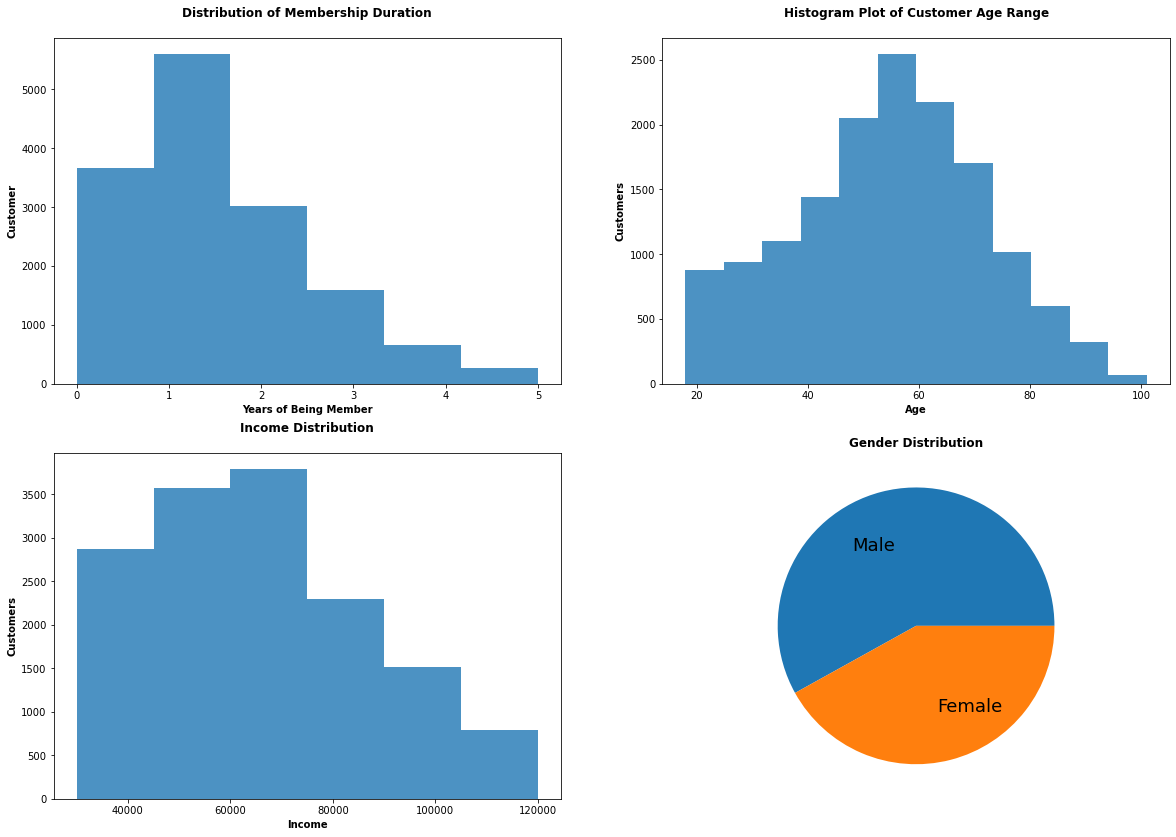

In [36]:
plt.subplots(figsize=(20, 14));

### Length of Membership
plt.subplot(2,2,1)
plt.title("Distribution of Membership Duration\n",
         fontweight ="bold")
num_bins = 6
n, bins, patches = plt.hist(profile_df['membership'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)

plt.xlabel('Years of Being Member', fontweight ="bold")
plt.ylabel('Customer', fontweight ="bold")


### Age Distribution
plt.subplot(2,2,2)
plt.title('Histogram Plot of Customer Age Range\n',
          fontweight ="bold")
num_bins = 12
n, bins, patches = plt.hist(profile_df['age'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)

plt.xlabel('Age', fontweight ="bold")
plt.ylabel('Customers', fontweight ="bold")
  
### Income Distribution
plt.subplot(2,2,3)
plt.title("Income Distribution\n", fontweight ="bold")

num_bins = 6
n, bins, patches= plt.hist(profile_df['income'], num_bins, 
                            color ='tab:blue',
                            alpha = 0.8)
plt.xlabel('Income', fontweight ="bold")
plt.ylabel('Customers', fontweight ="bold")

### Gender Distribution
plt.subplot(2,2,4)
gender_m = profile_df[profile_df['gender'] == 'M'].gender.count()
gender_f = profile_df[profile_df['gender'] == 'F'].gender.count()
gender = [gender_m , gender_f ]
labels=['Male', 'Female']

plt.title("Gender Distribution", fontweight ="bold")
plt.pie(gender, labels=labels,  labeldistance=0.6, textprops={'fontsize': 18})

plt.show()

In terms of gender, there is more men in the customer group than women. At the same time, it is interesting that most of the customer in the group seem to be around 40-70, peaking round 50+, a particularly mature customer group. It might be because the campaign intentionally target this group of mature customer, being naturally high power spending group(due to age). The mode of income is around 60000+

Dividing the profile dataframe into 3 different income group, namely:
<ol> 
    <li> from 53000 and below 
    <li> above 53000 and below 74000
    <li> above 74000
</ol>
    
Let us see the distribution of gender and age (which we shall use the quartile percentile age  as describe in the dataframe) within this group


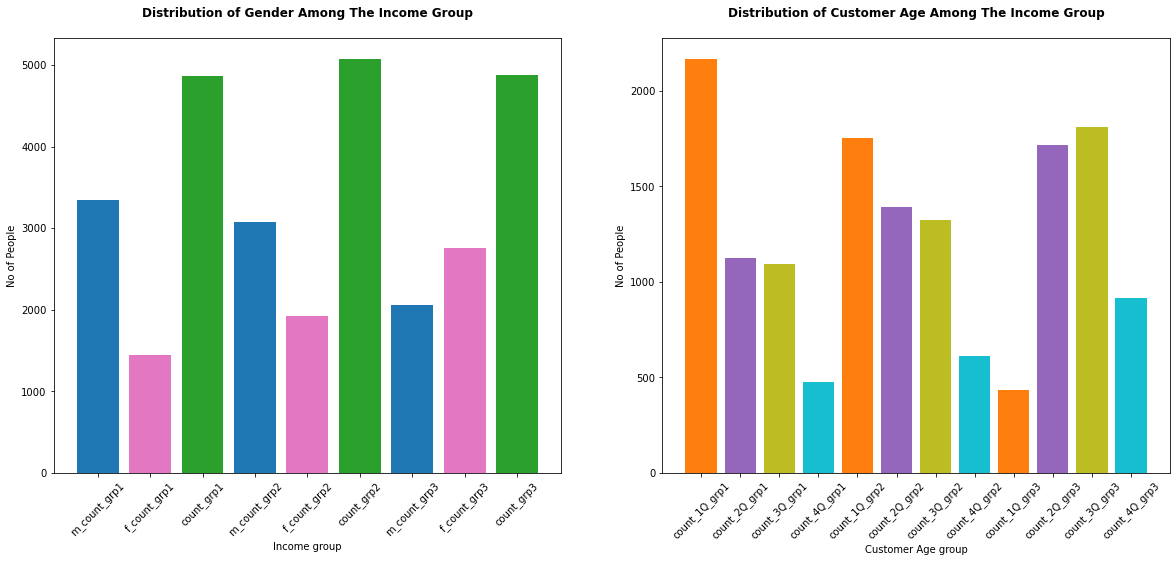

In [37]:
plt.subplots(figsize=(20, 8))

income_1  = profile_df.loc[profile.income <= 53000]
income_2  = profile_df.loc[(profile.income > 53000) & (profile.income <= 73000)]
income_3  = profile_df.loc[profile.income > 73000]

### Gender within the group
count_grp1   =  income_1.gender.count()
count_grp2   =  income_2.gender.count()
count_grp3   =  income_3.gender.count()

m_count_grp1 =  income_1.loc[income_1.gender== 'M'].gender.count()
f_count_grp1 =  income_1.loc[income_1.gender== 'F'].gender.count()
m_count_grp2 =  income_2.loc[income_2.gender== 'M'].gender.count()
f_count_grp2 =  income_2.loc[income_2.gender== 'F'].gender.count()
m_count_grp3 =  income_3.loc[income_3.gender== 'M'].gender.count()
f_count_grp3 =  income_3.loc[income_3.gender== 'F'].gender.count()

income =[m_count_grp1, f_count_grp1, count_grp1,
         m_count_grp2, f_count_grp2, count_grp2,
         m_count_grp3, f_count_grp3, count_grp3]
index  =['m_count_grp1', 'f_count_grp1', 'count_grp1',
         'm_count_grp2', 'f_count_grp2', 'count_grp2',
         'm_count_grp3', 'f_count_grp3', 'count_grp3']

plt.subplot(1,2,1)

color  = ['tab:blue', 'tab:pink', 'tab:green',
          'tab:blue', 'tab:pink', 'tab:green',
          'tab:blue', 'tab:pink', 'tab:green']

plt.title("Distribution of Gender Among The Income Group\n",
         fontweight ="bold")

plt.ylabel("No of People")
plt.xlabel("Income group")

plt.bar(index, height=income, color = color)

plt.xticks(rotation=45)

### Age within the group
count_1Q_grp1   =  income_1.loc[income_1.age <= 45].age.count()
count_2Q_grp1   =  income_1.loc[(income_1.age > 45) & (income_1.age <= 58)].age.count()
count_3Q_grp1   =  income_1.loc[(income_1.age > 58) & (income_1.age <= 73)].age.count()
count_4Q_grp1   =  income_1.loc[income_1.age >73].age.count()
count_1Q_grp2   =  income_2.loc[income_2.age <= 45].age.count()
count_2Q_grp2   =  income_2.loc[(income_2.age > 45) & (income_2.age <= 58)].age.count()
count_3Q_grp2   =  income_2.loc[(income_2.age > 58) & (income_2.age <= 73)].age.count()
count_4Q_grp2   =  income_2.loc[income_2.age >73].age.count()
count_1Q_grp3   =  income_3.loc[income_3.age <= 45].age.count()
count_2Q_grp3   =  income_3.loc[(income_3.age > 45) & (income_3.age <= 58)].age.count()
count_3Q_grp3   =  income_3.loc[(income_3.age > 58) & (income_3.age <= 73)].age.count()
count_4Q_grp3   =  income_3.loc[income_3.age >73].age.count()


plt.subplot(1,2,2)

color  = ['tab:orange', 'tab:purple', 'tab:olive', "tab:cyan",
          'tab:orange', 'tab:purple', 'tab:olive', "tab:cyan",
          'tab:orange', 'tab:purple', 'tab:olive', "tab:cyan"]
income =[count_1Q_grp1, count_2Q_grp1, count_3Q_grp1, count_4Q_grp1, 
         count_1Q_grp2, count_2Q_grp2, count_3Q_grp2, count_4Q_grp2,
         count_1Q_grp3, count_2Q_grp3, count_3Q_grp3, count_4Q_grp3]

index  =['count_1Q_grp1', 'count_2Q_grp1','count_3Q_grp1', 'count_4Q_grp1',
         'count_1Q_grp2', 'count_2Q_grp2', 'count_3Q_grp2', 'count_4Q_grp2',
         'count_1Q_grp3', 'count_2Q_grp3', 'count_3Q_grp3', 'count_4Q_grp3',]

plt.bar(index, height=income, color = color)
plt.xticks(rotation=45)

plt.title("Distribution of Customer Age Among The Income Group\n",
         fontweight ="bold")

plt.ylabel("No of People")
plt.xlabel("Customer Age group")
plt.show()

Let us first talk about the age grouping within the income group. 

Observation
<ul>
    <li>As expected, the youngest of the group dominates the lower income (as probably they have not been in workforce for too long) and they almost twice as many when compared to the rest.
    <li>The rest of the age-group exhibit increasing number of people when the income goes higher. 
    <li>There is almost no difference between the number of people in the 3 income group of age group 45-58 and 58-73.        
</ul>

For the income plot,  there is more males than female are found in the lower and mid-income level but the trend reverse for the high-level income group. This may be due to that at higher income group, it will require typically less manual and technical work which male could excel in but rather in sales and management jobs which females excel in


In terms of gender, Starbucks male client demographics seem to concentrate on middle to lower earning customer base. The male income group have a cliff drop behaviour while female customer base exhibits a normal-distributed pattern

## Offer

###### Which is the most effective channel in dispensing out information?

First let us have an overview of the dataframe

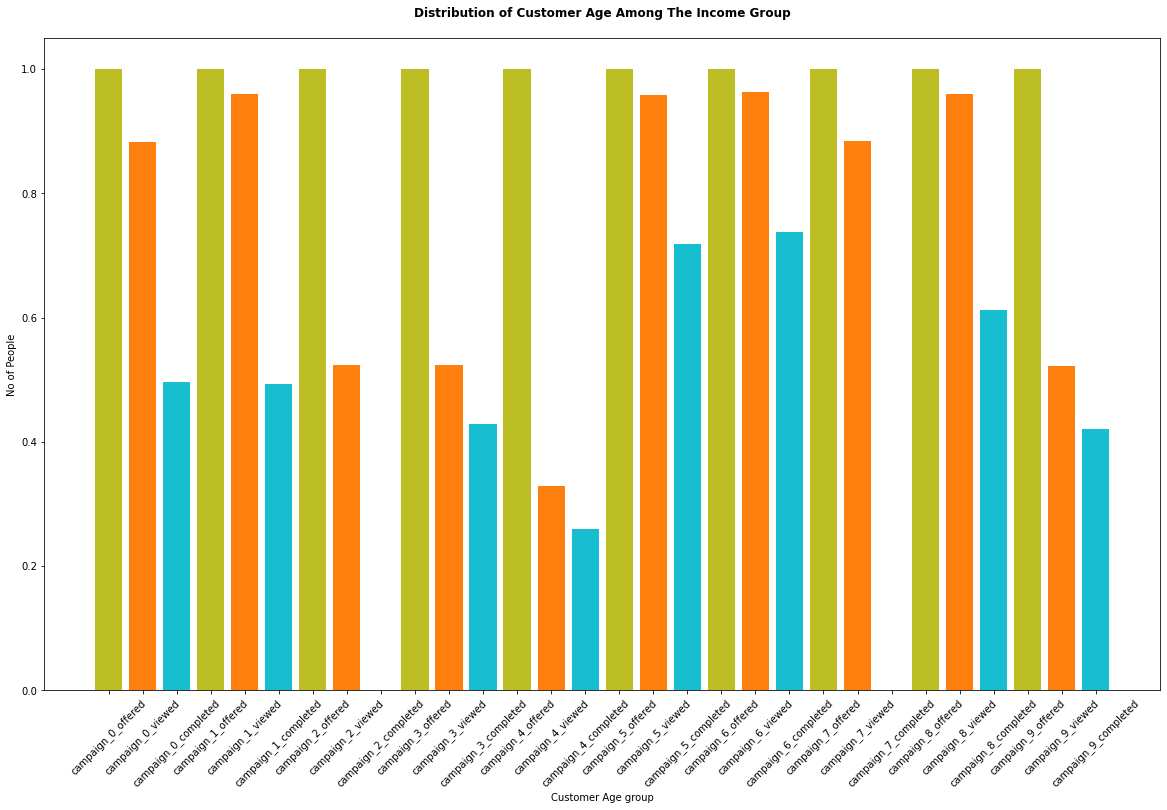

In [38]:
plt.subplots(figsize=(20, 12))

value = []
for i in range(0,portfolio.shape[0]):
    value.append(1.0)
    value.append(portfolio_df.Viewed.iloc[i] /portfolio_df.Offered.iloc[i])
    value.append(portfolio_df.Complete.iloc[i] /portfolio_df.Offered.iloc[i])

color = [] 
for i in range(0,portfolio.shape[0]):
    color.append("tab:olive")
    color.append("tab:orange")
    color.append("tab:cyan")
    
index = []
for i in range(0,portfolio.shape[0]):
    index.append("campaign_" + str(i) + "_offered")
    index.append("campaign_" + str(i) + "_viewed")
    index.append("campaign_" + str(i) + "_completed")

plt.bar(index, height=value, color = color)

plt.xticks(rotation=45)

plt.title("Distribution of Customer Age Among The Income Group\n",
         fontweight ="bold")

plt.ylabel("No of People")
plt.xlabel("Customer Age group")
plt.show()

success  = pd.DataFrame()
success.concat(pd.DataFrame([]))


Campaign 6,7,9, namely discount, discount, bogo, seem to have above 60% completion rate

Let us go back to the question in which media channel offers the greatest attention. We would say media has the effect of bring attention to, ie in this case for customer to view the offer. Whether to complete it, would depend on the reward, difficulty of the offer and nature of customer

In [63]:
info       = portfolio_df[portfolio_df.offer_type==0].Viewed.sum()/portfolio_df[portfolio_df.offer_type==0].Offered.sum()
bogo       
print(info)

   reward  difficulty  duration  offer_type                                id  \
2       0         0.0       0.4           0  3f207df678b143eea3cee63160fa8bed   
7       0         0.0       0.3           0  5a8bc65990b245e5a138643cd4eb9837   

   web  mobile  social  Viewed  Complete  Offered  
2    1       1       0  3487.0         0     6657  
7    0       1       1  5873.0         0     6643  


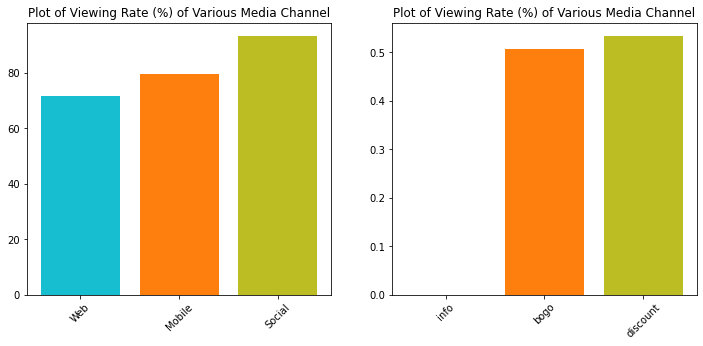

In [65]:
plt.subplots(figsize=(12, 5))

plt.subplot(1,2,1)
influence_web    = (portfolio_df.Viewed * portfolio_df.web).sum() / (portfolio_df.Offered * portfolio_df.web).sum()  * 100
influence_mobile = (portfolio_df.Viewed * portfolio_df.mobile).sum() / (portfolio_df.Offered * portfolio_df.mobile).sum() * 100
influence_social = (portfolio_df.Viewed * portfolio_df.social).sum() / (portfolio_df.Offered * portfolio_df.social).sum() * 100

influence = [influence_web, influence_mobile, influence_social] 
label = ['influence_web', 'influence_mobile', 'influence_social']

label = ['Web', 'Mobile', 'Social']
color = ['tab:cyan', 'tab:orange', 'tab:olive']

plt.xticks(rotation=45)
plt.title('Plot of Viewing Rate (%) of Various Media Channel')

plt.bar(label, influence, color=color)


plt.subplot(1,2,2)
info       = portfolio_df[portfolio_df.offer_type==0].Complete.sum()/portfolio_df[portfolio_df.offer_type==0].Offered.sum()
bogo       = portfolio_df[portfolio_df.offer_type==1].Complete.sum()/portfolio_df[portfolio_df.offer_type==1].Offered.sum()
discount   = portfolio_df[portfolio_df.offer_type==2].Complete.sum()/portfolio_df[portfolio_df.offer_type==2].Offered.sum()

influence = [info, bogo, discount] 
label = ['info', 'bogo', 'discount']

color = ['tab:cyan', 'tab:orange', 'tab:olive']

plt.xticks(rotation=45)
plt.title('Plot of Viewing Rate (%) of Various Media Channel')

plt.bar(label, influence, color=color)

### Lastly to show
plt.show()

Not surprising, customer will respond more to their social media compared to other form of communication. This maybe because of social media give a more human touch and directed advertisement effect compared to mobile. Mobile, though personal, do not give one the personal touch

The number of offers for each campaign is largely the same. So we can say, it is safe to compare between each 

In [41]:
influence_web    = (portfolio_df.Viewed * portfolio_df.web).sum() / (portfolio_df.Offered * portfolio_df.web).sum()  * 100
influence_mobile = (portfolio_df.Viewed * portfolio_df.mobile).sum() / (portfolio_df.Offered * portfolio_df.mobile).sum() * 100
influence_social = (portfolio_df.Viewed * portfolio_df.social).sum() / (portfolio_df.Offered * portfolio_df.social).sum() * 100

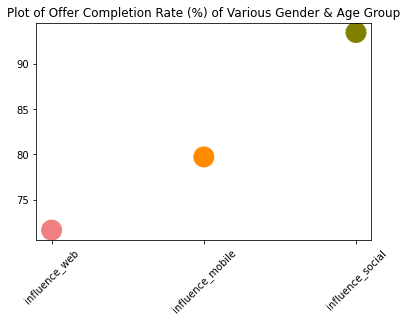

In [42]:
ratio = [influence_web, influence_mobile, influence_social] 
group = ['influence_web', 'influence_mobile', 'influence_social']

label = ['Web', 'Mobile', 'Social']
color = ['lightcoral', 'darkorange', 'olive']

plt.xticks(rotation=45)
plt.title('Plot of Offer Completion Rate (%) of Various Gender & Age Group')

plt.scatter(group, ratio, color=color, s=400)

plt.show()

It seem to show that social media has great influence on the client. Most of the client actually responded to the campaign when it is hosted on social media

###### Which group (age, income, membership length) of customers appear to be more responsive towards the promotion

Influence of Membership length

Influence of Age and Gender

We divide the groups into 6 as following
<ol>
    <li> Age below 35, Gender: Male    --- YM
    <li> Age below 35, Gender: Female  --- YF
    <li> Age 36 -65, Gender: Male   --- MM
    <li> Age 36 -65, Gender: Female  --- MF
    <li> Age 66 and above, Gender: Male ---OM
    <li> Age 66 and above, Gender: Female ---OF
</ol>

In [43]:
profile_df_ym = profile_df.loc[ (profile_df.gender =='M') & (profile_df.age <= 35) ]
profile_df_yf = profile_df.loc[ (profile_df.gender =='F') & (profile_df.age <= 35) ]
profile_df_mm = profile_df.loc[(profile_df.gender =='M') & ( (profile_df.age > 35) & (profile_df.age < 65))  ]
profile_df_mf = profile_df.loc[ (profile_df.gender =='F') & ( (profile_df.age > 35) & (profile_df.age < 65))  ]
profile_df_om = profile_df.loc[(profile_df.gender =='M') & (profile_df.age >= 66)]
profile_df_of = profile_df.loc[ (profile_df.gender =='F') & (profile_df.age >= 66) ]

In [44]:
ratio_ym = profile_df_ym.Completion.sum() / profile_df_ym.Offered.sum()  * 100
ratio_yf = profile_df_yf.Completion.sum() / profile_df_yf.Offered.sum()  * 100
ratio_mm = profile_df_mm.Completion.sum() / profile_df_mm.Offered.sum()  * 100
ratio_mf = profile_df_mf.Completion.sum() / profile_df_mf.Offered.sum()  * 100
ratio_om = profile_df_om.Completion.sum() / profile_df_om.Offered.sum()  * 100
ratio_of = profile_df_of.Completion.sum() / profile_df_of.Offered.sum()  * 100

The lowest rate of completion 

In [45]:
ratio_ym

28.293073535299612

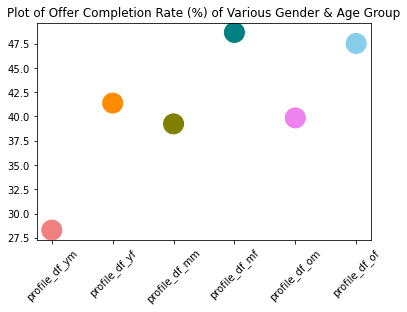

In [46]:
ratio = [ratio_ym, ratio_yf, ratio_mm, ratio_mf, ratio_om, ratio_of] 
group = ['profile_df_ym', 'profile_df_yf', 'profile_df_mm', 'profile_df_mf', 'profile_df_om', 'profile_df_of' ]


label = ['YM', 'YF', 'MM', 'MF', 'OM', 'OF']
color = ['lightcoral', 'darkorange', 'olive', 'teal', 'violet', 
         'skyblue']

plt.xticks(rotation=45)
plt.title('Plot of Offer Completion Rate (%) of Various Gender & Age Group')

plt.scatter(group, ratio, color=color, s=400)

plt.show()

The customer response for Young Male is particularly poor. While the rest of the group exhibits at least 38% of offer uptake rate, Young Male group seem to have relatively 'poorer' uptake rate at about 28.2%

###### Is there link between the offer given and the target group?

###### Which type of promotional offer most appeal to which group of customer?

## Modeling and Evaluation

###### Can we build a recommendation engine to recommend promotional offer with good uptake rate to new customers based on their demographical data age, income, registration date and gender? 

Selection of Features

There is a plethora of features within the dataset we would need to fish out the most relevant features in our studies

In [47]:
plt.figure(figsize=(9, 6))
### Plot Heatmap with feature multicollinearity
sns.heatmap(master_offer2.corr(), annot = True, vmin = -1, vmax = 1, fmt= ".2f", cmap = "coolwarm")
plt.title("Feature Multicollinearity - master_offer1", fontsize = "x-large")
plt.xticks(rotation = 45, ha = "right");

NameError: name 'sns' is not defined

<Figure size 648x432 with 0 Axes>

## Deployment


# References 

<ol>
    <li>Starbuck Wikipaedia, https://en.wikipedia.org/wiki/Starbucks</li>
    <li>Starbuck Company Website, https://www.starbucks.com/about-us/ </li>
    <li>https://digital.hbs.edu/platform-digit/submission/starbucks-mobile-app-a-winner-in-bridging-the-retail-digital-divide/ </li>
    <li>List of the verified oldest people, <https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people</li>
    </ol>